# Assignment- Linear Regression : Geely Auto Car Price Prediction

Submitted By: Anindya Dasgupta

Email: anindyavik@gmail.com

This assignment is subdivided into following major subdivisions:-
1. Reading and understanding data
2. Data cleaning - Handling categorical variables
3. Exploratory Data Analysis
        - i.   Univariate Analysis
        - ii.  Bivariate Analysis
4. Data preparation
        - i.   Feature Engineering
        - ii.  Splitting data into training and testing sets
        - iii. Rescaling the features
5. Model Building - Balanced Approach (Automated + Manual) 
        - i.   Variance Inflation Factor(VIF)
        -ii.   Recursive Feature Elimation

**In this segment *Balanced approach (with RFE)* is used to build the model.**


6. Model Building - Manual Approach with backward selection

**In this approach *Manual approach* is followed with backward selection. And the best out of two is chosen to be the final one**


7. Model predictions
8. Model evaluation
9. Final thoughts and Conclusion

*Note: Files are to be placed under "Files" folder under the same path of .ipynb*

In [1]:
#importing required libraries
import warnings
warnings.filterwarnings('ignore')

from scipy import stats

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid',palette='muted')
sns.set(style="ticks", rc={"lines.linewidth": 4})

import os
from IPython.display import display
import datetime as dt

#pd.set_option('expand_frame_repr', False)

pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 150

filePath = os.path.abspath("Files")

## 1. Reading and Understanding Data 

In [2]:
#Loading data into dataframe
carPrice_df = pd.read_csv(f'{filePath}\\CarPrice_Assignment.csv', sep=',', encoding = 'ANSI')

In [3]:
carPrice_df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [4]:
carPrice_df.shape

(205, 26)

In [5]:
carPrice_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
carPrice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Great! no Null values are there

In [7]:
carPrice_df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

## 2. Data Cleaning - Handling Categorical Variables

##### Getting the car company out of the carName

In [8]:
carPrice_df['CarName']  = carPrice_df['CarName'].str.split(' ').str[0]
carPrice_df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
carPrice_df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Replacing wrong car company names with correct ones

As we can figure out some miss-spelt car company names in the dataset, which are self intuitive like the following ones:

- maxda is mazda
- toyouta is toyota
- porsshce is porsche
- vw is volkswagen
- vokswagen is volkswagen
- Nissan is nissan

Let's handle them.

In [10]:
carPrice_df['CarName'] = carPrice_df['CarName'].str.replace('maxda','mazda')
carPrice_df['CarName'] = carPrice_df['CarName'].str.replace('toyouta','toyota')
carPrice_df['CarName'] = carPrice_df['CarName'].str.replace('vw','volkswagen')
carPrice_df['CarName'] = carPrice_df['CarName'].str.replace('vokswagen','volkswagen')
carPrice_df['CarName'] = carPrice_df['CarName'].str.replace('porcshce','porsche')
carPrice_df['CarName'] = carPrice_df['CarName'].str.replace('Nissan','nissan')

In [11]:
carPrice_df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Looks good!

In [12]:
carPrice_df.head()

car_ID  symboling      CarName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

##### Standardising symboling risk ratings

Symboling is for insurance risk rating. 

With -3 being safest and +3 being very risky

This might affect our further analysis let's standardise risk rating values as 1 being safest and 7 being very risky

In [13]:
carPrice_df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [14]:
carPrice_df['symboling'] = carPrice_df['symboling'].map({-3:1, -2:2,-1:3,0:4,1:5,2:6,3:7})

In [15]:
carPrice_df.symboling.value_counts()

4    67
5    54
6    32
7    27
3    22
2     3
Name: symboling, dtype: int64

#### Derived Metrics

Let us now derive some metrics from the given dataset

1. Car Volume
    
    Given by: **car_length * car_width * car_height**

In [16]:
carPrice_df['carVolume_dervd'] = round(carPrice_df['carlength'] * carPrice_df['carlength'] * carPrice_df['carheight']).astype('int64')

2. Stroke Ratio

    Given by: **Stroke / boreratio**

In [17]:
carPrice_df['Stroke_Ratio_Dervd'] = round(carPrice_df['stroke']/carPrice_df['boreratio'],2)

3. Horsepower to Mileage ratio

    Given by:  **Horsepower / mileage**
    
*CC is derived from the earlier logic, and citympg is used for mileage*

In [18]:
carPrice_df['Horsepower_to_Mileage_ratio_dervd'] = carPrice_df['horsepower'] / carPrice_df['citympg']

## 3. Exploratory Data Analysis

### i. Univariate Analysis

In [19]:
carPrice_df.head()

car_ID  symboling      CarName fueltype aspiration doornumber      carbody  \
0       1          7  alfa-romero      gas        std        two  convertible   
1       2          7  alfa-romero      gas        std        two  convertible   
2       3          5  alfa-romero      gas        std        two    hatchback   
3       4          6         audi      gas        std       four        sedan   
4       5          6         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  carVolume_dervd  Stroke_Ratio_Dervd  \
0  13495.0          1390480                0.77   
1  16500.0          1390480                0.77   
2  16500.0          1535815                1.29   
3  13950.0          1693485                1.07   
4  17450.0          1693485                1.07   

   Horsepower_to_Mileage_ratio_dervd  
0                           5.285714  
1                           5.285714  
2                           8.105263  
3                           4.250000  
4                           6.388889

In [20]:
def distributionPlotGenerator(df,variable):
    plt.figure(figsize=(30, 5))
    plt.subplot(1,3,1)
    sns.distplot(df[variable],color='r')
    plt.subplot(1,3,2)
    sns.boxplot(df[variable],color='g')
    plt.subplot(1,3,3)
    sns.stripplot(df[variable],color='b')
    plt.suptitle('Numerical Variable: "{}" '.format(variable), fontsize = 20)
    plt.show()

###### Distribution of dependent variable : Price

Price is our dependent variable. Let's do some variate analysis of the variables against price

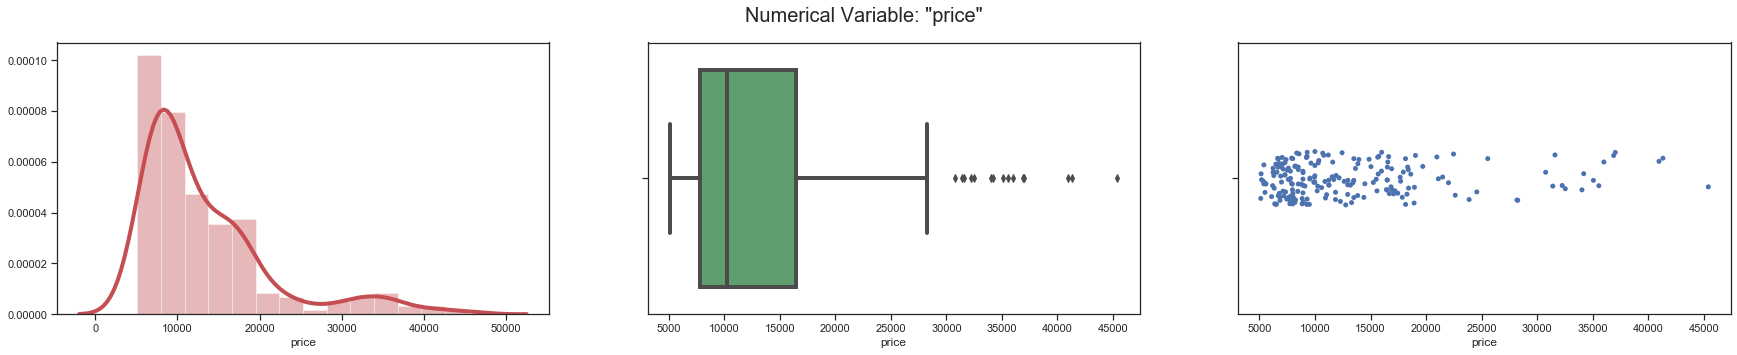

In [21]:
distributionPlotGenerator(carPrice_df,'price')

In [22]:
carPrice_df.price.describe(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
5%        6197.000000
10%       6657.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
90%      22563.000000
95%      32472.400000
99%      40802.720000
max      45400.000000
Name: price, dtype: float64

Distribution is right skewed, surely there are some higher some car companies which manufactures costly cars

#### Let's now see the distribution of Numerical Independent Variables

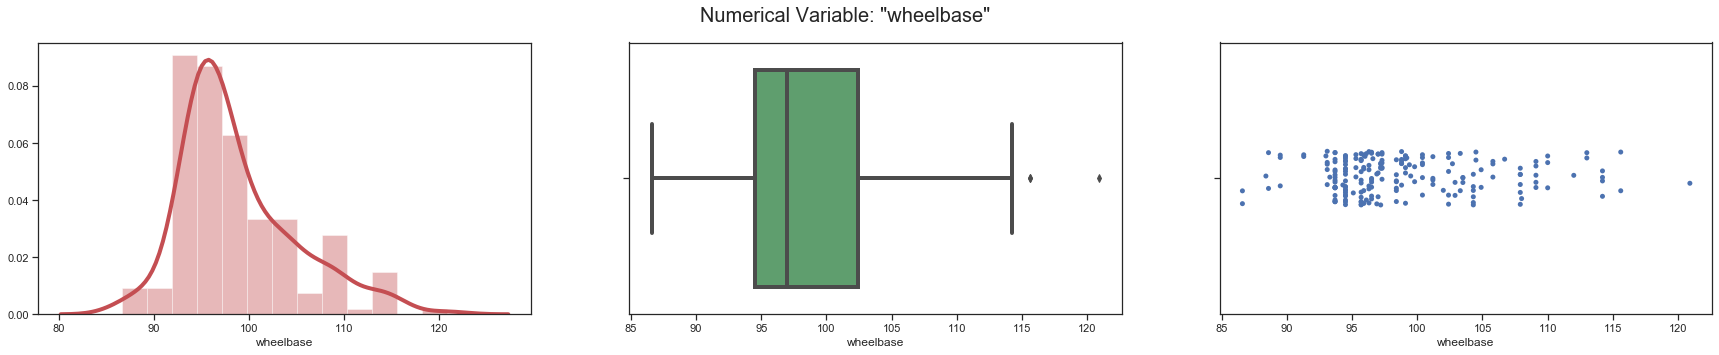

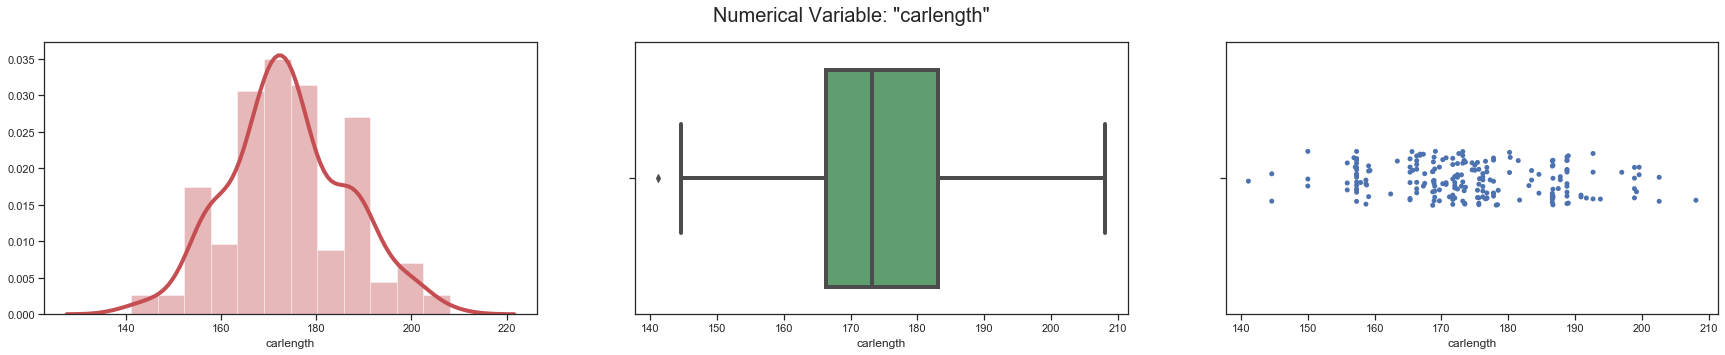

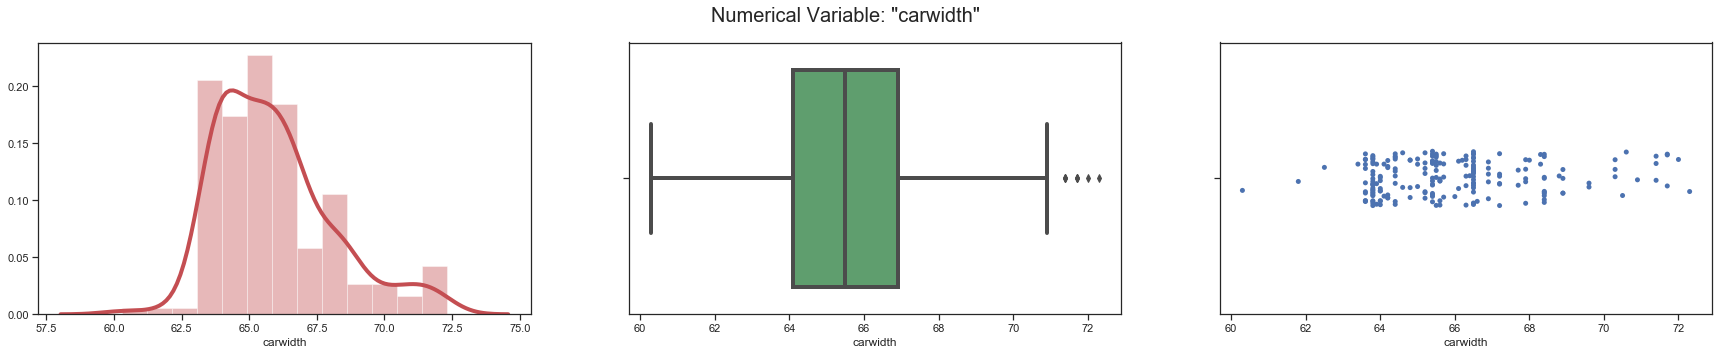

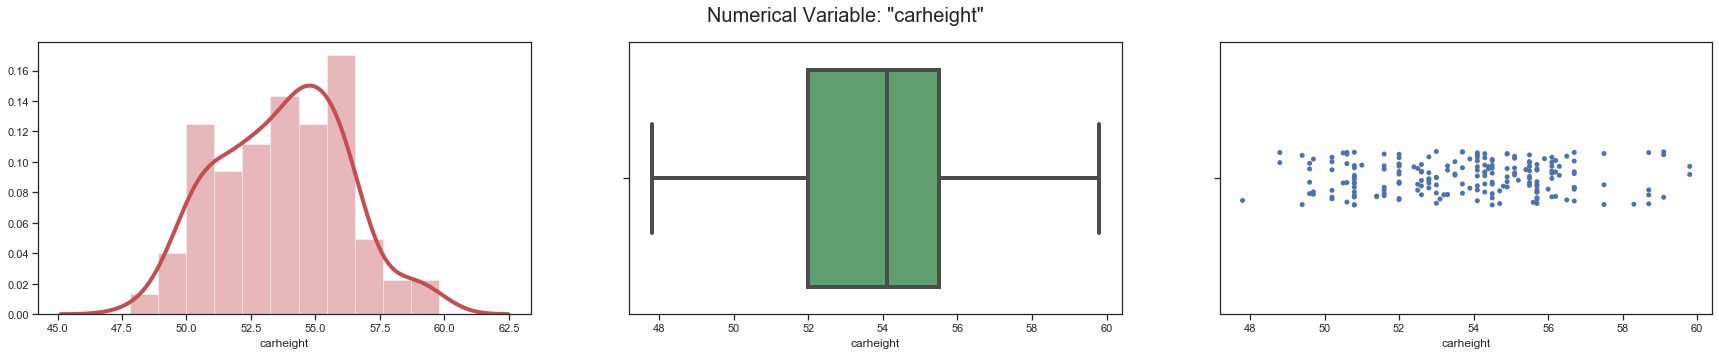

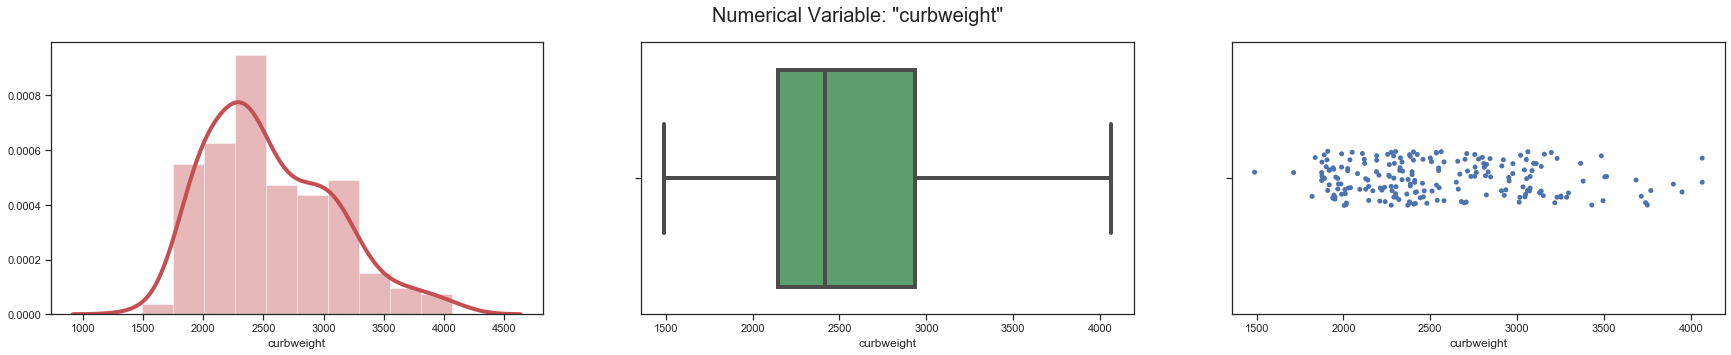

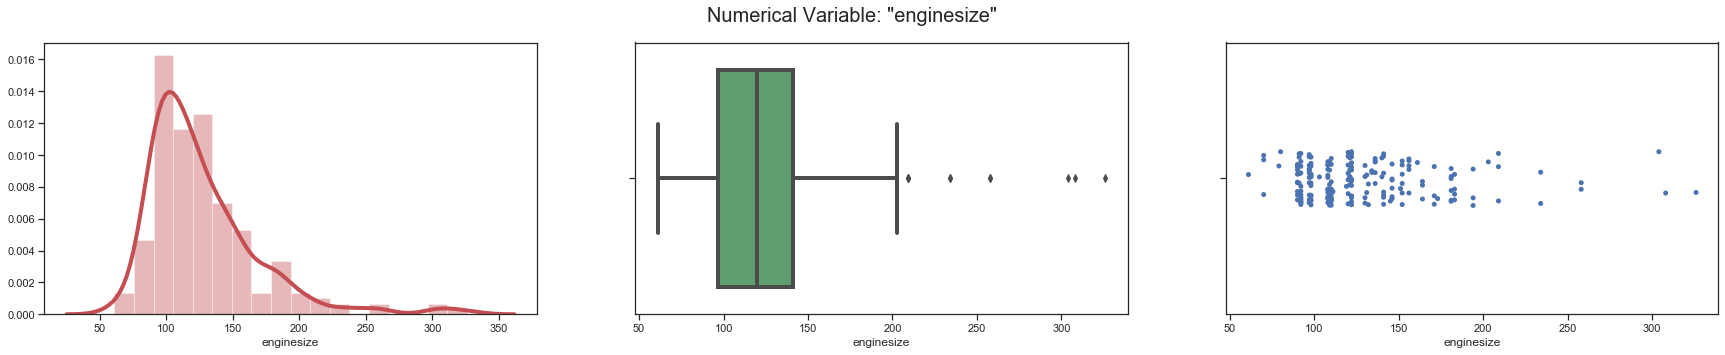

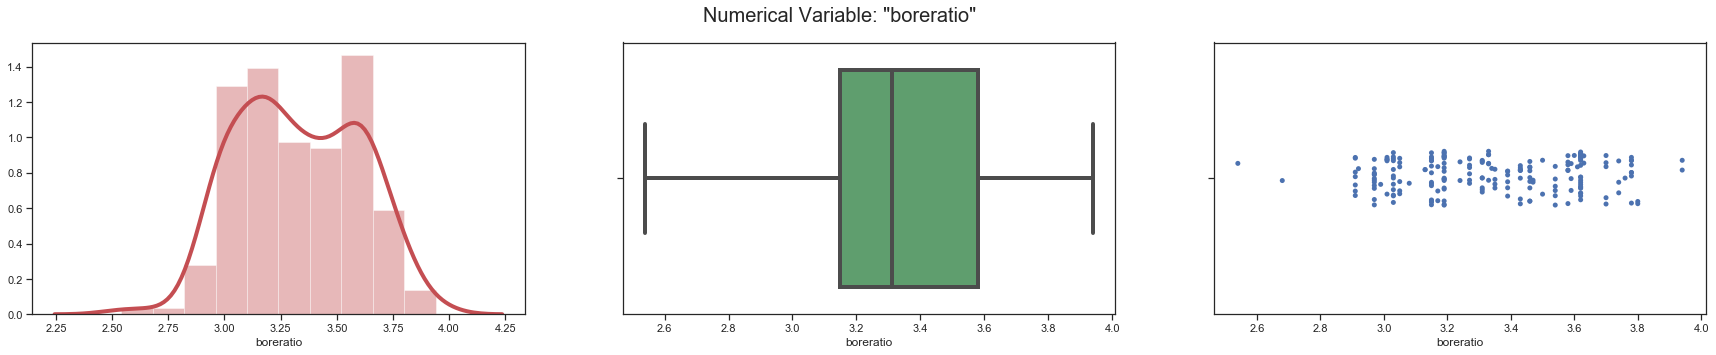

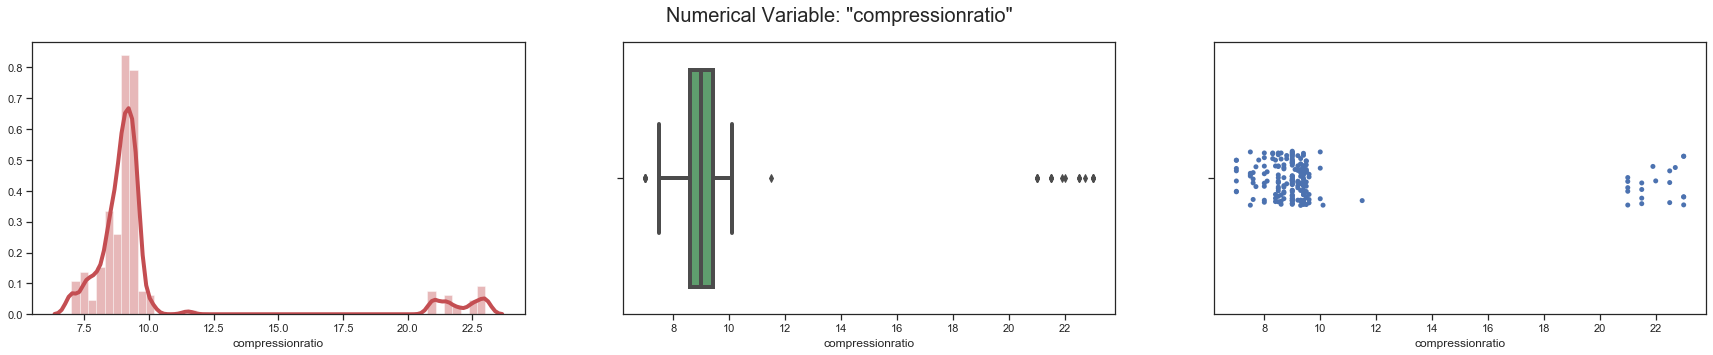

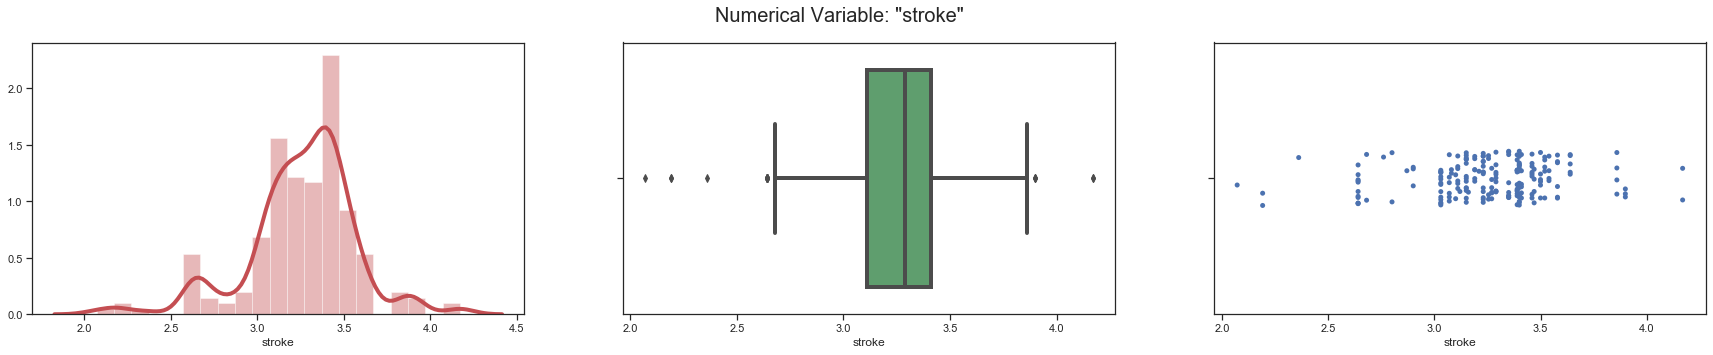

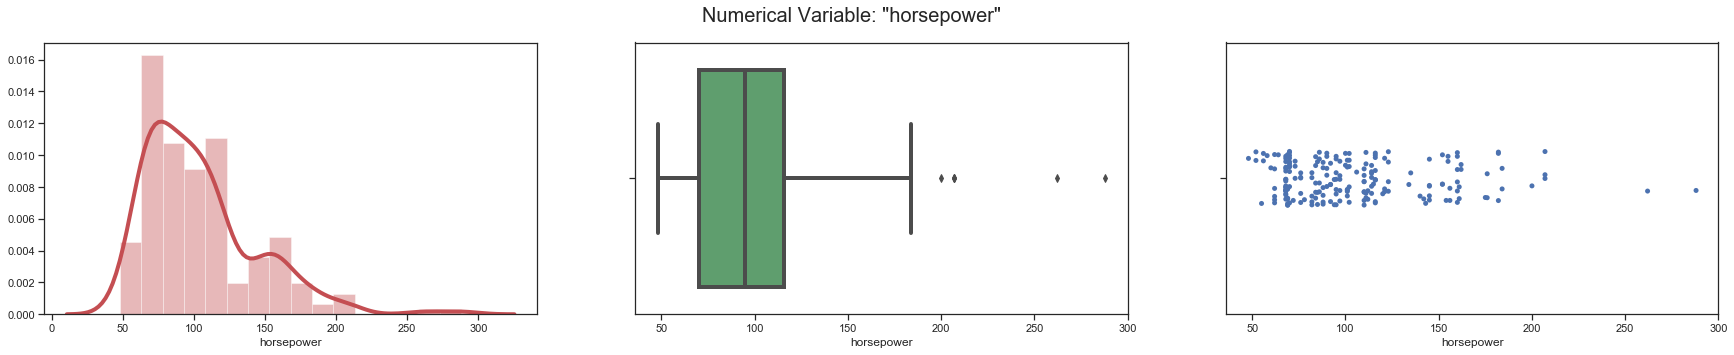

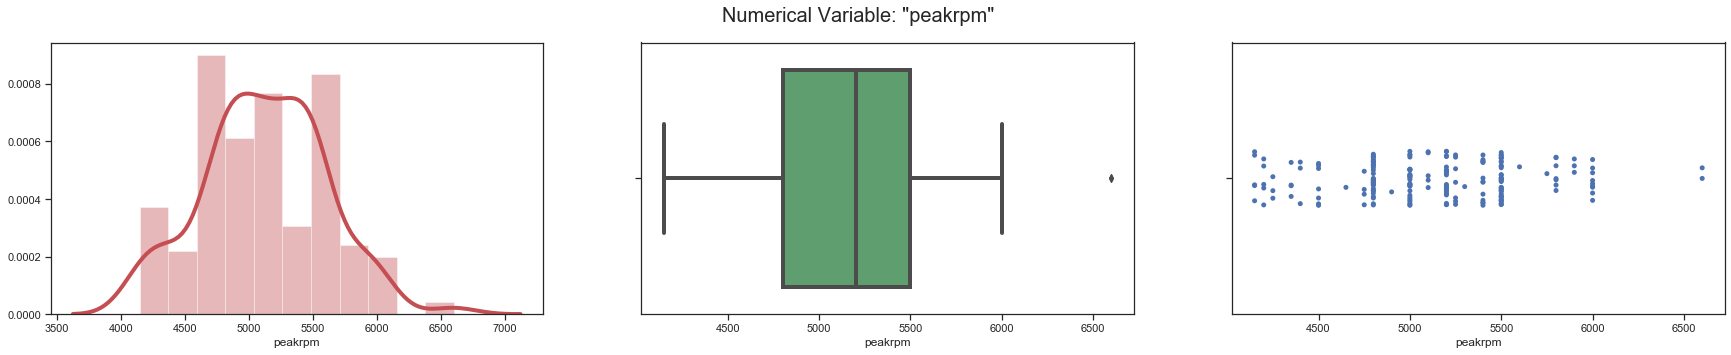

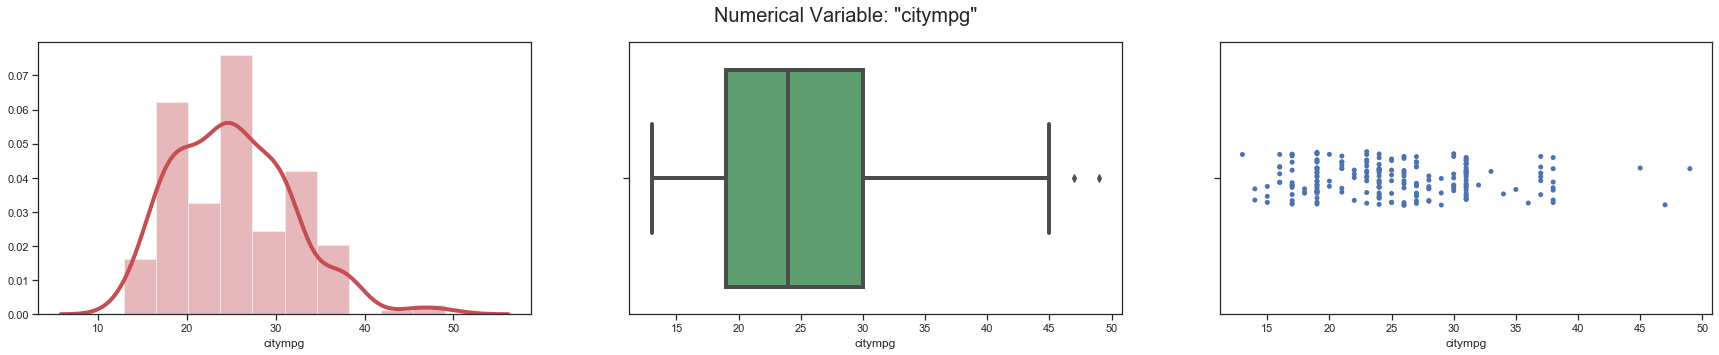

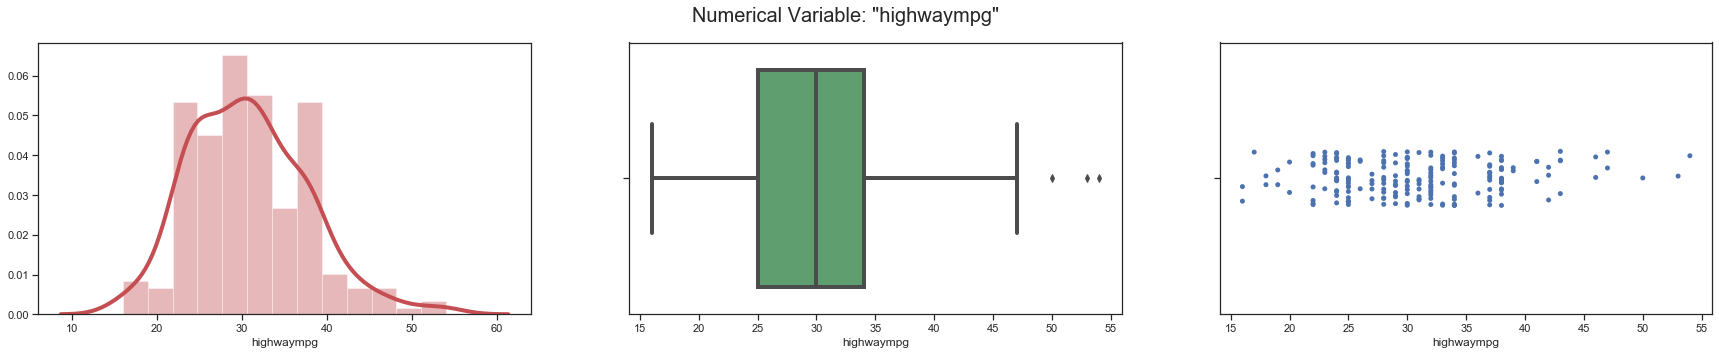

In [23]:
distributionPlotGenerator(carPrice_df,'wheelbase')
distributionPlotGenerator(carPrice_df,'carlength')
distributionPlotGenerator(carPrice_df,'carwidth')
distributionPlotGenerator(carPrice_df,'carheight')
distributionPlotGenerator(carPrice_df,'curbweight')
distributionPlotGenerator(carPrice_df,'enginesize')
distributionPlotGenerator(carPrice_df,'boreratio')
distributionPlotGenerator(carPrice_df,'compressionratio')
distributionPlotGenerator(carPrice_df,'stroke')
distributionPlotGenerator(carPrice_df,'horsepower')
distributionPlotGenerator(carPrice_df,'peakrpm')
distributionPlotGenerator(carPrice_df,'citympg')
distributionPlotGenerator(carPrice_df,'highwaympg')

#### Let's now see some visualizations on Categorical Independent Variables

Text(0.5, 1.0, 'Car company Vs Price')

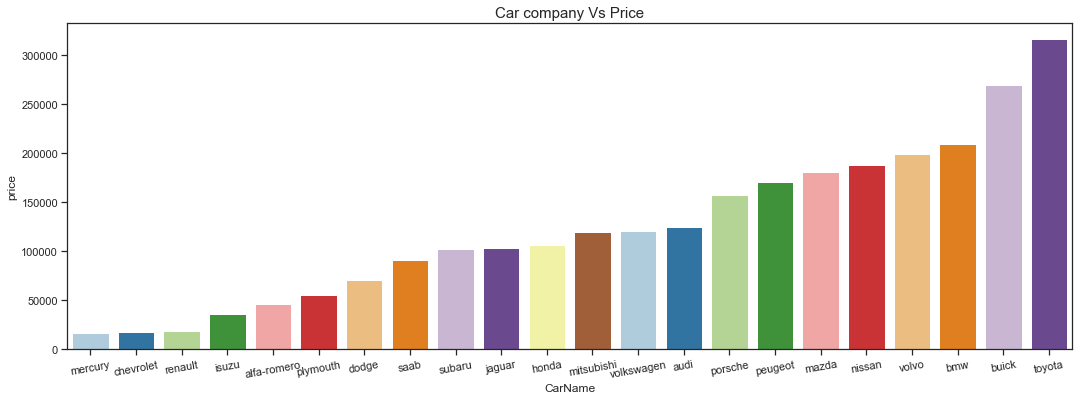

In [24]:
plt.figure(figsize=(18, 6))
sns.barplot(x = carPrice_df.groupby('CarName').price.sum().sort_values().index,
            y = carPrice_df.groupby('CarName').price.sum().sort_values(), data = carPrice_df, palette ='Paired')
plt.xticks(rotation=10)
plt.title("Car company Vs Price",fontsize = 15 )

In [25]:
def categoricalPlotGenerator(df,variable):
    plt.figure(figsize=(25, 5))    
    plt.subplot(1,4,1)
    sns.scatterplot(x=df[variable],y='price', data=df, color='g')
    plt.subplot(1,4,2)
    sns.barplot(x=df[variable],y='price',  data=carPrice_df, estimator=np.size,palette='YlOrRd')
    plt.subplot(1,4,3)
    sns.boxenplot(x=df[variable],y='price',  data=carPrice_df, palette='Paired')
    plt.subplot(1,4,4)
    sns.violinplot(x=df[variable],y='price',data=carPrice_df,split=True,inner='quart', palette= 'rocket')
    plt.suptitle('Categorical Variable: "{}" '.format(variable), fontsize = 15)
    plt.show()

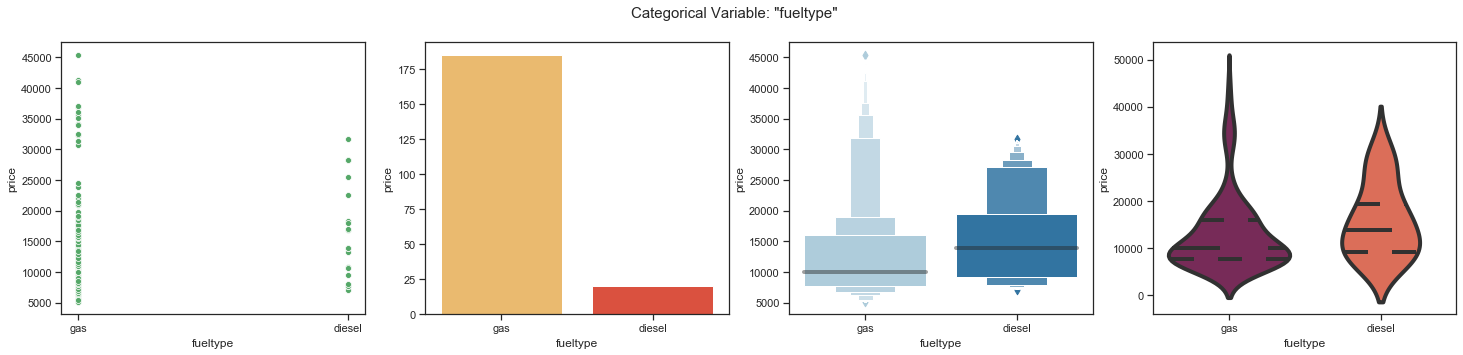

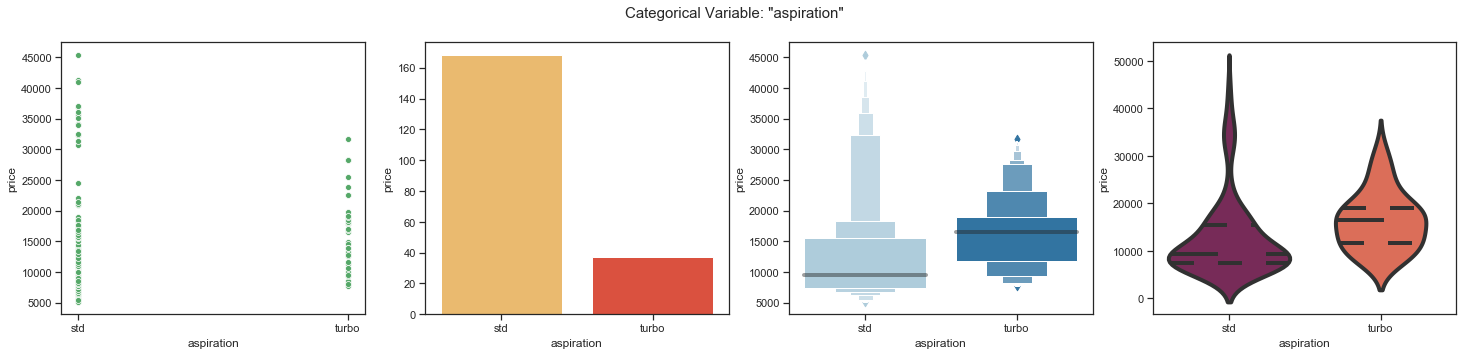

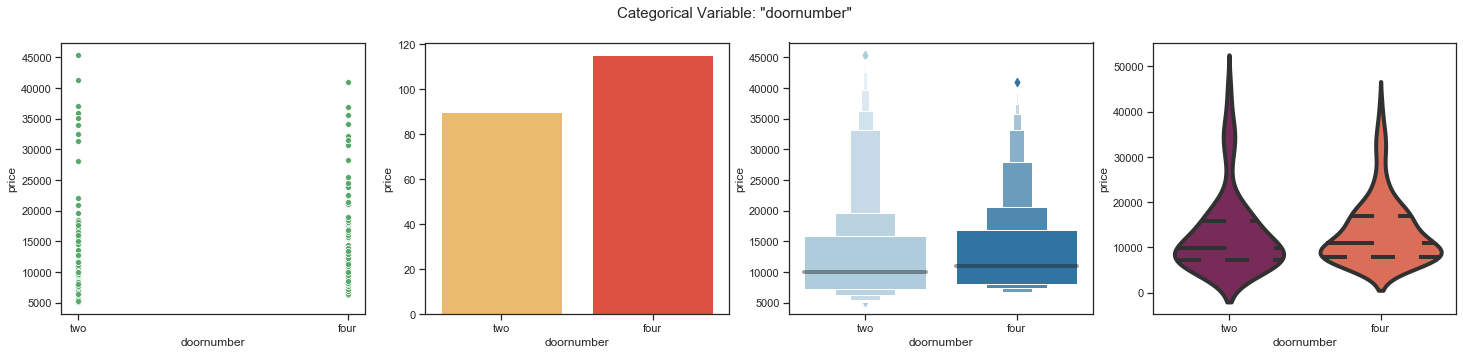

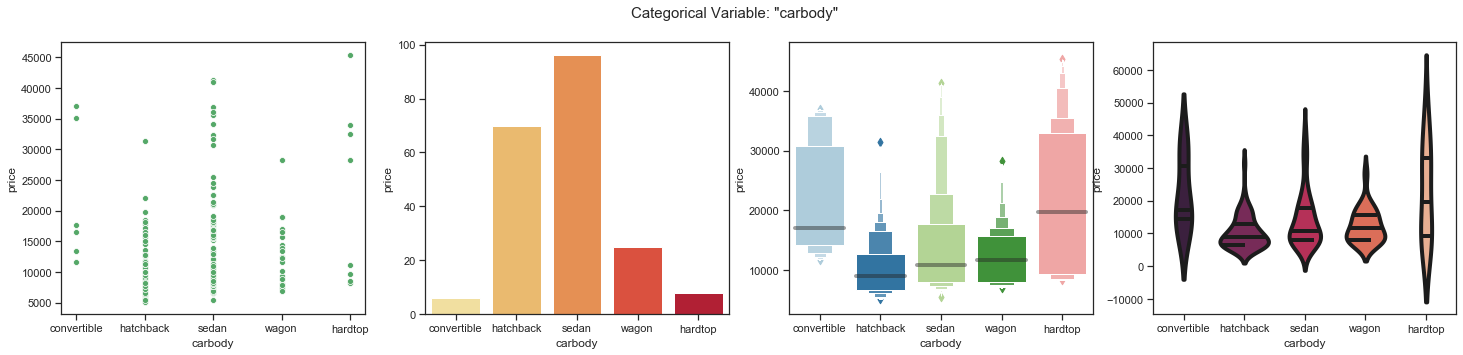

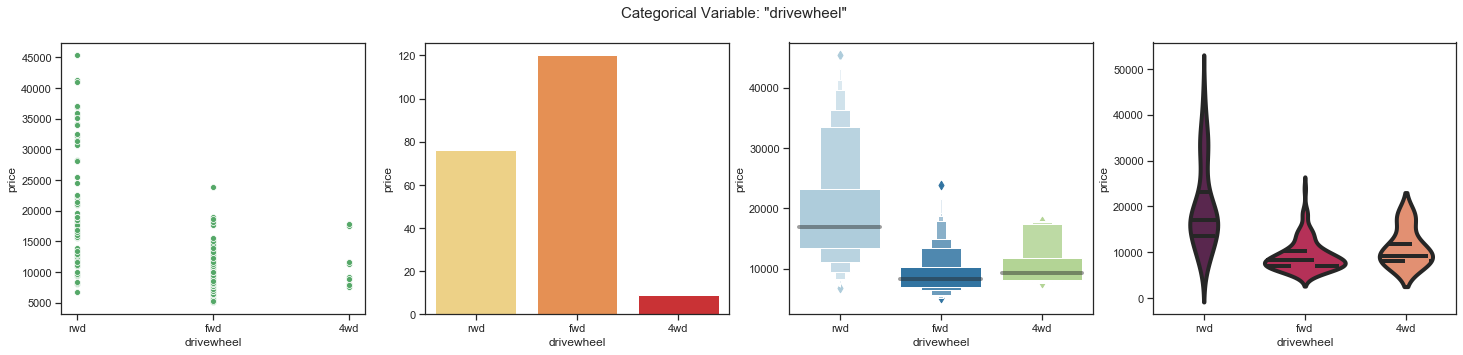

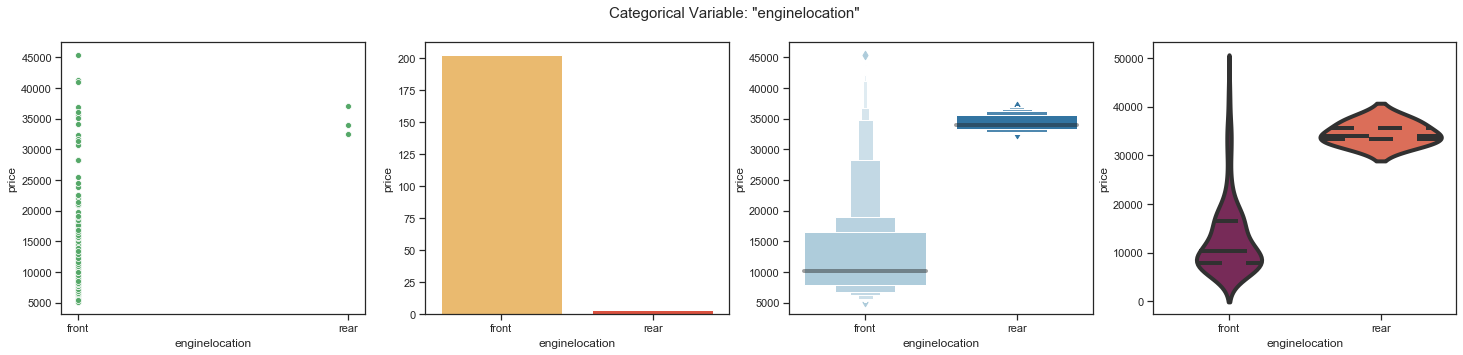

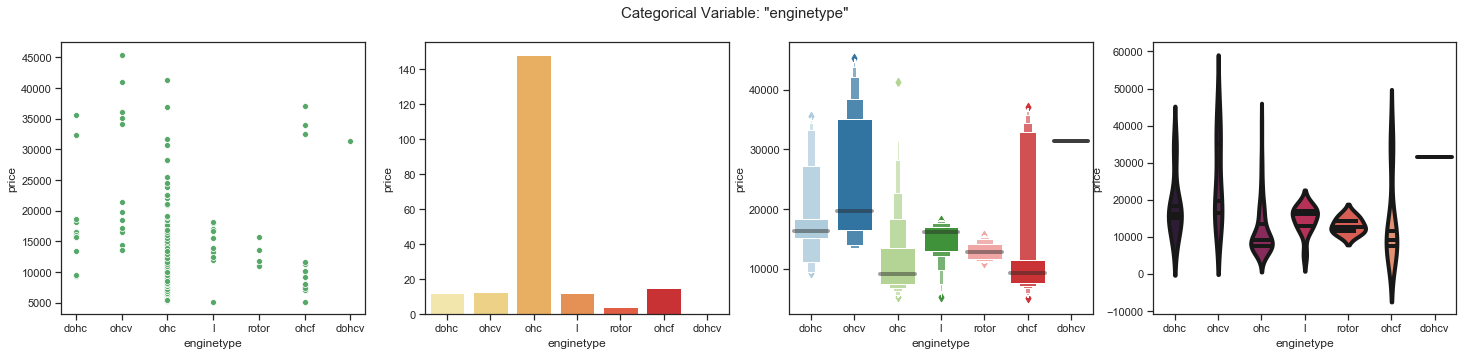

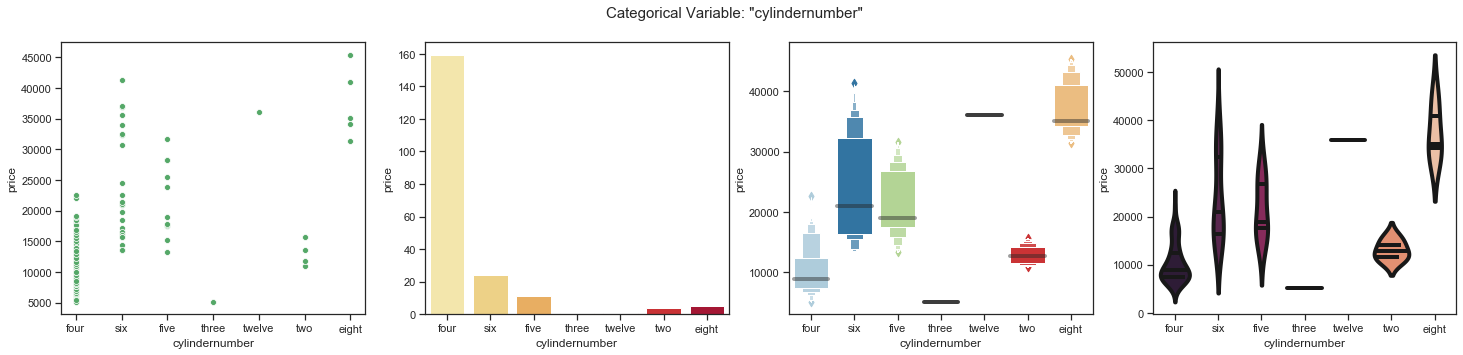

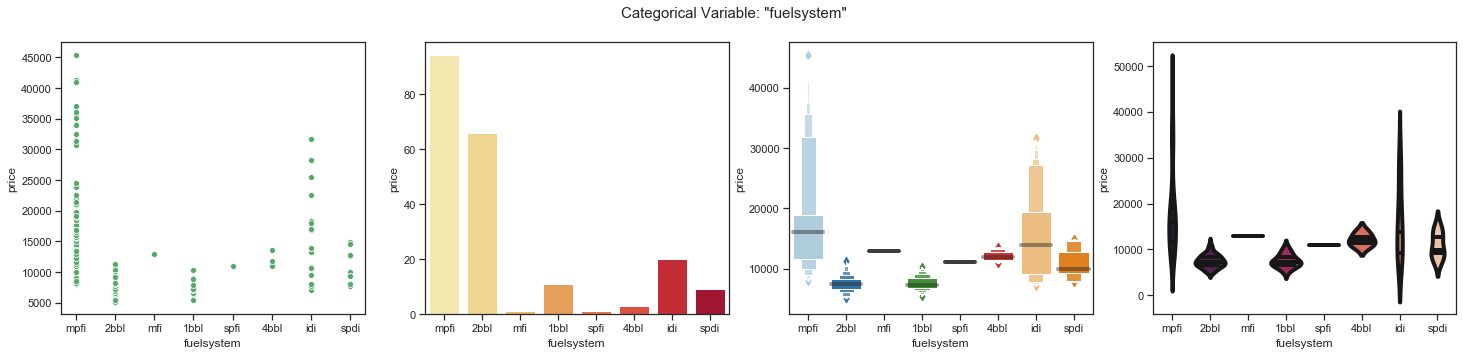

In [26]:
categoricalPlotGenerator(carPrice_df,'fueltype')
categoricalPlotGenerator(carPrice_df,'aspiration')
categoricalPlotGenerator(carPrice_df,'doornumber')
categoricalPlotGenerator(carPrice_df,'carbody')
categoricalPlotGenerator(carPrice_df,'drivewheel')
categoricalPlotGenerator(carPrice_df,'enginelocation')
categoricalPlotGenerator(carPrice_df,'enginetype')
categoricalPlotGenerator(carPrice_df,'cylindernumber')
categoricalPlotGenerator(carPrice_df,'fuelsystem')

### ii) Bivariate Analysis

In this section we will try analyse and answer some important questions through Bivariate Analysis

**Which type of car body gives the highest mileage in city for each enginetype?**

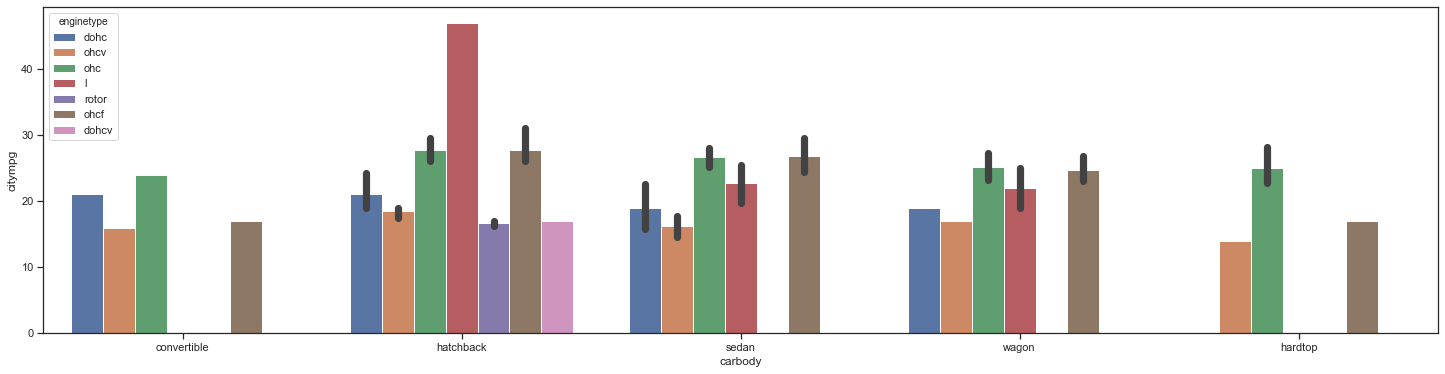

In [27]:
plt.figure(figsize=(25, 6))
sns.barplot(x='carbody', 
            y='citympg', hue=carPrice_df.enginetype, 
            data=carPrice_df, estimator = np.mean)

*L* Enginetype of *Hatchback* cars are the clear winner in terms of mileage. Let's explore more.

**Is there any relation between Engine-location and Wheelbase based on fueltype? Let's see**

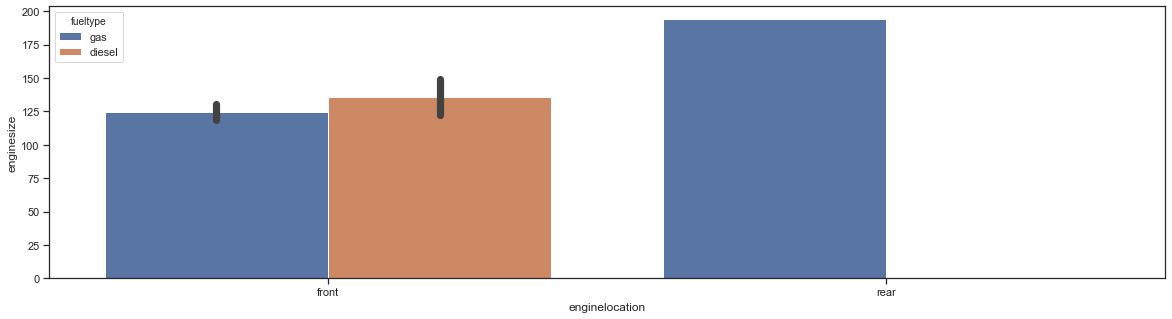

In [28]:
plt.figure(figsize=(20, 5))    
sns.barplot(x='enginelocation', 
            y='enginesize', hue=carPrice_df.fueltype, 
            data=carPrice_df, estimator = np.mean)

- Rear Engine Size is much bigger than front Engine Sizes
- No car has gas fueltype with engines at rear location

**Is there any relation between Peakrpm and Drivewheel for different aspiration types?
Let's find out.**

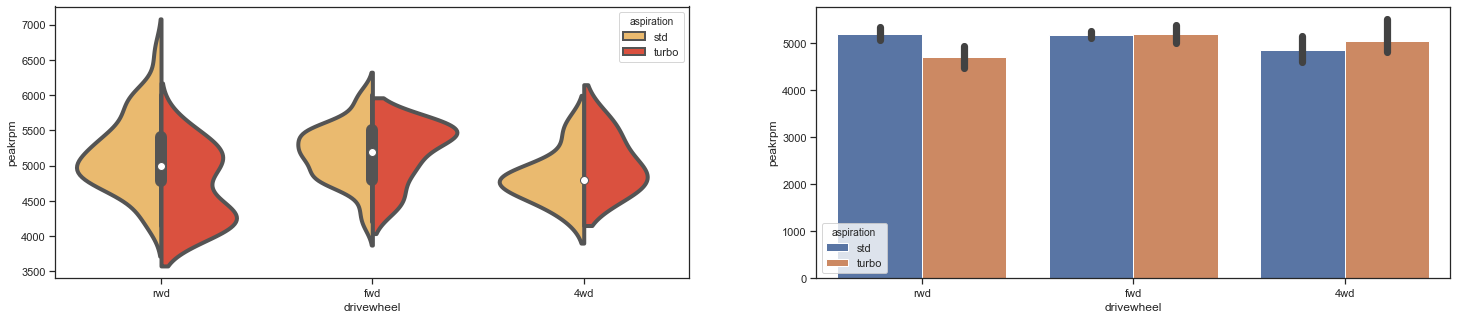

In [29]:
plt.figure(figsize=(25, 5))    
plt.subplot(1,2,1)
sns.violinplot(x='drivewheel',y='peakrpm',hue='aspiration',data=carPrice_df,split=True, palette='YlOrRd')
plt.subplot(1,2,2)
sns.barplot(x='drivewheel', 
            y='peakrpm', hue=carPrice_df.aspiration, 
            data=carPrice_df)

For, *fwd* drivewheel peakrpm attained is same for both *std* and *turbo* aspiration types

**What is the Average horsepower generated by each Engine-type for different Car-bodies? Let's see**

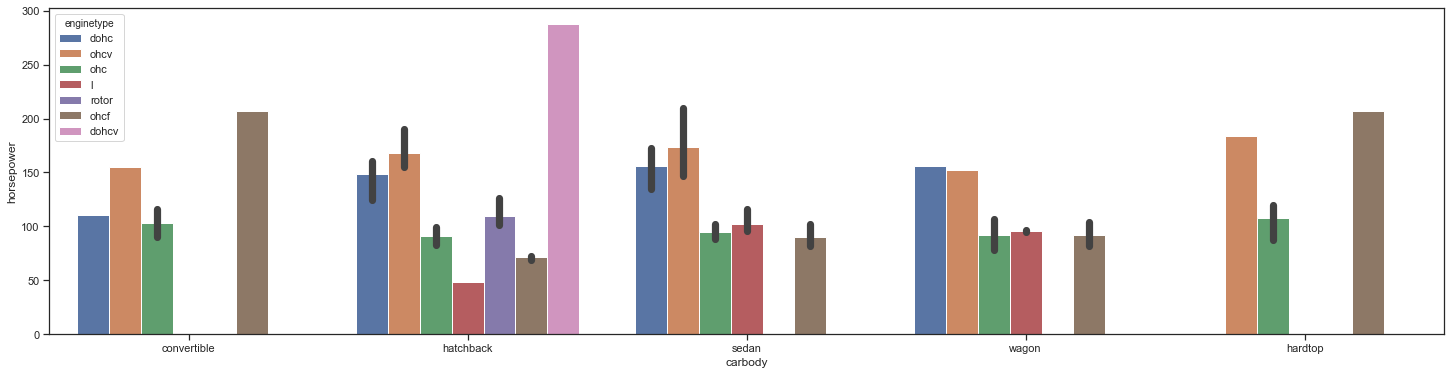

In [30]:
plt.figure(figsize=(25, 6))
sns.barplot(x='carbody', 
            y='horsepower', hue=carPrice_df.enginetype, 
            data=carPrice_df, estimator = np.mean)

**Peak-RPM attained by each EngineType with different drivewheels**

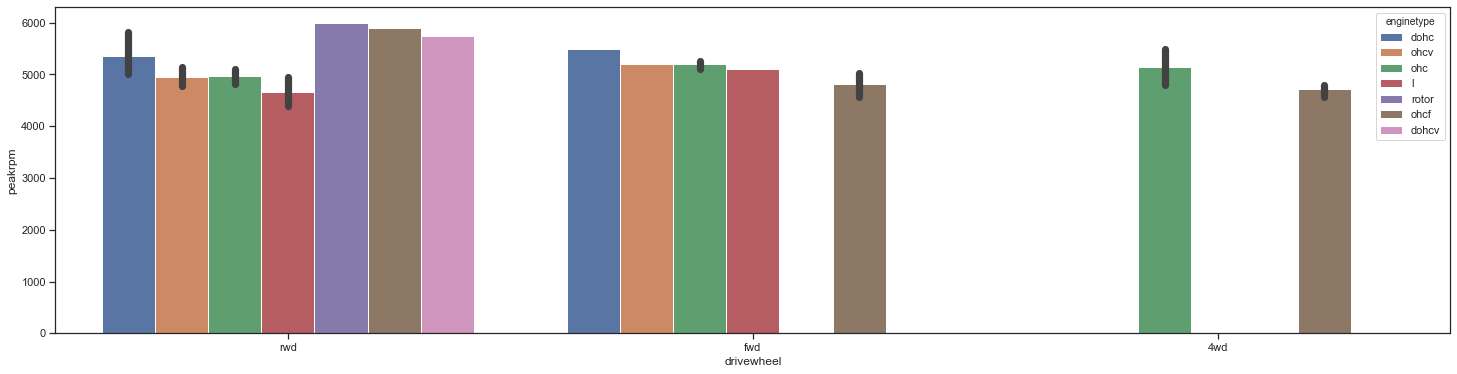

In [31]:
plt.figure(figsize=(25, 6))
sns.barplot(x='drivewheel', 
            y='peakrpm', hue=carPrice_df.enginetype, 
            data=carPrice_df, estimator = np.mean)

**Is there any relation between the Number of Cylinders and Compression-Ratio with fuel type or the number of doors present? Let's find out**


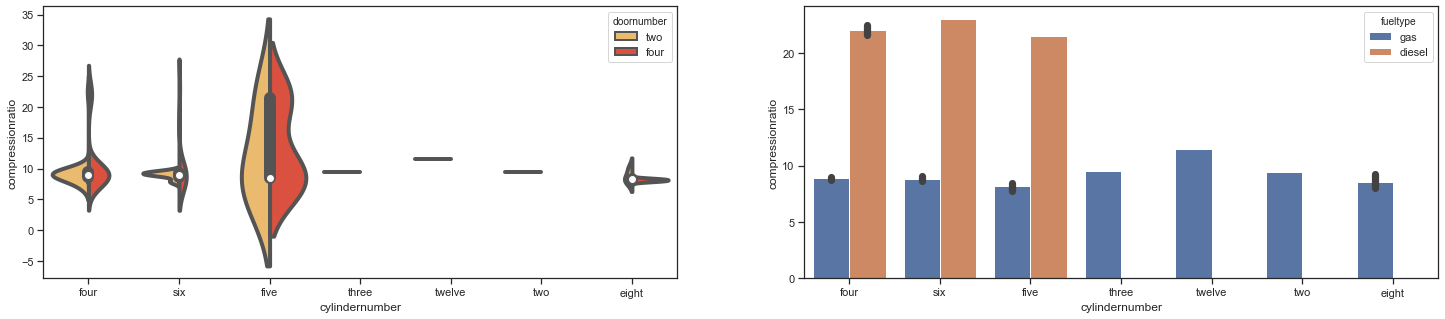

In [32]:
plt.figure(figsize=(25, 5))    
plt.subplot(1,2,1)
sns.violinplot(x='cylindernumber',y='compressionratio',hue='doornumber',data=carPrice_df,split=True, palette='YlOrRd')
plt.subplot(1,2,2)
sns.barplot(x='cylindernumber',y='compressionratio',hue='fueltype', 
            data=carPrice_df, estimator= np.mean)

- Above analysis shows, there is some relationship between cylindernumber and compression ratio. *Cars with 5 cylinders and two doors have the maximum compression ratio*
- Also cars with *4,5 and 6 cylinders are having nearly same compression ratio for diesel type around ~25*. And cars with *2,3,8,12 cylinders don't have diesel variant, only gas types are present*

**Derived Metrics** - 

CurbWeight_Bins - Original curbweight divided by 100

In [33]:
carPrice_df['CurbWeight_Bins'] = ((round(carPrice_df['curbweight']/100)).apply(np.ceil)*10).astype('int64')

In [34]:
carPrice_df.CurbWeight_Bins.unique()

array([250, 280, 230, 300, 310, 240, 270, 320, 340, 350, 150, 190, 210,
       200, 220, 170, 180, 410, 400, 380, 370, 390, 290, 330, 260],
      dtype=int64)

**Is there any relation between CurbWeight (Weight of the car without occupants or baggages) and Mileage for different car bodies? Let's see**

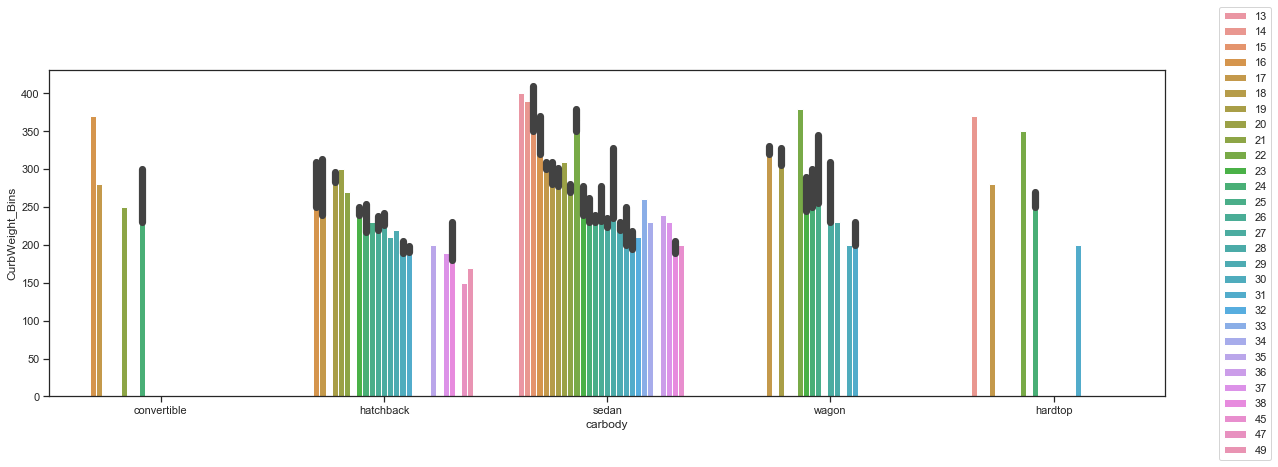

In [35]:
plt.figure(figsize=(20, 6))
g = sns.barplot(x='carbody',
            y='CurbWeight_Bins',
            hue=carPrice_df.citympg, 
            data=carPrice_df, estimator = np.mean)
g.legend(loc='center right', bbox_to_anchor=(1.10, 0.5), ncol=1)

- Form the above analysis, it is clear that there is some linear relationship between curbweight and mileage, *higher the curbweight higher is the mileage.*
- *Max curbweight is found for Sedans which has approximately highest Mileage as well.*

#### Pair plot

<Figure size 2880x720 with 0 Axes>

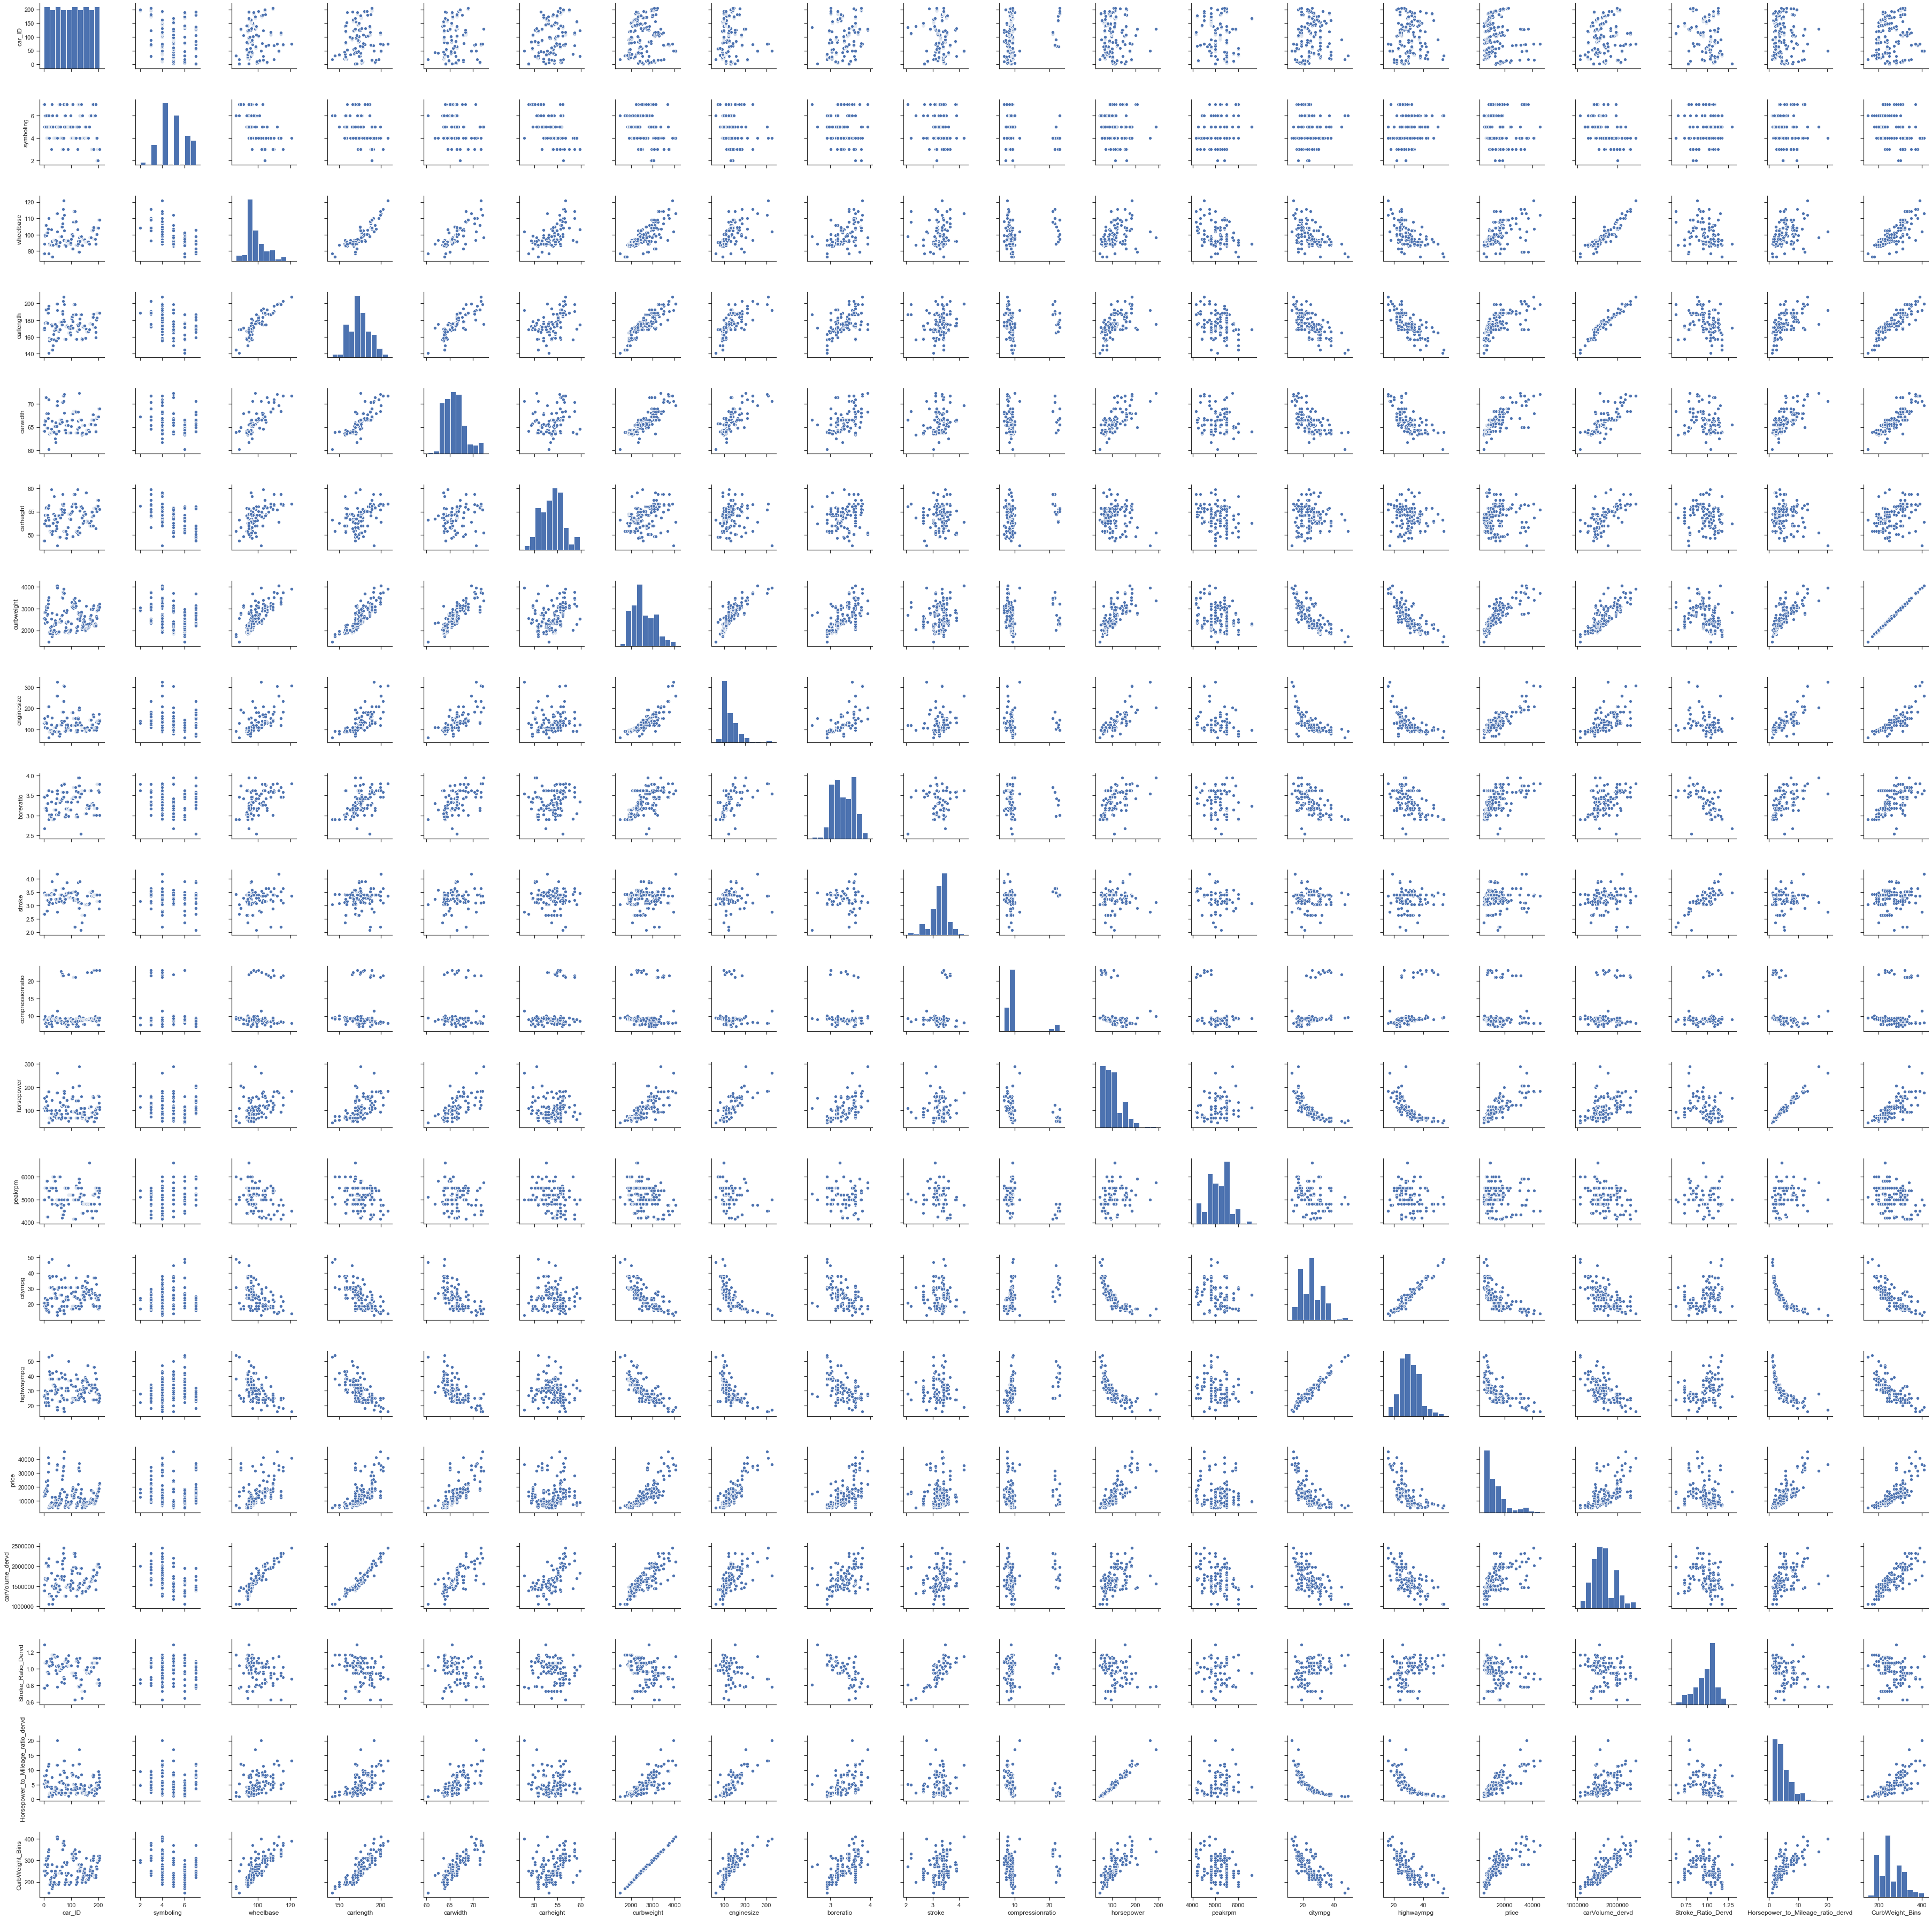

In [36]:
plt.figure(figsize=(40,10))
sns.pairplot(carPrice_df)
plt.show()

#### Correlation Matrix

(20.0, 0.0)

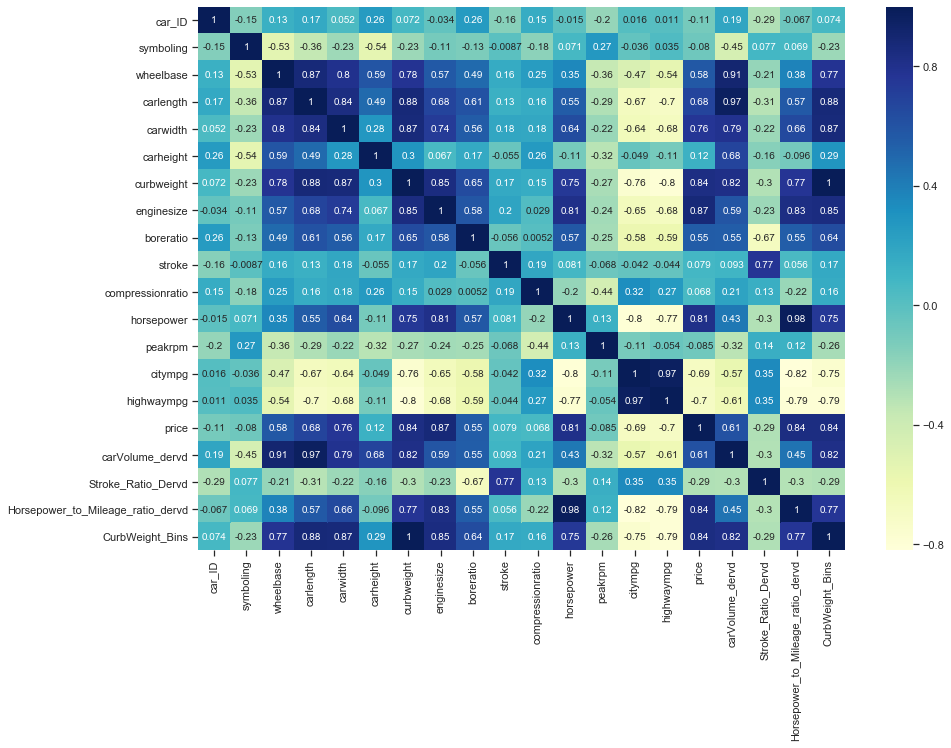

In [37]:
plt.figure(figsize = (14.5, 10))
ax= sns.heatmap(carPrice_df.corr(), annot = True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Some of the higly correlated variables are:-
- highwaympg and citympg - 0.97
- Horseopwer and enginesize - 0.81
- curbweight and carlength - 0.88
- curbweight and carwidth - 0.87
- wheelbase and carlength - 0.87
- carwidth and carlength - 0.84
- enginesize and curbweight - 0.85

Surely there are some high correlation and multicolinearity going on, we will drop them one by one during the further analysis  while building the model

## 4. Data Preparation

### i. Feature Engineering

Let's explore the categorical variable and convert binary categorical variables to numerical categorical variables wherever applicable

#### Dummies for binary categorical variables

In [38]:
carPrice_df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

Coverting fueltype to integers:-

- gas - 1
- diesel - 0

In [39]:
display(carPrice_df.fueltype.value_counts())
print("Converting fueltype to numerical type")
carPrice_df['fueltype']=carPrice_df['fueltype'].map({'gas':1,'diesel':0})
display(carPrice_df.fueltype.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64

Converting fueltype to numerical type


1    185
0     20
Name: fueltype, dtype: int64

In [40]:
display(carPrice_df.aspiration.value_counts())
print("Converting aspiration to numerical type")
carPrice_df['aspiration']=carPrice_df['aspiration'].map({'std':1,'turbo':0})
display(carPrice_df.aspiration.value_counts())

std      168
turbo     37
Name: aspiration, dtype: int64

Converting aspiration to numerical type


1    168
0     37
Name: aspiration, dtype: int64

In [41]:
display(carPrice_df.doornumber.value_counts())
print("Converting doornumber to numerical type")
carPrice_df['doornumber']=carPrice_df['doornumber'].map({'four':1,'two':0})
display(carPrice_df.doornumber.value_counts())

four    115
two      90
Name: doornumber, dtype: int64

Converting doornumber to numerical type


1    115
0     90
Name: doornumber, dtype: int64

In [42]:
display(carPrice_df.enginelocation.value_counts())
print("Converting enginelocation to numerical type")
carPrice_df['enginelocation']=carPrice_df['enginelocation'].map({'front':1,'rear':0})
display(carPrice_df.enginelocation.value_counts())

front    202
rear       3
Name: enginelocation, dtype: int64

Converting enginelocation to numerical type


1    202
0      3
Name: enginelocation, dtype: int64

We will create dummies for the remaining categorical variables
- carbody
- drivewheel
- enginetype
- cylindernumber
- fuelsystem

#### Dummies for remaining non binary categorical variables

We will create n-1 levels of dummies for each categorical variables, 

for example:-

Variable: drivewheel:-
- drivewheel_fwd = 01
- drivewheel_rwd = 10
- drivewheel_4wd = 00

Variable: carbody :-
- sedan = 00000
- hatchback = 01000
- wagon = 00100
- hardtop = 00010
- convertible = 00001

*Similarly for other categorical variables as well, we will create dummies using pandas get_dummies function*

In [43]:
car_df = pd.get_dummies(carPrice_df,drop_first = True )
car_df.head()

car_ID  symboling  fueltype  aspiration  doornumber  enginelocation  \
0       1          7         1           1           0               1   
1       2          7         1           1           0               1   
2       3          5         1           1           0               1   
3       4          6         1           1           1               1   
4       5          6         1           1           1               1   

   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  carVolume_dervd  Stroke_Ratio_Dervd  \
0          27  13495.0          1390480                0.77   
1          27  16500.0          1390480                0.77   
2          26  16500.0          1535815                1.29   
3          30  13950.0          1693485                1.07   
4          22  17450.0          1693485                1.07   

   Horsepower_to_Mileage_ratio_dervd  CurbWeight_Bins  CarName_audi  \
0                           5.285714              250             0   
1                           5.285714              250             0   
2                           8.105263              280             0   
3                           4.250000              230             1   
4                           6.388889              280             1   

   CarName_bmw  CarName_buick  CarName_chevrolet  CarName_dodge  \
0            0              0                  0              0   
1            0              0                  0              0   
2            0              0                  0              0   
3            0              0                  0              0   
4            0              0                  0              0   

   CarName_honda  CarName_isuzu  CarName_jaguar  CarName_mazda  \
0              0              0               0              0   
1              0              0               0              0   
2              0              0               0              0   
3              0              0               0              0   
4              0              0               0              0   

   CarName_mercury  CarName_mitsubishi  CarName_nissan  CarName_peugeot  \
0                0                   0               0                0   
1                0                   0               0                0   
2                0                   0               0                0   
3                0                   0               0                0   
4                0                   0               0                0   

   CarName_plymouth  CarName_porsche  CarName_renault  CarName_saab  \
0                 0                0                0             0   
1                 0                0                0             0   
2                 0                0                0             0   
3                 0                0                0             0   
4                 0                0                0             0   

   CarName_subaru  CarName_toyota  CarName_volkswagen  CarName_volvo  \
0               0               0                   0              0   
1               0               0                   0           

*We will drop car_ID column as it just an integer column for indexing record and doesn't help much in the analysis*

In [44]:
car_df.drop('car_ID',1,inplace=True)
car_df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0          7         1           1           0               1       88.6   
1          7         1           1           0               1       88.6   
2          5         1           1           0               1       94.5   
3          6         1           1           1               1       99.8   
4          6         1           1           1               1       99.4   

   carlength  carwidth  carheight  curbweight  enginesize  boreratio  stroke  \
0      168.8      64.1       48.8        2548         130       3.47    2.68   
1      168.8      64.1       48.8        2548         130       3.47    2.68   
2      171.2      65.5       52.4        2823         152       2.68    3.47   
3      176.6      66.2       54.3        2337         109       3.19    3.40   
4      176.6      66.4       54.3        2824         136       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

   carVolume_dervd  Stroke_Ratio_Dervd  Horsepower_to_Mileage_ratio_dervd  \
0          1390480                0.77                           5.285714   
1          1390480                0.77                           5.285714   
2          1535815                1.29                           8.105263   
3          1693485                1.07                           4.250000   
4          1693485                1.07                           6.388889   

   CurbWeight_Bins  CarName_audi  CarName_bmw  CarName_buick  \
0              250             0            0              0   
1              250             0            0              0   
2              280             0            0              0   
3              230             1            0              0   
4              280             1            0              0   

   CarName_chevrolet  CarName_dodge  CarName_honda  CarName_isuzu  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   

   CarName_jaguar  CarName_mazda  CarName_mercury  CarName_mitsubishi  \
0               0              0                0                   0   
1               0              0                0                   0   
2               0              0                0                   0   
3               0              0                0                   0   
4               0              0                0                   0   

   CarName_nissan  CarName_peugeot  CarName_plymouth  CarName_porsche  \
0               0                0                 0                0   
1               0                0                 0                0   
2               0                0                 0                0   
3               0                0                 0                0   
4               0                0                 0                0   

   CarName_renault  CarName_saab  CarName_subaru  CarName_toyota  \
0                0             0               0               0   
1                0             0               0               0   
2                0             0               0               0   
3                0             0               0               0   
4                0             0               0               0   

   CarName_volkswagen  CarName_volvo  carbody_hardtop  carbody_h

### ii. Splitting data into training and testing sets

In [45]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
df_train.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carVolume_dervd',
       'Stroke_Ratio_Dervd', 'Horsepower_to_Mileage_ratio_dervd',
       'CurbWeight_Bins', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       

In [47]:
df_train.shape

(143, 69)

In [48]:
df_test.shape

(62, 69)

In [49]:
df_test.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carVolume_dervd',
       'Stroke_Ratio_Dervd', 'Horsepower_to_Mileage_ratio_dervd',
       'CurbWeight_Bins', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       

Keeping a backup of unscaled data

In [50]:
df_train_unscaled = df_train.copy()
df_test_unscaled = df_test.copy()

### iii. Recaling the features

In [51]:
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()

Apply scaler to all the numerical variables, except the dummies

In [52]:
numerical_variables = ['wheelbase','carlength','carwidth','carheight','curbweight',
                       'enginesize','boreratio','stroke','compressionratio','horsepower',
                       'peakrpm','citympg','highwaympg','price','carVolume_dervd','Stroke_Ratio_Dervd',
                      'Horsepower_to_Mileage_ratio_dervd']

df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])

In [53]:
df_train.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
122          5         1           1           1               1   0.244828   
125          7         1           1           0               1   0.272414   
166          5         1           1           0               1   0.272414   
1            7         1           1           0               1   0.068966   
199          3         1           0           1               1   0.610345   

     carlength  carwidth  carheight  curbweight  enginesize  boreratio  \
122   0.426016  0.291667   0.265487    0.272692    0.139623   0.230159   
125   0.452033  0.666667   0.212389    0.500388    0.339623   1.000000   
166   0.448780  0.308333   0.424779    0.314973    0.139623   0.444444   
1     0.450407  0.316667   0.088496    0.411171    0.260377   0.626984   
199   0.775610  0.575000   0.858407    0.647401    0.260377   0.746032   

       stroke  compressionratio  horsepower   peakrpm   citympg  highwaympg  \
122  0.525253           0.15000    0.083333  0.551020  0.500000    0.567568   
125  0.464646           0.15625    0.395833  0.551020  0.166667    0.270270   
166  0.449495           0.15000    0.266667  1.000000  0.361111    0.324324   
1    0.247475           0.12500    0.262500  0.346939  0.222222    0.270270   
199  0.484848           0.03125    0.475000  0.387755  0.111111    0.135135   

        price  carVolume_dervd  Stroke_Ratio_Dervd  \
122  0.068818         0.287146            0.696970   
125  0.466890         0.295229            0.242424   
166  0.122110         0.346623            0.484848   
1    0.314446         0.262305            0.212121   
199  0.382131         0.784153            0.363636   

     Horsepower_to_Mileage_ratio_dervd  CurbWeight_Bins  CarName_audi  \
122                           0.061271              220             0   
125                           0.339998              280             0   
166                           0.171771              230             0   
1                             0.222889              250             0   
199                           0.444694              320             0   

     CarName_bmw  CarName_buick  CarName_chevrolet  CarName_dodge  \
122            0              0                  0              0   
125            0              0                  0              0   
166            0              0                  0              0   
1              0              0                  0              0   
199            0              0                  0              0   

     CarName_honda  CarName_isuzu  CarName_jaguar  CarName_mazda  \
122              0              0               0              0   
125              0              0               0              0   
166              0              0               0              0   
1                0              0               0              0   
199              0              0               0              0   

     CarName_mercury  CarName_mitsubishi  CarName_nissan  CarName_peugeot  \
122                0                   0               0                0   
125                0                   0               0                0   
166                0                   0               0                0   
1                  0                   0               0                0   
199                0                   0               0                0   

     CarName_plymouth  CarName_porsche  CarName_renault  CarName_saab  \
122                 1                0                0             0   
125                 0                1                0             0   
166                 0                0                0             0   
1                   0                0                0             0   
199                 0                0                0             0   

     CarName_subaru  CarName_toyota  CarName_volkswagen  CarName_volvo  \
122               0               0           

In [54]:
df_train.describe()

symboling    fueltype  aspiration  doornumber  enginelocation  \
count  143.000000  143.000000  143.000000  143.000000      143.000000   
mean     4.797203    0.909091    0.818182    0.559441        0.993007   
std      1.195999    0.288490    0.387050    0.498199        0.083624   
min      2.000000    0.000000    0.000000    0.000000        0.000000   
25%      4.000000    1.000000    1.000000    0.000000        1.000000   
50%      5.000000    1.000000    1.000000    1.000000        1.000000   
75%      5.000000    1.000000    1.000000    1.000000        1.000000   
max      7.000000    1.000000    1.000000    1.000000        1.000000   

        wheelbase   carlength    carwidth   carheight  curbweight  enginesize  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.411141    0.525476    0.461655    0.509004    0.407878    0.241351   
std      0.205581    0.204848    0.184517    0.215378    0.211269    0.154619   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.272414    0.399187    0.304167    0.353982    0.245539    0.135849   
50%      0.341379    0.502439    0.425000    0.522124    0.355702    0.184906   
75%      0.503448    0.669919    0.550000    0.668142    0.559542    0.301887   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        boreratio      stroke  compressionratio  horsepower     peakrpm  \
count  143.000000  143.000000        143.000000  143.000000  143.000000   
mean     0.497946    0.535389          0.190787    0.227302    0.400029   
std      0.207140    0.157843          0.237181    0.165511    0.196438   
min      0.000000    0.000000          0.000000    0.000000    0.000000   
25%      0.305556    0.464646          0.100000    0.091667    0.265306   
50%      0.500000    0.545455          0.125000    0.191667    0.428571   
75%      0.682540    0.611111          0.150000    0.283333    0.551020   
max      1.000000    1.000000          1.000000    1.000000    1.000000   

          citympg  highwaympg       price  carVolume_dervd  \
count  143.000000  143.000000  143.000000       143.000000   
mean     0.344211    0.374976    0.219310         0.447044   
std      0.186165    0.188477    0.215682         0.222496   
min      0.000000    0.000000    0.000000         0.000000   
25%      0.166667    0.216216    0.067298         0.287146   
50%      0.333333    0.378378    0.140343         0.395694   
75%      0.500000    0.527027    0.313479         0.565077   
max      1.000000    1.000000    1.000000         1.000000   

       Stroke_Ratio_Dervd  Horsepower_to_Mileage_ratio_dervd  CurbWeight_Bins  \
count          143.000000                         143.000000       143.000000   
mean             0.545455                           0.191989       254.125874   
std              0.192981                           0.162919        55.020210   
min              0.000000                           0.000000       150.000000   
25%              0.484848                           0.065867       210.000000   
50%              0.590909                           0.135586       240.000000   
75%              0.674242                           0.249219       290.000000   
max              1.000000                           1.000000       410.000000   

       CarName_audi  CarName_bmw  CarName_buick  CarName_chevrolet  \
count    143.000000   143.000000     143.000000         143.000000   
mean       0.034965     0.041958       0.034965           0.020979   
std        0.184337     0.201198       0.184337           0.143818   
min        0.000000     0.000000       0.000000           0.000000   
25%        0.000000     0.000000       0.000000           0.000000   
50%        0.000000     0.000000       0.000000           0.000000   
75%        0.000000     0.000000       0.000000           0.000000   
max        1.000000     1.000000       1.000000           1.000000   

       CarName_dodge  Ca

#### Dividing into X and Y sets for the model building

In [55]:
#Dividing X and Y on scaled data
y_train = df_train.pop('price')
X_train = df_train

In [56]:
X_train.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carVolume_dervd',
       'Stroke_Ratio_Dervd', 'Horsepower_to_Mileage_ratio_dervd',
       'CurbWeight_Bins', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginety

In [57]:
#Dividing X and Y on unscaled data
y_train_unscaled = df_train_unscaled.pop('price')
X_train_unscaled = df_train_unscaled

# 5. Model Building - Balanced Approach (Automated + Manual)

We will follow here, **Balanced Approach**, where we will use

**Automated Approach** coupled with **Manual fine tuning**

Building a linear model

In [58]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_Model_1 = sm.OLS(y_train, X_train_lm).fit()

Let's check the coefficients

In [59]:
lr_Model_1.params

const                               -6.008036e-02
symboling                           -4.348419e-03
fueltype                            -7.486241e-02
aspiration                          -1.103809e-01
doornumber                           1.286329e-02
enginelocation                      -1.719325e-01
wheelbase                            2.179073e-01
carlength                           -4.103438e-01
carwidth                             1.888546e-01
carheight                           -2.657163e-01
curbweight                          -7.532454e-02
enginesize                           2.171605e+00
boreratio                           -1.128959e+00
stroke                               6.417872e-01
compressionratio                    -1.089620e-01
horsepower                          -1.077346e+00
peakrpm                              2.076807e-01
citympg                              4.489338e-02
highwaympg                           6.700860e-02
carVolume_dervd                      3.119719e-01


Whoa! That's a huge list, let's check the summary now.

In [60]:
lr_Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     60.37
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.71e-49
Time:                        11:30:03   Log-Likelihood:                 291.42
No. Observations:                 143   AIC:                            -458.8
Df Residuals:                      81   BIC:                            -275.1
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0601      0.215     -0.280      0.780      -0.487       0.367
symboling                            -0.0043      0.007     -0.610      0.544      -0.019       0.010
fueltype                             -0.0749      0.144     -0.518      0.606      -0.362       0.213
aspiration                           -0.1104      0.029     -3.813      0.000      -0.168      -0.053
doornumber                            0.0129      0.014      0.892      0.375      -0.016       0.042
enginelocation                       -0.1719      0.093     -1.853      0.068      -0.357       0.013
wheelbase                             0.2179      0.092      2.365      0.020       0.035       0.401
carlength                            -0.4103      0.447     -0.917      0.362      -1.300       0.480
carwidth                              0.1889      0.098      1.935      0.057      -0.005       0.383
carheight                            -0.2657      0.144     -1.844      0.069      -0.552       0.021
curbweight                           -0.0753      0.406     -0.186      0.853      -0.883       0.732
enginesize                            2.1716      0.489      4.437      0.000       1.198       3.145
boreratio                            -1.1290      0.644     -1.752      0.083      -2.411       0.153
stroke                                0.6418      0.820      0.783      0.436      -0.990       2.273
compressionratio                     -0.1090      0.273     -0.399      0.691      -0.652       0.434
horsepower                           -1.0773      0.343     -3.139      0.002      -1.760      -0.395
peakrpm                               0.2077      0.051      4.104      0.000       0.107       0.308
citympg                               0.0449      0.167      0.269      0.788      -0.287       0.377
highwaympg                            0.0670      0.138      0.484      0.630      -0.208       0.342
carVolume_dervd                       0.3120      0.495      0.630      0.531      -0.674       1.298
Stroke_Ratio_Dervd                   -0.8053      0.917     -0.878      0.382      -2.629       1.019
Horsepower_to_Mileage_ratio_dervd     0.9331      0.292      3.194      0.002       0.352       1.514
CurbWeight_Bins                       0.0013      0.001      0.845      0.401      -0.002       0.004
CarName_audi                          0.0587      0.083      0.711      0.479      -0.106       0.223
CarName_bmw                           0.3108      0.090      3.450      0.001       0.132       0.490
CarName_buick                         0.0783      0.089      0.877      0.383      -0.099       0.256
CarName_chevrolet                    -0.0661      0.079     -0.834      0.406      -0.224       0.092
CarName_dodge          

We see some of the variables are having very high p-value, but just looking at the p-value we will not conclude them to be insignificant to drop. Let's check the VIF

### VIF - variance inflation factor

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
60                 cylindernumber_two      inf
54                   enginetype_rotor      inf
58               cylindernumber_three      inf
39                     CarName_subaru      inf
52                    enginetype_ohcf      inf
1                            fueltype      inf
34                    CarName_peugeot      inf
50                       enginetype_l      inf
63                     fuelsystem_idi      inf
4                      enginelocation      inf
19                 Stroke_Ratio_Dervd  2532.09
11                          boreratio  1440.91
12                             stroke  1355.14
18                    carVolume_dervd   982.99
6                           carlength   679.18
9                          curbweight   595.23
56                cylindernumber_four   565.86
21                    CurbWeight_Bins   548.21
10                         enginesize   463.42
13                   compressionratio   339.14
14                         horsepower   261.04
20  Horsepower_to_Mileage_ratio_dervd   183.29
55                cylindernumber_five   100.66
57                 cylindernumber_six    99.04
16                            citympg    77.97
8                           carheight    77.89
65                    fuelsystem_mpfi    72.50
17                         highwaympg    55.06
61                    fuelsystem_2bbl    52.80
40                     CarName_toyota    43.21
45                      carbody_sedan    42.85
33                     CarName_nissan    35.42
44                  carbody_hatchback    35.31
51                     enginetype_ohc    33.72
27                      CarName_honda    30.56
30                      CarName_mazda    30.13
5                           wheelbase    29.03
23                        CarName_bmw    26.58
7                            carwidth    26.24
42                      CarName_volvo    25.57
46                      carbody_wagon    22.26
48                     drivewheel_rwd    21.95
36                    CarName_porsche    21.91
24                      CarName_buick    21.88
32                 CarName_mitsubishi    21.66
29                     CarName_jaguar    20.41
22                       CarName_audi    18.75
59              cylindernumber_twelve    18.03
49                   enginetype_dohcv    15.88
41                 CarName_volkswagen    15.53
26                      CarName_dodge    13.81
66                    fuelsystem_spdi    13.36
38                       CarName_saab    11.37
47                     drivewheel_fwd    11.08
25                  CarName_chevrolet    10.51
2                          aspiration    10.16
62                    fuelsystem_4bbl     9.96
28                      CarName_isuzu     9.12
35                   CarName_plymouth     8.83
53                    enginetype_ohcv     8.72
15                            peakrpm     8.00
37                    CarName_renault     6.97
0                           symboling     5.89
43                    carbody_hardtop     5.19
3                          doornumber     4.17
31                    CarName_mercury      NaN
64                     fuelsystem_mfi      NaN
67                    fuelsystem_spfi      NaN

**So it is quite clear there are certainly huge multicolinearity is going on, instead of dropping them one by one manually.**

**We will make use of RFE. Then later on the features selected by RFE we will again use the VIF/p-value approach to sieve out more insignificant variables.**

In [62]:
def calculateVIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

## Recursive Feature Elimination (RFE)

importing sklearn libraries for RFE and Linear Regression

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In the given dataset we have 24 independent variables, through RFE we will select 15 top variables for now and as we move along we will try to bring get as close as possible to the optimum list of variables

In [64]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 44),
 ('fueltype', False, 32),
 ('aspiration', False, 14),
 ('doornumber', False, 40),
 ('enginelocation', True, 1),
 ('wheelbase', False, 15),
 ('carlength', False, 22),
 ('carwidth', True, 1),
 ('carheight', False, 16),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 4),
 ('stroke', True, 1),
 ('compressionratio', False, 34),
 ('horsepower', False, 3),
 ('peakrpm', False, 13),
 ('citympg', False, 37),
 ('highwaympg', False, 25),
 ('carVolume_dervd', False, 21),
 ('Stroke_Ratio_Dervd', True, 1),
 ('Horsepower_to_Mileage_ratio_dervd', False, 9),
 ('CurbWeight_Bins', False, 49),
 ('CarName_audi', False, 30),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 19),
 ('CarName_chevrolet', False, 29),
 ('CarName_dodge', False, 18),
 ('CarName_honda', False, 23),
 ('CarName_isuzu', False, 38),
 ('CarName_jaguar', False, 10),
 ('CarName_mazda', False, 41),
 ('CarName_mercury', False, 52),
 ('CarName_mitsubishi', False, 8),
 ('CarName_nissan', 

Top 15 columns selected by RFE

In [66]:
Rfe_Cols = X_train.columns[rfe.support_]
Rfe_Cols

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'stroke',
       'Stroke_Ratio_Dervd', 'CarName_bmw', 'CarName_peugeot',
       'CarName_porsche', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')

List of columns eliminated by RFE

In [67]:
DropThruRFE = X_train.columns[~rfe.support_]
DropThruRFE

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'boreratio', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carVolume_dervd',
       'Horsepower_to_Mileage_ratio_dervd', 'CurbWeight_Bins', 'CarName_audi',
       'CarName_buick', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_plymouth',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuels

We will not touch existing X_train dataframe, instead we will create a new one based on X_train with the columns selected by RFE. In the following analysis we will use this variable as X_train

In [68]:
X_train_rfe = X_train[Rfe_Cols]

### Building Linear Regression model (using statsmodel) for the variables selected through RFE

During further analysis we will consider following thresholds to mark a variable as *insignificant.*
- *If P-value greater than 0.05, then insignificant else significant*
- *If VIF value greater than 5, then insignificant else significant*

#### Iteration: 1

In [69]:
X_train_rfe_lm = sm.add_constant(X_train_rfe)
lr_RFE_Model_1 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [70]:
lr_RFE_Model_1.params

const                   -0.150038
enginelocation          -0.350322
carwidth                 0.326151
curbweight               0.386025
enginesize               1.241588
stroke                  -0.794441
Stroke_Ratio_Dervd       0.618303
CarName_bmw              0.284092
CarName_peugeot         -0.104781
CarName_porsche          0.152328
enginetype_rotor         0.239598
cylindernumber_five      0.157522
cylindernumber_four      0.222605
cylindernumber_three     0.454210
cylindernumber_twelve   -0.448485
cylindernumber_two       0.239598
dtype: float64

In [71]:
lr_RFE_Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     144.9
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.88e-71
Time:                        11:30:12   Log-Likelihood:                 218.89
No. Observations:                 143   AIC:                            -407.8
Df Residuals:                     128   BIC:                            -363.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1500      0.086     -1.735      0.085      -0.321       0.021
enginelocation           -0.3503      0.074     -4.743      0.000      -0.496      -0.204
carwidth                  0.3262      0.062      5.292      0.000       0.204       0.448
curbweight                0.3860      0.074      5.194      0.000       0.239       0.533
enginesize                1.2416      0.156      7.961      0.000       0.933       1.550
stroke                   -0.7944      0.112     -7.092      0.000      -1.016      -0.573
Stroke_Ratio_Dervd        0.6183      0.089      6.920      0.000       0.441       0.795
CarName_bmw               0.2841      0.026     10.803      0.000       0.232       0.336
CarName_peugeot          -0.1048      0.026     -3.996      0.000      -0.157      -0.053
CarName_porsche           0.1523      0.044      3.485      0.001       0.066       0.239
enginetype_rotor          0.2396      0.032      7.373      0.000       0.175       0.304
cylindernumber_five       0.1575      0.032      4.880      0.000       0.094       0.221
cylindernumber_four       0.2226      0.037      5.942      0.000       0.148       0.297
cylindernumber_three      0.4542      0.073      6.185      0.000       0.309       0.600
cylindernumber_twelve    -0.4485      0.096     -4.658      0.000      -0.639      -0.258
cylindernumber_two        0.2396      0.032      7.373      0.000       0.175       0.304
==============================================================================
Omnibus:                       21.520   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.773
Skew:                           0.790   Prob(JB):                     1.26e-07
Kurtosis:                       4.684   Cond. No.                     2.16e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
calculateVIF(X_train_rfe)

Features     VIF
9        enginetype_rotor     inf
14     cylindernumber_two     inf
4                  stroke  143.29
0          enginelocation  105.31
5      Stroke_Ratio_Dervd   93.67
3              enginesize   68.63
2              curbweight   54.30
1                carwidth   42.87
11    cylindernumber_four   33.77
10    cylindernumber_five    2.55
13  cylindernumber_twelve    2.52
7         CarName_peugeot    1.80
12   cylindernumber_three    1.57
8         CarName_porsche    1.40
6             CarName_bmw    1.33

Many variables are having High VIFs some are in infinity

As we see **enginetype_rotor** to be topping the list of VIF, we will drop it first and again rebuild the model

In [73]:
X_train_rfe_1 = X_train_rfe.drop(["enginetype_rotor"], axis = 1)

#### Iteration: 2

In [74]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_1)
lr_RFE_Model_2 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [75]:
lr_RFE_Model_2.params

const                   -0.150038
enginelocation          -0.350322
carwidth                 0.326151
curbweight               0.386025
enginesize               1.241588
stroke                  -0.794441
Stroke_Ratio_Dervd       0.618303
CarName_bmw              0.284092
CarName_peugeot         -0.104781
CarName_porsche          0.152328
cylindernumber_five      0.157522
cylindernumber_four      0.222605
cylindernumber_three     0.454210
cylindernumber_twelve   -0.448485
cylindernumber_two       0.479197
dtype: float64

In [76]:
lr_RFE_Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     144.9
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.88e-71
Time:                        11:30:16   Log-Likelihood:                 218.89
No. Observations:                 143   AIC:                            -407.8
Df Residuals:                     128   BIC:                            -363.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1500      0.086     -1.735      0.085      -0.321       0.021
enginelocation           -0.3503      0.074     -4.743      0.000      -0.496      -0.204
carwidth                  0.3262      0.062      5.292      0.000       0.204       0.448
curbweight                0.3860      0.074      5.194      0.000       0.239       0.533
enginesize                1.2416      0.156      7.961      0.000       0.933       1.550
stroke                   -0.7944      0.112     -7.092      0.000      -1.016      -0.573
Stroke_Ratio_Dervd        0.6183      0.089      6.920      0.000       0.441       0.795
CarName_bmw               0.2841      0.026     10.803      0.000       0.232       0.336
CarName_peugeot          -0.1048      0.026     -3.996      0.000      -0.157      -0.053
CarName_porsche           0.1523      0.044      3.485      0.001       0.066       0.239
cylindernumber_five       0.1575      0.032      4.880      0.000       0.094       0.221
cylindernumber_four       0.2226      0.037      5.942      0.000       0.148       0.297
cylindernumber_three      0.4542      0.073      6.185      0.000       0.309       0.600
cylindernumber_twelve    -0.4485      0.096     -4.658      0.000      -0.639      -0.258
cylindernumber_two        0.4792      0.065      7.373      0.000       0.351       0.608
==============================================================================
Omnibus:                       21.520   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.773
Skew:                           0.790   Prob(JB):                     1.26e-07
Kurtosis:                       4.684   Cond. No.                         93.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
calculateVIF(X_train_rfe_1)

Features     VIF
4                  stroke  143.29
0          enginelocation  105.31
5      Stroke_Ratio_Dervd   93.67
3              enginesize   68.63
2              curbweight   54.30
1                carwidth   42.87
10    cylindernumber_four   33.77
13     cylindernumber_two    4.00
9     cylindernumber_five    2.55
12  cylindernumber_twelve    2.52
7         CarName_peugeot    1.80
11   cylindernumber_three    1.57
8         CarName_porsche    1.40
6             CarName_bmw    1.33

As all the p-values are within limits, let's first drop the feature with highest VIF : **stroke**

In [78]:
X_train_rfe_2 = X_train_rfe_1.drop(['stroke'], axis = 1)

#### Iteration : 3

In [79]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_2)
lr_RFE_Model_3 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [80]:
lr_RFE_Model_3.params

const                    0.134003
enginelocation          -0.358297
carwidth                 0.295991
curbweight               0.366006
enginesize               0.474828
Stroke_Ratio_Dervd       0.015049
CarName_bmw              0.252761
CarName_peugeot         -0.099866
CarName_porsche          0.127000
cylindernumber_five      0.048911
cylindernumber_four      0.021488
cylindernumber_three     0.215857
cylindernumber_twelve   -0.004387
cylindernumber_two       0.149740
dtype: float64

In [81]:
lr_RFE_Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     110.1
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.78e-63
Time:                        11:30:19   Log-Likelihood:                 195.19
No. Observations:                 143   AIC:                            -362.4
Df Residuals:                     129   BIC:                            -320.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1340      0.090      1.487      0.139      -0.044       0.312
enginelocation           -0.3583      0.087     -4.127      0.000      -0.530      -0.187
carwidth                  0.2960      0.072      4.095      0.000       0.153       0.439
curbweight                0.3660      0.087      4.191      0.000       0.193       0.539
enginesize                0.4748      0.132      3.593      0.000       0.213       0.736
Stroke_Ratio_Dervd        0.0150      0.032      0.467      0.641      -0.049       0.079
CarName_bmw               0.2528      0.030      8.293      0.000       0.192       0.313
CarName_peugeot          -0.0999      0.031     -3.240      0.002      -0.161      -0.039
CarName_porsche           0.1270      0.051      2.480      0.014       0.026       0.228
cylindernumber_five       0.0489      0.033      1.464      0.146      -0.017       0.115
cylindernumber_four       0.0215      0.029      0.746      0.457      -0.035       0.078
cylindernumber_three      0.2159      0.077      2.812      0.006       0.064       0.368
cylindernumber_twelve    -0.0044      0.086     -0.051      0.959      -0.175       0.166
cylindernumber_two        0.1497      0.053      2.802      0.006       0.044       0.255
==============================================================================
Omnibus:                        9.080   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               11.608
Skew:                           0.389   Prob(JB):                      0.00302
Kurtosis:                       4.160   Cond. No.                         56.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
calculateVIF(X_train_rfe_2)

Features    VIF
0          enginelocation  68.41
2              curbweight  54.26
3              enginesize  44.01
1                carwidth  41.83
9     cylindernumber_four  18.23
4      Stroke_Ratio_Dervd  11.18
12     cylindernumber_two   2.43
8     cylindernumber_five   2.23
6         CarName_peugeot   1.79
11  cylindernumber_twelve   1.70
10   cylindernumber_three   1.36
7         CarName_porsche   1.35
5             CarName_bmw   1.31

Dropping **cylindernumber_twelve** with high p-value

In [83]:
X_train_rfe_3 = X_train_rfe_2.drop(['cylindernumber_twelve'], axis = 1)

#### Iteration :4

In [84]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_3)
lr_RFE_Model_4 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [85]:
lr_RFE_Model_4.params

const                   0.134743
enginelocation         -0.358718
carwidth                0.296330
curbweight              0.367597
enginesize              0.470760
Stroke_Ratio_Dervd      0.015334
CarName_bmw             0.252952
CarName_peugeot        -0.100047
CarName_porsche         0.127322
cylindernumber_five     0.048529
cylindernumber_four     0.021110
cylindernumber_three    0.215361
cylindernumber_two      0.148724
dtype: float64

In [86]:
lr_RFE_Model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     120.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.37e-64
Time:                        11:30:22   Log-Likelihood:                 195.19
No. Observations:                 143   AIC:                            -364.4
Df Residuals:                     130   BIC:                            -325.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1347      0.089      1.521      0.131      -0.041       0.310
enginelocation          -0.3587      0.086     -4.166      0.000      -0.529      -0.188
carwidth                 0.2963      0.072      4.133      0.000       0.154       0.438
curbweight               0.3676      0.081      4.524      0.000       0.207       0.528
enginesize               0.4708      0.105      4.484      0.000       0.263       0.678
Stroke_Ratio_Dervd       0.0153      0.032      0.486      0.628      -0.047       0.078
CarName_bmw              0.2530      0.030      8.395      0.000       0.193       0.313
CarName_peugeot         -0.1000      0.030     -3.281      0.001      -0.160      -0.040
CarName_porsche          0.1273      0.051      2.515      0.013       0.027       0.227
cylindernumber_five      0.0485      0.032      1.496      0.137      -0.016       0.113
cylindernumber_four      0.0211      0.028      0.762      0.448      -0.034       0.076
cylindernumber_three     0.2154      0.076      2.839      0.005       0.065       0.365
cylindernumber_two       0.1487      0.049      3.010      0.003       0.051       0.246
==============================================================================
Omnibus:                        9.247   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               11.866
Skew:                           0.394   Prob(JB):                      0.00265
Kurtosis:                       4.170   Cond. No.                         45.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
calculateVIF(X_train_rfe_3)

Features    VIF
0         enginelocation  67.94
2             curbweight  47.07
1               carwidth  41.67
3             enginesize  28.71
9    cylindernumber_four  17.37
4     Stroke_Ratio_Dervd  10.65
8    cylindernumber_five   2.15
11    cylindernumber_two   2.15
6        CarName_peugeot   1.77
10  cylindernumber_three   1.34
5            CarName_bmw   1.29
7        CarName_porsche   1.27

We will drop **Stroke_Ratio_Dervd** with highest p-value

In [88]:
X_train_rfe_4 = X_train_rfe_3.drop(['Stroke_Ratio_Dervd'], axis =1)

#### Iteration: 5

In [89]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_4)
lr_RFE_Model_5 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [90]:
lr_RFE_Model_5.params

const                   0.145435
enginelocation         -0.356163
carwidth                0.296510
curbweight              0.359771
enginesize              0.472523
CarName_bmw             0.250716
CarName_peugeot        -0.099818
CarName_porsche         0.123009
cylindernumber_five     0.049423
cylindernumber_four     0.018452
cylindernumber_three    0.211640
cylindernumber_two      0.146255
dtype: float64

In [91]:
lr_RFE_Model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     131.9
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.22e-65
Time:                        11:30:26   Log-Likelihood:                 195.06
No. Observations:                 143   AIC:                            -366.1
Df Residuals:                     131   BIC:                            -330.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1454      0.086      1.700      0.092      -0.024       0.315
enginelocation          -0.3562      0.086     -4.157      0.000      -0.526      -0.187
carwidth                 0.2965      0.071      4.148      0.000       0.155       0.438
curbweight               0.3598      0.079      4.531      0.000       0.203       0.517
enginesize               0.4725      0.105      4.517      0.000       0.266       0.679
CarName_bmw              0.2507      0.030      8.444      0.000       0.192       0.309
CarName_peugeot         -0.0998      0.030     -3.283      0.001      -0.160      -0.040
CarName_porsche          0.1230      0.050      2.475      0.015       0.025       0.221
cylindernumber_five      0.0494      0.032      1.531      0.128      -0.014       0.113
cylindernumber_four      0.0185      0.027      0.681      0.497      -0.035       0.072
cylindernumber_three     0.2116      0.075      2.813      0.006       0.063       0.360
cylindernumber_two       0.1463      0.049      2.985      0.003       0.049       0.243
==============================================================================
Omnibus:                        9.062   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               11.447
Skew:                           0.393   Prob(JB):                      0.00327
Kurtosis:                       4.141   Cond. No.                         42.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
calculateVIF(X_train_rfe_4)

Features    VIF
0         enginelocation  48.00
2             curbweight  45.45
1               carwidth  41.59
3             enginesize  28.39
8    cylindernumber_four  17.08
10    cylindernumber_two   2.14
7    cylindernumber_five   2.12
5        CarName_peugeot   1.77
9   cylindernumber_three   1.34
4            CarName_bmw   1.26
6        CarName_porsche   1.26

Dropping **cylindernumber_four** with high p-value

In [93]:
X_train_rfe_5 = X_train_rfe_4.drop(['cylindernumber_four'], axis =1)

#### Iteration: 6

In [94]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_5)
lr_RFE_Model_6 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [95]:
lr_RFE_Model_6.params

const                   0.162171
enginelocation         -0.349634
carwidth                0.298622
curbweight              0.357041
enginesize              0.439812
CarName_bmw             0.244384
CarName_peugeot        -0.094735
CarName_porsche         0.123206
cylindernumber_five     0.037369
cylindernumber_three    0.188375
cylindernumber_two      0.124436
dtype: float64

In [96]:
lr_RFE_Model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     145.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.27e-66
Time:                        11:30:29   Log-Likelihood:                 194.80
No. Observations:                 143   AIC:                            -367.6
Df Residuals:                     132   BIC:                            -335.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1622      0.082      1.982      0.050       0.000       0.324
enginelocation          -0.3496      0.085     -4.114      0.000      -0.518      -0.182
carwidth                 0.2986      0.071      4.190      0.000       0.158       0.440
curbweight               0.3570      0.079      4.512      0.000       0.200       0.514
enginesize               0.4398      0.093      4.742      0.000       0.256       0.623
CarName_bmw              0.2444      0.028      8.684      0.000       0.189       0.300
CarName_peugeot         -0.0947      0.029     -3.221      0.002      -0.153      -0.037
CarName_porsche          0.1232      0.050      2.484      0.014       0.025       0.221
cylindernumber_five      0.0374      0.027      1.387      0.168      -0.016       0.091
cylindernumber_three     0.1884      0.067      2.815      0.006       0.056       0.321
cylindernumber_two       0.1244      0.037      3.362      0.001       0.051       0.198
==============================================================================
Omnibus:                        9.771   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               13.173
Skew:                           0.395   Prob(JB):                      0.00138
Kurtosis:                       4.259   Cond. No.                         37.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
calculateVIF(X_train_rfe_5)

Features    VIF
2            curbweight  45.36
1              carwidth  41.59
3            enginesize  23.56
0        enginelocation  10.78
5       CarName_peugeot   1.65
7   cylindernumber_five   1.56
9    cylindernumber_two   1.30
6       CarName_porsche   1.21
4           CarName_bmw   1.14
8  cylindernumber_three   1.08

Dropping **curbweight** with high VIF

In [98]:
X_train_rfe_6 = X_train_rfe_5.drop(['curbweight'], axis =1)

#### Iteration: 7

In [99]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_6)
lr_RFE_Model_7 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [100]:
lr_RFE_Model_7.params

const                   0.167172
enginelocation         -0.354038
carwidth                0.450085
enginesize              0.731736
CarName_bmw             0.248529
CarName_peugeot        -0.040510
CarName_porsche         0.087981
cylindernumber_five     0.051011
cylindernumber_three    0.187778
cylindernumber_two      0.170879
dtype: float64

In [101]:
lr_RFE_Model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     139.3
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.28e-63
Time:                        11:30:33   Log-Likelihood:                 184.55
No. Observations:                 143   AIC:                            -349.1
Df Residuals:                     133   BIC:                            -319.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1672      0.088      1.910      0.058      -0.006       0.340
enginelocation          -0.3540      0.091     -3.893      0.000      -0.534      -0.174
carwidth                 0.4501      0.067      6.688      0.000       0.317       0.583
enginesize               0.7317      0.071     10.289      0.000       0.591       0.872
CarName_bmw              0.2485      0.030      8.256      0.000       0.189       0.308
CarName_peugeot         -0.0405      0.029     -1.410      0.161      -0.097       0.016
CarName_porsche          0.0880      0.052      1.678      0.096      -0.016       0.192
cylindernumber_five      0.0510      0.029      1.780      0.077      -0.006       0.108
cylindernumber_three     0.1878      0.072      2.622      0.010       0.046       0.329
cylindernumber_two       0.1709      0.038      4.491      0.000       0.096       0.246
==============================================================================
Omnibus:                        8.071   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.174
Skew:                           0.464   Prob(JB):                       0.0168
Kurtosis:                       3.715   Cond. No.                         35.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
calculateVIF(X_train_rfe_6)

Features    VIF
1              carwidth  32.12
2            enginesize  11.68
0        enginelocation  10.78
6   cylindernumber_five   1.54
4       CarName_peugeot   1.37
8    cylindernumber_two   1.20
5       CarName_porsche   1.17
3           CarName_bmw   1.14
7  cylindernumber_three   1.08

Dropping **CarName_peugeot** with high p-value

In [103]:
X_train_rfe_7 = X_train_rfe_6.drop(['CarName_peugeot'], axis=1)

#### Iteration: 8 

In [104]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_7)
lr_RFE_Model_8 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [105]:
lr_RFE_Model_8.params

const                   0.154750
enginelocation         -0.332398
carwidth                0.405782
enginesize              0.764045
CarName_bmw             0.249630
CarName_porsche         0.101540
cylindernumber_five     0.063651
cylindernumber_three    0.178560
cylindernumber_two      0.180195
dtype: float64

In [106]:
lr_RFE_Model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     155.3
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           6.78e-64
Time:                        11:30:36   Log-Likelihood:                 183.49
No. Observations:                 143   AIC:                            -349.0
Df Residuals:                     134   BIC:                            -322.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1547      0.087      1.770      0.079      -0.018       0.328
enginelocation          -0.3324      0.090     -3.695      0.000      -0.510      -0.154
carwidth                 0.4058      0.060      6.794      0.000       0.288       0.524
enginesize               0.7640      0.068     11.307      0.000       0.630       0.898
CarName_bmw              0.2496      0.030      8.265      0.000       0.190       0.309
CarName_porsche          0.1015      0.052      1.963      0.052      -0.001       0.204
cylindernumber_five      0.0637      0.027      2.330      0.021       0.010       0.118
cylindernumber_three     0.1786      0.072      2.495      0.014       0.037       0.320
cylindernumber_two       0.1802      0.038      4.791      0.000       0.106       0.255
==============================================================================
Omnibus:                        9.318   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.694
Skew:                           0.509   Prob(JB):                      0.00785
Kurtosis:                       3.768   Cond. No.                         34.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
calculateVIF(X_train_rfe_7)

Features    VIF
1              carwidth  25.37
2            enginesize  10.57
0        enginelocation   9.55
5   cylindernumber_five   1.39
7    cylindernumber_two   1.17
4       CarName_porsche   1.15
3           CarName_bmw   1.14
6  cylindernumber_three   1.07

Dropping **carwidth** with high VIF

In [108]:
X_train_rfe_8 = X_train_rfe_7.drop(['carwidth'], axis =1)

#### Iteration: 9

In [109]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_8)
lr_RFE_Model_9 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [110]:
lr_RFE_Model_9.params

const                   0.046564
enginelocation         -0.130002
enginesize              1.125313
CarName_bmw             0.223130
CarName_porsche         0.187341
cylindernumber_five     0.147555
cylindernumber_three    0.084350
cylindernumber_two      0.252909
dtype: float64

In [111]:
lr_RFE_Model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     128.0
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.11e-56
Time:                        11:30:40   Log-Likelihood:                 162.33
No. Observations:                 143   AIC:                            -308.7
Df Residuals:                     135   BIC:                            -284.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0466      0.099      0.469      0.640      -0.150       0.243
enginelocation          -0.1300      0.098     -1.326      0.187      -0.324       0.064
enginesize               1.1253      0.048     23.364      0.000       1.030       1.221
CarName_bmw              0.2231      0.035      6.449      0.000       0.155       0.292
CarName_porsche          0.1873      0.058      3.233      0.002       0.073       0.302
cylindernumber_five      0.1476      0.028      5.241      0.000       0.092       0.203
cylindernumber_three     0.0844      0.081      1.040      0.300      -0.076       0.245
cylindernumber_two       0.2529      0.042      6.073      0.000       0.171       0.335
==============================================================================
Omnibus:                       13.265   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.918
Skew:                           0.596   Prob(JB):                     0.000350
Kurtosis:                       4.118   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
calculateVIF(X_train_rfe_8)

Features   VIF
1            enginesize  4.16
0        enginelocation  3.78
2           CarName_bmw  1.12
3       CarName_porsche  1.11
4   cylindernumber_five  1.11
6    cylindernumber_two  1.08
5  cylindernumber_three  1.03

Dropping **cylindernumber_three** , with high p-value

In [113]:
X_train_rfe_9 = X_train_rfe_8.drop(['cylindernumber_three'], axis =1)

#### Iteration : 10

In [114]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_9)
lr_RFE_Model_10 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [115]:
lr_RFE_Model_10.params

const                  0.049242
enginelocation        -0.130439
enginesize             1.118508
CarName_bmw            0.223679
CarName_porsche        0.188079
cylindernumber_five    0.147613
cylindernumber_two     0.250963
dtype: float64

In [116]:
lr_RFE_Model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     149.1
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.83e-57
Time:                        11:30:44   Log-Likelihood:                 161.76
No. Observations:                 143   AIC:                            -309.5
Df Residuals:                     136   BIC:                            -288.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0492      0.099      0.496      0.621      -0.147       0.246
enginelocation         -0.1304      0.098     -1.330      0.186      -0.324       0.064
enginesize              1.1185      0.048     23.433      0.000       1.024       1.213
CarName_bmw             0.2237      0.035      6.464      0.000       0.155       0.292
CarName_porsche         0.1881      0.058      3.245      0.001       0.073       0.303
cylindernumber_five     0.1476      0.028      5.241      0.000       0.092       0.203
cylindernumber_two      0.2510      0.042      6.030      0.000       0.169       0.333
==============================================================================
Omnibus:                       13.052   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.213
Skew:                           0.604   Prob(JB):                     0.000497
Kurtosis:                       4.046   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
calculateVIF(X_train_rfe_9)

Features   VIF
1           enginesize  4.09
0       enginelocation  3.68
2          CarName_bmw  1.12
3      CarName_porsche  1.11
4  cylindernumber_five  1.11
5   cylindernumber_two  1.08

Dropping **enginelocation** with highest p_value

In [118]:
X_train_rfe_10 = X_train_rfe_9.drop(['enginelocation'],axis=1)

#### Iteration : 11

In [119]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_10)
lr_RFE_Model_11 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [120]:
lr_RFE_Model_11.params

const                 -0.081647
enginesize             1.120489
CarName_bmw            0.223316
CarName_porsche        0.231098
cylindernumber_five    0.147393
cylindernumber_two     0.251327
dtype: float64

In [121]:
lr_RFE_Model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     177.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.83e-58
Time:                        11:30:47   Log-Likelihood:                 160.83
No. Observations:                 143   AIC:                            -309.7
Df Residuals:                     137   BIC:                            -291.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0816      0.013     -6.241      0.000      -0.108      -0.056
enginesize              1.1205      0.048     23.421      0.000       1.026       1.215
CarName_bmw             0.2233      0.035      6.435      0.000       0.155       0.292
CarName_porsche         0.2311      0.048      4.793      0.000       0.136       0.326
cylindernumber_five     0.1474      0.028      5.219      0.000       0.092       0.203
cylindernumber_two      0.2513      0.042      6.022      0.000       0.169       0.334
==============================================================================
Omnibus:                       12.218   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.754
Skew:                           0.590   Prob(JB):                      0.00103
Kurtosis:                       3.956   Cond. No.                         8.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
calculateVIF(X_train_rfe_10)

Features   VIF
0           enginesize  1.30
1          CarName_bmw  1.11
3  cylindernumber_five  1.11
2      CarName_porsche  1.07
4   cylindernumber_two  1.00

**We will stop here with these list of features, as both VIF and p-values are within limits**

In [123]:
X_train_rfe_10.columns

Index(['enginesize', 'CarName_bmw', 'CarName_porsche', 'cylindernumber_five',
       'cylindernumber_two'],
      dtype='object')

Revisitng our correlation matrix, to check if any correlation is going on still

(5.0, 0.0)

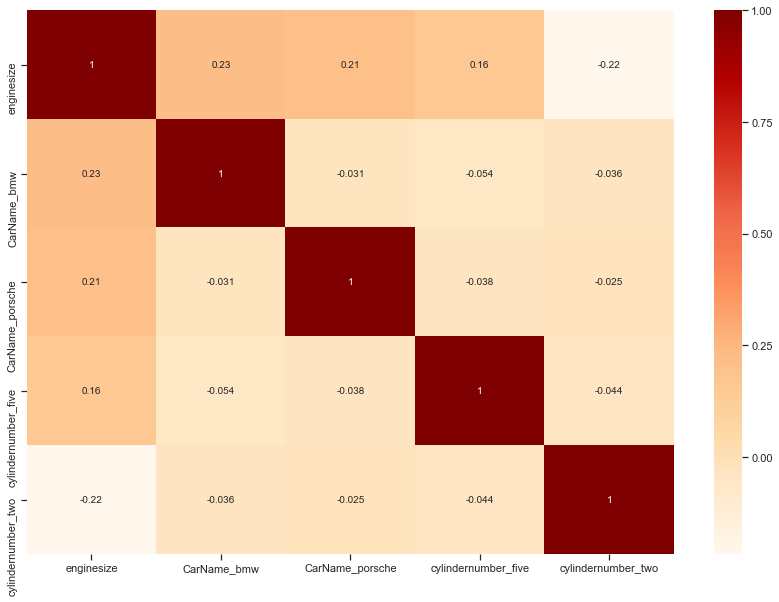

In [124]:
plt.figure(figsize = (14.5, 10))
ax= sns.heatmap(X_train_rfe_10.corr(), annot = True, cmap="OrRd")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

###### Correlation matrix looks good! Also after 11th iteration we see there is no more variables with p_value > 0.05 or VIF > 5. 

From the final model summary statistics on training data we observe:
- The difference between R Squared and Adjusted R Squared is very minimal from our final model
- **R_Squared = 86.6%,   Adjusted_R_Squared = 86.1%**
- *F Statistic* got increased from **144.9 to 177.6**
- *Probability of F statistic* **4.83e-58** which is the least and is well below 0.05
- AIC and BIC values are also low

Hence we will consider below set of variables to be significant and will use in prediction:

- *enginesize* - Size of the engine is an important variable in predicting price
- *CarName_bmw* - Records with BMW as the companyname are the significant in predicting price
- *CarName_porsche* - Records with Porsche as the companyname are the significant in predicting price
- *cylindernumber_five* - Cars with 5 cylinders placed are sinificant to make conclusions in predicting price
- *cylindernumber_two* - Cars with  cylinders placed are sinificant to make conclusions in predicting price

### Residual Analysis for the training data

In [125]:
y_train_price = lr_RFE_Model_11.predict(X_train_rfe_lm)

Text(0.5, 0, 'Errors')

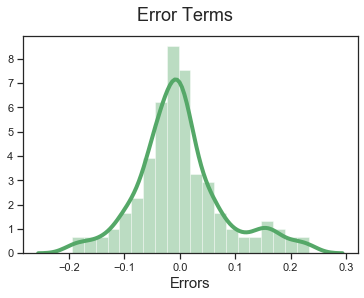

In [126]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20, color='g')
fig.suptitle('Error Terms', fontsize = 18)
plt.xlabel('Errors', fontsize = 15)  

Our, residual error terms looks to maintain normal distrubution. Time to make some predictions now!

## ii. Model Predictions and calculating R2 score on test set

Fitting test data on the scaler used for training set

In [127]:
df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])

In [128]:
df_test

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
160          4         1           1           1               1   0.313793   
186          6         1           1           1               1   0.368966   
59           5         1           1           0               1   0.420690   
165          5         1           1           0               1   0.272414   
140          6         1           1           0               1   0.231034   
64           4         1           1           1               1   0.420690   
198          2         1           0           1               1   0.610345   
75           5         1           0           0               1   0.555172   
172          6         1           1           0               1   0.406897   
104          7         1           1           0               1   0.162069   
200          3         1           1           1               1   0.775862   
136          7         1           0           0               1   0.431034   
111          4         1           1           1               1   0.734483   
41           4         1           1           1               1   0.341379   
73           4         1           1           1               1   1.182759   
31           6         1           1           0               1   0.000000   
156          4         1           1           1               1   0.313793   
133          6         1           1           1               1   0.431034   
65           4         1           1           1               1   0.631034   
83           7         1           0           0               1   0.320690   
195          3         1           1           1               1   0.610345   
197          3         1           1           1               1   0.610345   
126          7         1           1           0               0   0.100000   
118          5         1           1           0               1   0.244828   
167          6         1           1           0               1   0.406897   
101          4         1           1           1               1   0.475862   
124          7         1           0           0               1   0.320690   
69           4         0           0           0               1   0.693103   
11           4         1           1           1               1   0.503448   
46           6         1           1           0               1   0.324138   
77           6         1           1           0               1   0.244828   
15           4         1           1           1               1   0.582759   
110          4         0           0           1               1   0.951724   
201          3         1           0           1               1   0.775862   
115          4         1           1           1               1   0.734483   
174          3         0           0           1               1   0.544828   
134          7         1           1           0               1   0.431034   
169          6         1           1           0               1   0.406897   
92           5         1           1           1               1   0.272414   
173          3         1           1           1               1   0.544828   
74           5         1           1           0               1   0.875862   
3            6         1           1           1               1   0.455172   
157          4         1           1           1               1   0.313793   
81           7         1           1           0               1   0.334483   
32           5         1           1           0               1   0.244828   
99           4         1           1           1               1   0.365517   
26           5         1           1           1               1   0.244828   
88           3         1           1           1               1   0.334483   
184          6         0           1           1               1   0.368966   
187          6         0           0           1       

In [129]:
df_test.describe()

symboling   fueltype  aspiration  doornumber  enginelocation  \
count  62.000000  62.000000   62.000000   62.000000       62.000000   
mean    4.919355   0.887097    0.822581    0.564516        0.967742   
std     1.358620   0.319058    0.385142    0.499868        0.178127   
min     2.000000   0.000000    0.000000    0.000000        0.000000   
25%     4.000000   1.000000    1.000000    0.000000        1.000000   
50%     5.000000   1.000000    1.000000    1.000000        1.000000   
75%     6.000000   1.000000    1.000000    1.000000        1.000000   
max     7.000000   1.000000    1.000000    1.000000        1.000000   

       wheelbase  carlength   carwidth  carheight  curbweight  enginesize  \
count  62.000000  62.000000  62.000000  62.000000   62.000000   62.000000   
mean    0.437764   0.559481   0.480376   0.559663    0.428470    0.265673   
std     0.212861   0.189947   0.165440   0.215811    0.179488    0.162820   
min     0.000000   0.056911   0.183333   0.141593    0.128394    0.067925   
25%     0.313793   0.459350   0.358333   0.384956    0.305275    0.177358   
50%     0.387931   0.547967   0.441667   0.588496    0.406129    0.226415   
75%     0.570690   0.719919   0.516667   0.699115    0.564876    0.316038   
max     1.182759   1.089431   0.975000   1.061947    0.935609    0.932075   

       boreratio     stroke  compressionratio  horsepower    peakrpm  \
count  62.000000  62.000000         62.000000   62.000000  62.000000   
mean    0.556580   0.544314          0.209375    0.248858   0.393351   
std     0.228484   0.160738          0.273690    0.163376   0.192092   
min    -0.111111  -0.060606          0.000000    0.016667   0.000000   
25%     0.404762   0.484848          0.093750    0.107292   0.265306   
50%     0.563492   0.585859          0.125000    0.218750   0.346939   
75%     0.746032   0.641414          0.150000    0.295833   0.540816   
max     0.888889   0.863636          1.000000    0.662500   1.000000   

         citympg  highwaympg      price  carVolume_dervd  Stroke_Ratio_Dervd  \
count  62.000000   62.000000  62.000000        62.000000           62.000000   
mean    0.328405    0.363993   0.239439         0.491597            0.518817   
std     0.172009    0.181845   0.233076         0.217487            0.176646   
min     0.027778   -0.027027   0.007763         0.002387            0.000000   
25%     0.166667    0.216216   0.092342         0.341981            0.378788   
50%     0.305556    0.351351   0.158991         0.462539            0.515152   
75%     0.444444    0.459459   0.317243         0.668324            0.666667   
max     0.694444    0.810811   1.112855         1.105445            0.818182   

       Horsepower_to_Mileage_ratio_dervd  CurbWeight_Bins  CarName_audi  \
count                          62.000000        62.000000     62.000000   
mean                            0.207341       258.870968      0.032258   
std                             0.159522        46.451273      0.178127   
min                             0.020077       180.000000      0.000000   
25%                             0.079412       230.000000      0.000000   
50%                             0.170263       250.000000      0.000000   
75%                             0.246624       297.500000      0.000000   
max                             0.633557       390.000000      1.000000   

       CarName_bmw  CarName_buick  CarName_chevrolet  CarName_dodge  \
count    62.000000      62.000000               62.0      62.000000   
mean      0.032258       0.048387                0.0       0.048387   
std       0.178127       0.216335                0.0       0.216335   
min       0.000000       0.000000                0.0       0.000000   
25%       0.000000       0.000000                0.0       0.000000   
50%       0.000000       0.000000                0.0       0.000000   
75%       0.000000       0.000000                0.0       0.000000   
max       1.000000       1.000000                0.0       

Dividing test data into X and y_test

In [130]:
y_test = df_test.pop('price')
X_test = df_test

In [131]:
X_test_11 = sm.add_constant(X_test)

Dropping all the insignificant variables in X_test as well

In [132]:
X_test_lm_11 = X_test_11.drop(DropThruRFE,1)
X_test_lm_11 = X_test_lm_11.drop(['enginetype_rotor','stroke','cylindernumber_twelve','enginelocation','Stroke_Ratio_Dervd',
                                 'cylindernumber_four','curbweight','CarName_peugeot','carwidth','cylindernumber_three'], 1)

In [133]:
X_test_lm_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 6 columns):
const                  62 non-null float64
enginesize             62 non-null float64
CarName_bmw            62 non-null uint8
CarName_porsche        62 non-null uint8
cylindernumber_five    62 non-null uint8
cylindernumber_two     62 non-null uint8
dtypes: float64(2), uint8(4)
memory usage: 1.7 KB


###### Predicting X_test prices based on our final model lr_RFE_Model_11

In [134]:
y_pred_lm_11 = lr_RFE_Model_11.predict(X_test_lm_11)
y_pred_lm_11.head()

160    0.074799
186    0.121310
59     0.176277
165    0.074799
140    0.117082
dtype: float64

## Calculating the R-squared score on the test set - for balanced with scaled data model

In [135]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lm_11)

0.8661555026972831

**R Squared score is 86.6% for the test set**

## iii. Model Evaluation

##### Test vs predicted data scatter plot

Text(0, 0.5, 'y_pred')

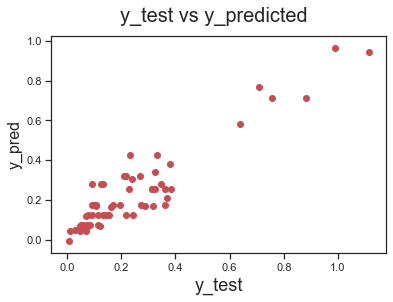

In [136]:
fig = plt.figure()
plt.scatter(y_test, y_pred_lm_11, color = 'r')
fig.suptitle('y_test vs y_predicted', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [137]:
print(y_test.shape)
print(y_pred_lm_11.shape)

(62,)
(62,)


##### Test vs predicted data line plot

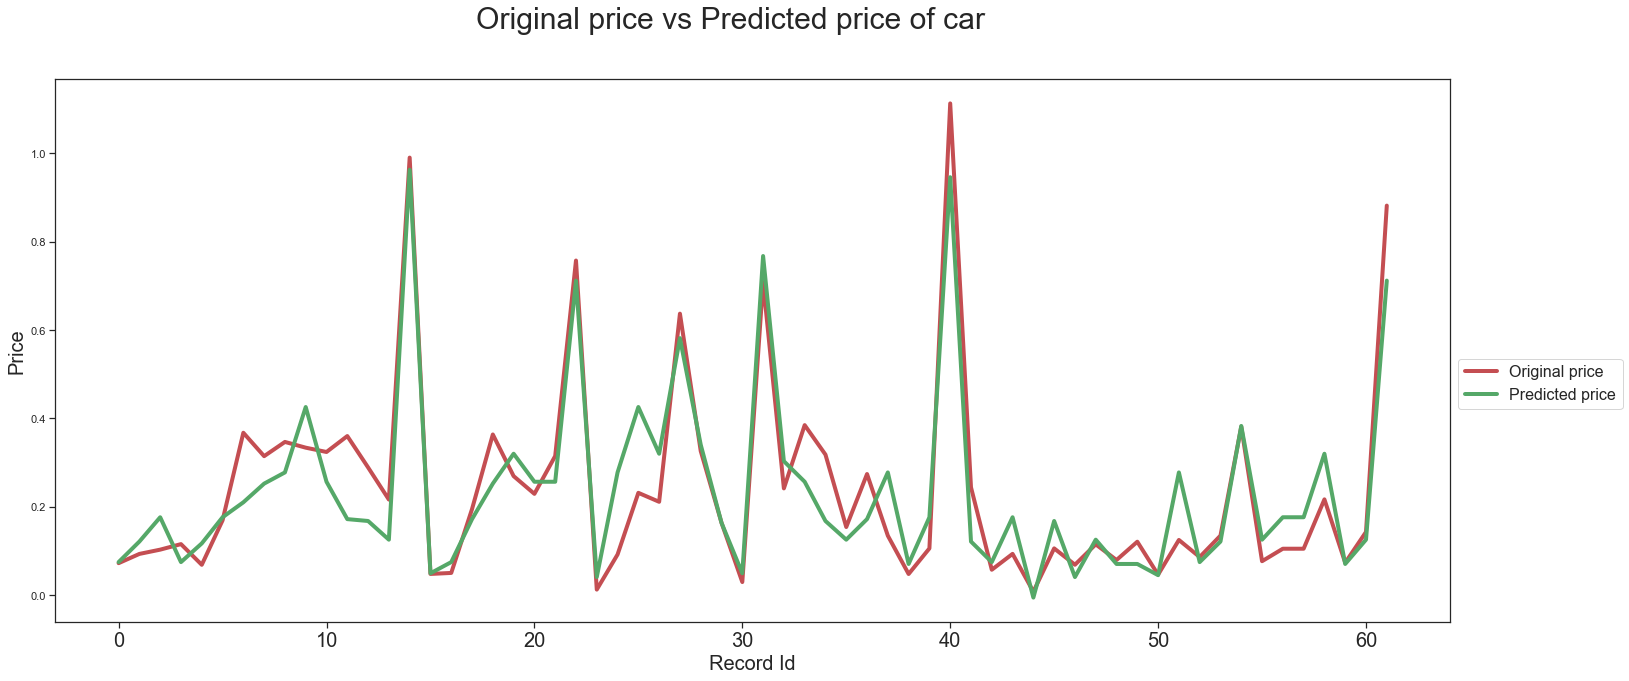

In [138]:
#sns.set(font_scale=2)
sns.set(style="ticks", rc={"lines.linewidth": 4})
record_id = [i for i in np.arange(0,62)]
fig = plt.figure(figsize=(25, 10))
sns.lineplot(record_id, y_test, color='r', label= 'Original price')
sns.lineplot(record_id, y_pred_lm_11, color = 'g', label = 'Predicted price')
fig.suptitle('Original price vs Predicted price of car', fontsize=30)
plt.xlabel('Record Id', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.xticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(bbox_to_anchor=(1, 0.5), ncol=1,fontsize=16, loc = 'best' )

## Linear Regression Equation

In [139]:
lr_RFE_Model_11.params

const                 -0.081647
enginesize             1.120489
CarName_bmw            0.223316
CarName_porsche        0.231098
cylindernumber_five    0.147393
cylindernumber_two     0.251327
dtype: float64

Equation to predict the value of price can be given by:-
$ price = 1.120489  \times  enginesize + 0.223316  \times  CarName_bmw + 0.231098 \times CarName_porsche + 0.147393 \times cylindernumber_five + 0.251327 \times cylindernumber_two$

# 6. Model Building - Manual Approach with backward selection

**We will build this model completely using manual approach with backward selection and compare the R Squares between the first model and this one. Then we will select the final best model. Based on the comparision. The number of iterations will be more for sure, but let's see if we can get an improved R Squared value**

In this model we will work with X_train and will *not* use RFE

#### Iteration 1

In [140]:
X_train_lm = sm.add_constant(X_train)
lr_Model_1 = sm.OLS(y_train, X_train_lm).fit()

In [141]:
lr_Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     60.37
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.71e-49
Time:                        11:32:22   Log-Likelihood:                 291.42
No. Observations:                 143   AIC:                            -458.8
Df Residuals:                      81   BIC:                            -275.1
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0601      0.215     -0.280      0.780      -0.487       0.367
symboling                            -0.0043      0.007     -0.610      0.544      -0.019       0.010
fueltype                             -0.0749      0.144     -0.518      0.606      -0.362       0.213
aspiration                           -0.1104      0.029     -3.813      0.000      -0.168      -0.053
doornumber                            0.0129      0.014      0.892      0.375      -0.016       0.042
enginelocation                       -0.1719      0.093     -1.853      0.068      -0.357       0.013
wheelbase                             0.2179      0.092      2.365      0.020       0.035       0.401
carlength                            -0.4103      0.447     -0.917      0.362      -1.300       0.480
carwidth                              0.1889      0.098      1.935      0.057      -0.005       0.383
carheight                            -0.2657      0.144     -1.844      0.069      -0.552       0.021
curbweight                           -0.0753      0.406     -0.186      0.853      -0.883       0.732
enginesize                            2.1716      0.489      4.437      0.000       1.198       3.145
boreratio                            -1.1290      0.644     -1.752      0.083      -2.411       0.153
stroke                                0.6418      0.820      0.783      0.436      -0.990       2.273
compressionratio                     -0.1090      0.273     -0.399      0.691      -0.652       0.434
horsepower                           -1.0773      0.343     -3.139      0.002      -1.760      -0.395
peakrpm                               0.2077      0.051      4.104      0.000       0.107       0.308
citympg                               0.0449      0.167      0.269      0.788      -0.287       0.377
highwaympg                            0.0670      0.138      0.484      0.630      -0.208       0.342
carVolume_dervd                       0.3120      0.495      0.630      0.531      -0.674       1.298
Stroke_Ratio_Dervd                   -0.8053      0.917     -0.878      0.382      -2.629       1.019
Horsepower_to_Mileage_ratio_dervd     0.9331      0.292      3.194      0.002       0.352       1.514
CurbWeight_Bins                       0.0013      0.001      0.845      0.401      -0.002       0.004
CarName_audi                          0.0587      0.083      0.711      0.479      -0.106       0.223
CarName_bmw                           0.3108      0.090      3.450      0.001       0.132       0.490
CarName_buick                         0.0783      0.089      0.877      0.383      -0.099       0.256
CarName_chevrolet                    -0.0661      0.079     -0.834      0.406      -0.224       0.092
CarName_dodge          

In [142]:
calculateVIF(X_train)

Features      VIF
60                 cylindernumber_two      inf
54                   enginetype_rotor      inf
58               cylindernumber_three      inf
39                     CarName_subaru      inf
52                    enginetype_ohcf      inf
1                            fueltype      inf
34                    CarName_peugeot      inf
50                       enginetype_l      inf
63                     fuelsystem_idi      inf
4                      enginelocation      inf
19                 Stroke_Ratio_Dervd  2532.09
11                          boreratio  1440.91
12                             stroke  1355.14
18                    carVolume_dervd   982.99
6                           carlength   679.18
9                          curbweight   595.23
56                cylindernumber_four   565.86
21                    CurbWeight_Bins   548.21
10                         enginesize   463.42
13                   compressionratio   339.14
14                         horsepower   261.04
20  Horsepower_to_Mileage_ratio_dervd   183.29
55                cylindernumber_five   100.66
57                 cylindernumber_six    99.04
16                            citympg    77.97
8                           carheight    77.89
65                    fuelsystem_mpfi    72.50
17                         highwaympg    55.06
61                    fuelsystem_2bbl    52.80
40                     CarName_toyota    43.21
45                      carbody_sedan    42.85
33                     CarName_nissan    35.42
44                  carbody_hatchback    35.31
51                     enginetype_ohc    33.72
27                      CarName_honda    30.56
30                      CarName_mazda    30.13
5                           wheelbase    29.03
23                        CarName_bmw    26.58
7                            carwidth    26.24
42                      CarName_volvo    25.57
46                      carbody_wagon    22.26
48                     drivewheel_rwd    21.95
36                    CarName_porsche    21.91
24                      CarName_buick    21.88
32                 CarName_mitsubishi    21.66
29                     CarName_jaguar    20.41
22                       CarName_audi    18.75
59              cylindernumber_twelve    18.03
49                   enginetype_dohcv    15.88
41                 CarName_volkswagen    15.53
26                      CarName_dodge    13.81
66                    fuelsystem_spdi    13.36
38                       CarName_saab    11.37
47                     drivewheel_fwd    11.08
25                  CarName_chevrolet    10.51
2                          aspiration    10.16
62                    fuelsystem_4bbl     9.96
28                      CarName_isuzu     9.12
35                   CarName_plymouth     8.83
53                    enginetype_ohcv     8.72
15                            peakrpm     8.00
37                    CarName_renault     6.97
0                           symboling     5.89
43                    carbody_hardtop     5.19
3                          doornumber     4.17
31                    CarName_mercury      NaN
64                     fuelsystem_mfi      NaN
67                    fuelsystem_spfi      NaN

Dropping **fuelsystem_mfi** with highest p-value

In [143]:
X_train_1 = X_train.drop(['fuelsystem_mfi'],1)

#### Iteration 2

In [144]:
X_train_lm = sm.add_constant(X_train_1)
lr_Model_2 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     60.37
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.71e-49
Time:                        11:32:24   Log-Likelihood:                 291.42
No. Observations:                 143   AIC:                            -458.8
Df Residuals:                      81   BIC:                            -275.1
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0601      0.215     -0.280      0.780      -0.487       0.367
symboling                            -0.0043      0.007     -0.610      0.544      -0.019       0.010
fueltype                             -0.0749      0.144     -0.518      0.606      -0.362       0.213
aspiration                           -0.1104      0.029     -3.813      0.000      -0.168      -0.053
doornumber                            0.0129      0.014      0.892      0.375      -0.016       0.042
enginelocation                       -0.1719      0.093     -1.853      0.068      -0.357       0.013
wheelbase                             0.2179      0.092      2.365      0.020       0.035       0.401
carlength                            -0.4103      0.447     -0.917      0.362      -1.300       0.480
carwidth                              0.1889      0.098      1.935      0.057      -0.005       0.383
carheight                            -0.2657      0.144     -1.844      0.069      -0.552       0.021
curbweight                           -0.0753      0.406     -0.186      0.853      -0.883       0.732
enginesize                            2.1716      0.489      4.437      0.000       1.198       3.145
boreratio                            -1.1290      0.644     -1.752      0.083      -2.411       0.153
stroke                                0.6418      0.820      0.783      0.436      -0.990       2.273
compressionratio                     -0.1090      0.273     -0.399      0.691      -0.652       0.434
horsepower                           -1.0773      0.343     -3.139      0.002      -1.760      -0.395
peakrpm                               0.2077      0.051      4.104      0.000       0.107       0.308
citympg                               0.0449      0.167      0.269      0.788      -0.287       0.377
highwaympg                            0.0670      0.138      0.484      0.630      -0.208       0.342
carVolume_dervd                       0.3120      0.495      0.630      0.531      -0.674       1.298
Stroke_Ratio_Dervd                   -0.8053      0.917     -0.878      0.382      -2.629       1.019
Horsepower_to_Mileage_ratio_dervd     0.9331      0.292      3.194      0.002       0.352       1.514
CurbWeight_Bins                       0.0013      0.001      0.845      0.401      -0.002       0.004
CarName_audi                          0.0587      0.083      0.711      0.479      -0.106       0.223
CarName_bmw                           0.3108      0.090      3.450      0.001       0.132       0.490
CarName_buick                         0.0783      0.089      0.877      0.383      -0.099       0.256
CarName_chevrolet                    -0.0661      0.079     -0.834      0.406      -0.224       0.092
CarName_dodge          

In [145]:
calculateVIF(X_train_1)

Features      VIF
60                 cylindernumber_two      inf
54                   enginetype_rotor      inf
58               cylindernumber_three      inf
39                     CarName_subaru      inf
52                    enginetype_ohcf      inf
1                            fueltype      inf
34                    CarName_peugeot      inf
50                       enginetype_l      inf
63                     fuelsystem_idi      inf
4                      enginelocation      inf
19                 Stroke_Ratio_Dervd  2532.09
11                          boreratio  1440.91
12                             stroke  1355.14
18                    carVolume_dervd   982.99
6                           carlength   679.18
9                          curbweight   595.23
56                cylindernumber_four   565.86
21                    CurbWeight_Bins   548.21
10                         enginesize   463.42
13                   compressionratio   339.14
14                         horsepower   261.04
20  Horsepower_to_Mileage_ratio_dervd   183.29
55                cylindernumber_five   100.66
57                 cylindernumber_six    99.04
16                            citympg    77.97
8                           carheight    77.89
64                    fuelsystem_mpfi    72.50
17                         highwaympg    55.06
61                    fuelsystem_2bbl    52.80
40                     CarName_toyota    43.21
45                      carbody_sedan    42.85
33                     CarName_nissan    35.42
44                  carbody_hatchback    35.31
51                     enginetype_ohc    33.72
27                      CarName_honda    30.56
30                      CarName_mazda    30.13
5                           wheelbase    29.03
23                        CarName_bmw    26.58
7                            carwidth    26.24
42                      CarName_volvo    25.57
46                      carbody_wagon    22.26
48                     drivewheel_rwd    21.95
36                    CarName_porsche    21.91
24                      CarName_buick    21.88
32                 CarName_mitsubishi    21.66
29                     CarName_jaguar    20.41
22                       CarName_audi    18.75
59              cylindernumber_twelve    18.03
49                   enginetype_dohcv    15.88
41                 CarName_volkswagen    15.53
26                      CarName_dodge    13.81
65                    fuelsystem_spdi    13.36
38                       CarName_saab    11.37
47                     drivewheel_fwd    11.08
25                  CarName_chevrolet    10.51
2                          aspiration    10.16
62                    fuelsystem_4bbl     9.96
28                      CarName_isuzu     9.12
35                   CarName_plymouth     8.83
53                    enginetype_ohcv     8.72
15                            peakrpm     8.00
37                    CarName_renault     6.97
0                           symboling     5.89
43                    carbody_hardtop     5.19
3                          doornumber     4.17
31                    CarName_mercury      NaN
66                    fuelsystem_spfi      NaN

Dropping **cylindernumber_two** with highest VIF in two consecutive models

In [146]:
X_train_2 = X_train_1.drop(['cylindernumber_two'],1)

#### Iteration 3

In [147]:
X_train_lm = sm.add_constant(X_train_2)
lr_Model_3 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     60.37
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.71e-49
Time:                        11:32:26   Log-Likelihood:                 291.42
No. Observations:                 143   AIC:                            -458.8
Df Residuals:                      81   BIC:                            -275.1
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0601      0.215     -0.280      0.780      -0.487       0.367
symboling                            -0.0043      0.007     -0.610      0.544      -0.019       0.010
fueltype                             -0.0749      0.144     -0.518      0.606      -0.362       0.213
aspiration                           -0.1104      0.029     -3.813      0.000      -0.168      -0.053
doornumber                            0.0129      0.014      0.892      0.375      -0.016       0.042
enginelocation                       -0.1719      0.093     -1.853      0.068      -0.357       0.013
wheelbase                             0.2179      0.092      2.365      0.020       0.035       0.401
carlength                            -0.4103      0.447     -0.917      0.362      -1.300       0.480
carwidth                              0.1889      0.098      1.935      0.057      -0.005       0.383
carheight                            -0.2657      0.144     -1.844      0.069      -0.552       0.021
curbweight                           -0.0753      0.406     -0.186      0.853      -0.883       0.732
enginesize                            2.1716      0.489      4.437      0.000       1.198       3.145
boreratio                            -1.1290      0.644     -1.752      0.083      -2.411       0.153
stroke                                0.6418      0.820      0.783      0.436      -0.990       2.273
compressionratio                     -0.1090      0.273     -0.399      0.691      -0.652       0.434
horsepower                           -1.0773      0.343     -3.139      0.002      -1.760      -0.395
peakrpm                               0.2077      0.051      4.104      0.000       0.107       0.308
citympg                               0.0449      0.167      0.269      0.788      -0.287       0.377
highwaympg                            0.0670      0.138      0.484      0.630      -0.208       0.342
carVolume_dervd                       0.3120      0.495      0.630      0.531      -0.674       1.298
Stroke_Ratio_Dervd                   -0.8053      0.917     -0.878      0.382      -2.629       1.019
Horsepower_to_Mileage_ratio_dervd     0.9331      0.292      3.194      0.002       0.352       1.514
CurbWeight_Bins                       0.0013      0.001      0.845      0.401      -0.002       0.004
CarName_audi                          0.0587      0.083      0.711      0.479      -0.106       0.223
CarName_bmw                           0.3108      0.090      3.450      0.001       0.132       0.490
CarName_buick                         0.0783      0.089      0.877      0.383      -0.099       0.256
CarName_chevrolet                    -0.0661      0.079     -0.834      0.406      -0.224       0.092
CarName_dodge          

In [148]:
calculateVIF(X_train_2)

Features      VIF
50                       enginetype_l      inf
52                    enginetype_ohcf      inf
58               cylindernumber_three      inf
39                     CarName_subaru      inf
1                            fueltype      inf
34                    CarName_peugeot      inf
62                     fuelsystem_idi      inf
4                      enginelocation      inf
19                 Stroke_Ratio_Dervd  2532.09
11                          boreratio  1440.91
12                             stroke  1355.14
18                    carVolume_dervd   982.99
6                           carlength   679.18
9                          curbweight   595.23
56                cylindernumber_four   565.86
21                    CurbWeight_Bins   548.21
10                         enginesize   463.42
13                   compressionratio   339.14
14                         horsepower   261.04
20  Horsepower_to_Mileage_ratio_dervd   183.29
54                   enginetype_rotor   128.86
55                cylindernumber_five   100.66
57                 cylindernumber_six    99.04
16                            citympg    77.97
8                           carheight    77.89
63                    fuelsystem_mpfi    72.50
17                         highwaympg    55.06
60                    fuelsystem_2bbl    52.80
40                     CarName_toyota    43.21
45                      carbody_sedan    42.85
33                     CarName_nissan    35.42
44                  carbody_hatchback    35.31
51                     enginetype_ohc    33.72
27                      CarName_honda    30.56
30                      CarName_mazda    30.13
5                           wheelbase    29.03
23                        CarName_bmw    26.58
7                            carwidth    26.24
42                      CarName_volvo    25.57
46                      carbody_wagon    22.26
48                     drivewheel_rwd    21.95
36                    CarName_porsche    21.91
24                      CarName_buick    21.88
32                 CarName_mitsubishi    21.66
29                     CarName_jaguar    20.41
22                       CarName_audi    18.75
59              cylindernumber_twelve    18.03
49                   enginetype_dohcv    15.88
41                 CarName_volkswagen    15.53
26                      CarName_dodge    13.81
64                    fuelsystem_spdi    13.36
38                       CarName_saab    11.37
47                     drivewheel_fwd    11.08
25                  CarName_chevrolet    10.51
2                          aspiration    10.16
61                    fuelsystem_4bbl     9.96
28                      CarName_isuzu     9.12
35                   CarName_plymouth     8.83
53                    enginetype_ohcv     8.72
15                            peakrpm     8.00
37                    CarName_renault     6.97
0                           symboling     5.89
43                    carbody_hardtop     5.19
3                          doornumber     4.17
31                    CarName_mercury      NaN
65                    fuelsystem_spfi      NaN

Dropping **fuelsystem_spfi** with highest p-value

In [149]:
X_train_3 = X_train_2.drop(['fuelsystem_spfi'],1)

#### Iteration 4

In [150]:
X_train_lm = sm.add_constant(X_train_3)
lr_Model_4 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     60.37
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.71e-49
Time:                        11:32:28   Log-Likelihood:                 291.42
No. Observations:                 143   AIC:                            -458.8
Df Residuals:                      81   BIC:                            -275.1
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0601      0.215     -0.280      0.780      -0.487       0.367
symboling                            -0.0043      0.007     -0.610      0.544      -0.019       0.010
fueltype                             -0.0749      0.144     -0.518      0.606      -0.362       0.213
aspiration                           -0.1104      0.029     -3.813      0.000      -0.168      -0.053
doornumber                            0.0129      0.014      0.892      0.375      -0.016       0.042
enginelocation                       -0.1719      0.093     -1.853      0.068      -0.357       0.013
wheelbase                             0.2179      0.092      2.365      0.020       0.035       0.401
carlength                            -0.4103      0.447     -0.917      0.362      -1.300       0.480
carwidth                              0.1889      0.098      1.935      0.057      -0.005       0.383
carheight                            -0.2657      0.144     -1.844      0.069      -0.552       0.021
curbweight                           -0.0753      0.406     -0.186      0.853      -0.883       0.732
enginesize                            2.1716      0.489      4.437      0.000       1.198       3.145
boreratio                            -1.1290      0.644     -1.752      0.083      -2.411       0.153
stroke                                0.6418      0.820      0.783      0.436      -0.990       2.273
compressionratio                     -0.1090      0.273     -0.399      0.691      -0.652       0.434
horsepower                           -1.0773      0.343     -3.139      0.002      -1.760      -0.395
peakrpm                               0.2077      0.051      4.104      0.000       0.107       0.308
citympg                               0.0449      0.167      0.269      0.788      -0.287       0.377
highwaympg                            0.0670      0.138      0.484      0.630      -0.208       0.342
carVolume_dervd                       0.3120      0.495      0.630      0.531      -0.674       1.298
Stroke_Ratio_Dervd                   -0.8053      0.917     -0.878      0.382      -2.629       1.019
Horsepower_to_Mileage_ratio_dervd     0.9331      0.292      3.194      0.002       0.352       1.514
CurbWeight_Bins                       0.0013      0.001      0.845      0.401      -0.002       0.004
CarName_audi                          0.0587      0.083      0.711      0.479      -0.106       0.223
CarName_bmw                           0.3108      0.090      3.450      0.001       0.132       0.490
CarName_buick                         0.0783      0.089      0.877      0.383      -0.099       0.256
CarName_chevrolet                    -0.0661      0.079     -0.834      0.406      -0.224       0.092
CarName_dodge          

In [151]:
calculateVIF(X_train_3)

Features      VIF
50                       enginetype_l      inf
52                    enginetype_ohcf      inf
58               cylindernumber_three      inf
39                     CarName_subaru      inf
1                            fueltype      inf
34                    CarName_peugeot      inf
62                     fuelsystem_idi      inf
4                      enginelocation      inf
19                 Stroke_Ratio_Dervd  2532.09
11                          boreratio  1440.91
12                             stroke  1355.14
18                    carVolume_dervd   982.99
6                           carlength   679.18
9                          curbweight   595.23
56                cylindernumber_four   565.86
21                    CurbWeight_Bins   548.21
10                         enginesize   463.42
13                   compressionratio   339.14
14                         horsepower   261.04
20  Horsepower_to_Mileage_ratio_dervd   183.29
54                   enginetype_rotor   128.86
55                cylindernumber_five   100.66
57                 cylindernumber_six    99.04
16                            citympg    77.97
8                           carheight    77.89
63                    fuelsystem_mpfi    72.50
17                         highwaympg    55.06
60                    fuelsystem_2bbl    52.80
40                     CarName_toyota    43.21
45                      carbody_sedan    42.85
33                     CarName_nissan    35.42
44                  carbody_hatchback    35.31
51                     enginetype_ohc    33.72
27                      CarName_honda    30.56
30                      CarName_mazda    30.13
5                           wheelbase    29.03
23                        CarName_bmw    26.58
7                            carwidth    26.24
42                      CarName_volvo    25.57
46                      carbody_wagon    22.26
48                     drivewheel_rwd    21.95
36                    CarName_porsche    21.91
24                      CarName_buick    21.88
32                 CarName_mitsubishi    21.66
29                     CarName_jaguar    20.41
22                       CarName_audi    18.75
59              cylindernumber_twelve    18.03
49                   enginetype_dohcv    15.88
41                 CarName_volkswagen    15.53
26                      CarName_dodge    13.81
64                    fuelsystem_spdi    13.36
38                       CarName_saab    11.37
47                     drivewheel_fwd    11.08
25                  CarName_chevrolet    10.51
2                          aspiration    10.16
61                    fuelsystem_4bbl     9.96
28                      CarName_isuzu     9.12
35                   CarName_plymouth     8.83
53                    enginetype_ohcv     8.72
15                            peakrpm     8.00
37                    CarName_renault     6.97
0                           symboling     5.89
43                    carbody_hardtop     5.19
3                          doornumber     4.17
31                    CarName_mercury      NaN

Dropping **enginetype_l** with highest VIF in two consecutive models

In [152]:
X_train_4 = X_train_3.drop(['enginetype_l'],1)

#### Iteration 5

In [153]:
X_train_lm = sm.add_constant(X_train_4)
lr_Model_5 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     60.37
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.71e-49
Time:                        11:32:30   Log-Likelihood:                 291.42
No. Observations:                 143   AIC:                            -458.8
Df Residuals:                      81   BIC:                            -275.1
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0601      0.215     -0.280      0.780      -0.487       0.367
symboling                            -0.0043      0.007     -0.610      0.544      -0.019       0.010
fueltype                             -0.0749      0.144     -0.518      0.606      -0.362       0.213
aspiration                           -0.1104      0.029     -3.813      0.000      -0.168      -0.053
doornumber                            0.0129      0.014      0.892      0.375      -0.016       0.042
enginelocation                       -0.1719      0.093     -1.853      0.068      -0.357       0.013
wheelbase                             0.2179      0.092      2.365      0.020       0.035       0.401
carlength                            -0.4103      0.447     -0.917      0.362      -1.300       0.480
carwidth                              0.1889      0.098      1.935      0.057      -0.005       0.383
carheight                            -0.2657      0.144     -1.844      0.069      -0.552       0.021
curbweight                           -0.0753      0.406     -0.186      0.853      -0.883       0.732
enginesize                            2.1716      0.489      4.437      0.000       1.198       3.145
boreratio                            -1.1290      0.644     -1.752      0.083      -2.411       0.153
stroke                                0.6418      0.820      0.783      0.436      -0.990       2.273
compressionratio                     -0.1090      0.273     -0.399      0.691      -0.652       0.434
horsepower                           -1.0773      0.343     -3.139      0.002      -1.760      -0.395
peakrpm                               0.2077      0.051      4.104      0.000       0.107       0.308
citympg                               0.0449      0.167      0.269      0.788      -0.287       0.377
highwaympg                            0.0670      0.138      0.484      0.630      -0.208       0.342
carVolume_dervd                       0.3120      0.495      0.630      0.531      -0.674       1.298
Stroke_Ratio_Dervd                   -0.8053      0.917     -0.878      0.382      -2.629       1.019
Horsepower_to_Mileage_ratio_dervd     0.9331      0.292      3.194      0.002       0.352       1.514
CurbWeight_Bins                       0.0013      0.001      0.845      0.401      -0.002       0.004
CarName_audi                          0.0587      0.083      0.711      0.479      -0.106       0.223
CarName_bmw                           0.3108      0.090      3.450      0.001       0.132       0.490
CarName_buick                         0.0783      0.089      0.877      0.383      -0.099       0.256
CarName_chevrolet                    -0.0661      0.079     -0.834      0.406      -0.224       0.092
CarName_dodge          

In [154]:
calculateVIF(X_train_4)

Features      VIF
61                     fuelsystem_idi      inf
4                      enginelocation      inf
1                            fueltype      inf
39                     CarName_subaru      inf
51                    enginetype_ohcf      inf
19                 Stroke_Ratio_Dervd  2532.09
11                          boreratio  1440.91
12                             stroke  1355.14
18                    carVolume_dervd   982.99
6                           carlength   679.18
9                          curbweight   595.23
55                cylindernumber_four   565.86
21                    CurbWeight_Bins   548.21
10                         enginesize   463.42
13                   compressionratio   339.14
14                         horsepower   261.04
20  Horsepower_to_Mileage_ratio_dervd   183.29
53                   enginetype_rotor   128.86
54                cylindernumber_five   100.66
56                 cylindernumber_six    99.04
16                            citympg    77.97
8                           carheight    77.89
62                    fuelsystem_mpfi    72.50
17                         highwaympg    55.06
59                    fuelsystem_2bbl    52.80
40                     CarName_toyota    43.21
45                      carbody_sedan    42.85
33                     CarName_nissan    35.42
44                  carbody_hatchback    35.31
50                     enginetype_ohc    33.72
27                      CarName_honda    30.56
30                      CarName_mazda    30.13
5                           wheelbase    29.03
23                        CarName_bmw    26.58
7                            carwidth    26.24
42                      CarName_volvo    25.57
57               cylindernumber_three    25.52
34                    CarName_peugeot    22.60
46                      carbody_wagon    22.26
48                     drivewheel_rwd    21.95
36                    CarName_porsche    21.91
24                      CarName_buick    21.88
32                 CarName_mitsubishi    21.66
29                     CarName_jaguar    20.41
22                       CarName_audi    18.75
58              cylindernumber_twelve    18.03
49                   enginetype_dohcv    15.88
41                 CarName_volkswagen    15.53
26                      CarName_dodge    13.81
63                    fuelsystem_spdi    13.36
38                       CarName_saab    11.37
47                     drivewheel_fwd    11.08
25                  CarName_chevrolet    10.51
2                          aspiration    10.16
60                    fuelsystem_4bbl     9.96
28                      CarName_isuzu     9.12
35                   CarName_plymouth     8.83
52                    enginetype_ohcv     8.72
15                            peakrpm     8.00
37                    CarName_renault     6.97
0                           symboling     5.89
43                    carbody_hardtop     5.19
3                          doornumber     4.17
31                    CarName_mercury      NaN

Dropping **CarName_toyota** with highest P-value

In [155]:
X_train_5 = X_train_4.drop(['CarName_toyota'],1)

#### Iteration 6

In [156]:
X_train_lm = sm.add_constant(X_train_5)
lr_Model_6 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     62.14
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           9.72e-50
Time:                        11:32:32   Log-Likelihood:                 291.42
No. Observations:                 143   AIC:                            -460.8
Df Residuals:                      82   BIC:                            -280.1
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0578      0.194     -0.298      0.766      -0.444       0.328
symboling                            -0.0043      0.007     -0.613      0.542      -0.018       0.010
fueltype                             -0.0738      0.138     -0.537      0.593      -0.347       0.200
aspiration                           -0.1103      0.029     -3.839      0.000      -0.168      -0.053
doornumber                            0.0129      0.014      0.898      0.372      -0.016       0.041
enginelocation                       -0.1717      0.092     -1.871      0.065      -0.354       0.011
wheelbase                             0.2185      0.088      2.480      0.015       0.043       0.394
carlength                            -0.4083      0.437     -0.934      0.353      -1.278       0.462
carwidth                              0.1889      0.097      1.948      0.055      -0.004       0.382
carheight                            -0.2647      0.138     -1.921      0.058      -0.539       0.009
curbweight                           -0.0759      0.403     -0.188      0.851      -0.877       0.726
enginesize                            2.1675      0.458      4.730      0.000       1.256       3.079
boreratio                            -1.1319      0.630     -1.796      0.076      -2.385       0.122
stroke                                0.6495      0.756      0.860      0.393      -0.854       2.153
compressionratio                     -0.1091      0.271     -0.402      0.689      -0.649       0.430
horsepower                           -1.0769      0.341     -3.161      0.002      -1.755      -0.399
peakrpm                               0.2080      0.049      4.249      0.000       0.111       0.305
citympg                               0.0466      0.152      0.306      0.760      -0.256       0.349
highwaympg                            0.0662      0.134      0.496      0.622      -0.199       0.332
carVolume_dervd                       0.3090      0.478      0.646      0.520      -0.642       1.260
Stroke_Ratio_Dervd                   -0.8136      0.850     -0.957      0.341      -2.505       0.878
Horsepower_to_Mileage_ratio_dervd     0.9337      0.289      3.226      0.002       0.358       1.509
CurbWeight_Bins                       0.0013      0.001      0.855      0.395      -0.002       0.004
CarName_audi                          0.0573      0.060      0.956      0.342      -0.062       0.177
CarName_bmw                           0.3088      0.045      6.848      0.000       0.219       0.399
CarName_buick                         0.0768      0.069      1.120      0.266      -0.060       0.213
CarName_chevrolet                    -0.0679      0.040     -1.706      0.092      -0.147       0.011
CarName_dodge          

In [157]:
calculateVIF(X_train_5)

Features      VIF
60                     fuelsystem_idi      inf
50                    enginetype_ohcf      inf
4                      enginelocation      inf
39                     CarName_subaru      inf
1                            fueltype      inf
19                 Stroke_Ratio_Dervd  2204.68
11                          boreratio  1395.15
12                             stroke  1165.29
18                    carVolume_dervd   926.32
6                           carlength   657.24
9                          curbweight   593.64
21                    CurbWeight_Bins   543.83
54                cylindernumber_four   464.33
10                         enginesize   411.12
13                   compressionratio   338.97
14                         horsepower   260.44
20  Horsepower_to_Mileage_ratio_dervd   182.12
52                   enginetype_rotor   112.96
55                 cylindernumber_six    86.88
53                cylindernumber_five    77.65
61                    fuelsystem_mpfi    72.40
8                           carheight    72.16
16                            citympg    65.67
58                    fuelsystem_2bbl    52.77
17                         highwaympg    51.88
44                      carbody_sedan    36.27
43                  carbody_hatchback    29.17
5                           wheelbase    26.87
49                     enginetype_ohc    26.77
7                            carwidth    26.24
56               cylindernumber_three    22.53
47                     drivewheel_rwd    21.94
45                      carbody_wagon    19.28
57              cylindernumber_twelve    17.78
29                     CarName_jaguar    17.07
27                      CarName_honda    16.04
36                    CarName_porsche    15.70
48                   enginetype_dohcv    14.40
62                    fuelsystem_spdi    13.35
24                      CarName_buick    13.10
34                    CarName_peugeot    12.37
46                     drivewheel_fwd    11.05
2                          aspiration    10.14
22                       CarName_audi    10.00
59                    fuelsystem_4bbl     9.96
51                    enginetype_ohcv     8.71
41                      CarName_volvo     8.50
15                            peakrpm     7.57
23                        CarName_bmw     6.74
0                           symboling     5.89
38                       CarName_saab     5.35
32                 CarName_mitsubishi     5.34
42                    carbody_hardtop     4.62
33                     CarName_nissan     4.32
3                          doornumber     4.17
26                      CarName_dodge     4.08
40                 CarName_volkswagen     3.42
30                      CarName_mazda     3.19
35                   CarName_plymouth     3.06
37                    CarName_renault     2.82
25                  CarName_chevrolet     2.68
28                      CarName_isuzu     2.06
31                    CarName_mercury      NaN

Dropping **fuelsystem_idi** with highest VIF

In [158]:
X_train_6 = X_train_5.drop(['fuelsystem_idi'],1)

#### Iteration 7

In [159]:
X_train_lm = sm.add_constant(X_train_6)
lr_Model_7 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     62.14
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           9.72e-50
Time:                        11:32:33   Log-Likelihood:                 291.42
No. Observations:                 143   AIC:                            -460.8
Df Residuals:                      82   BIC:                            -280.1
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0458      0.293     -0.157      0.876      -0.628       0.536
symboling                            -0.0043      0.007     -0.613      0.542      -0.018       0.010
fueltype                             -0.0898      0.228     -0.395      0.694      -0.543       0.363
aspiration                           -0.1103      0.029     -3.839      0.000      -0.168      -0.053
doornumber                            0.0129      0.014      0.898      0.372      -0.016       0.041
enginelocation                       -0.1677      0.115     -1.460      0.148      -0.396       0.061
wheelbase                             0.2185      0.088      2.480      0.015       0.043       0.394
carlength                            -0.4083      0.437     -0.934      0.353      -1.278       0.462
carwidth                              0.1889      0.097      1.948      0.055      -0.004       0.382
carheight                            -0.2647      0.138     -1.921      0.058      -0.539       0.009
curbweight                           -0.0759      0.403     -0.188      0.851      -0.877       0.726
enginesize                            2.1675      0.458      4.730      0.000       1.256       3.079
boreratio                            -1.1319      0.630     -1.796      0.076      -2.385       0.122
stroke                                0.6495      0.756      0.860      0.393      -0.854       2.153
compressionratio                     -0.1091      0.271     -0.402      0.689      -0.649       0.430
horsepower                           -1.0769      0.341     -3.161      0.002      -1.755      -0.399
peakrpm                               0.2080      0.049      4.249      0.000       0.111       0.305
citympg                               0.0466      0.152      0.306      0.760      -0.256       0.349
highwaympg                            0.0662      0.134      0.496      0.622      -0.199       0.332
carVolume_dervd                       0.3090      0.478      0.646      0.520      -0.642       1.260
Stroke_Ratio_Dervd                   -0.8136      0.850     -0.957      0.341      -2.505       0.878
Horsepower_to_Mileage_ratio_dervd     0.9337      0.289      3.226      0.002       0.358       1.509
CurbWeight_Bins                       0.0013      0.001      0.855      0.395      -0.002       0.004
CarName_audi                          0.0573      0.060      0.956      0.342      -0.062       0.177
CarName_bmw                           0.3088      0.045      6.848      0.000       0.219       0.399
CarName_buick                         0.0768      0.069      1.120      0.266      -0.060       0.213
CarName_chevrolet                    -0.0679      0.040     -1.706      0.092      -0.147       0.011
CarName_dodge          

In [160]:
calculateVIF(X_train_6)

Features       VIF
4                      enginelocation  12591.96
19                 Stroke_Ratio_Dervd   2204.68
11                          boreratio   1395.15
12                             stroke   1165.29
50                    enginetype_ohcf   1100.50
39                     CarName_subaru    978.75
18                    carVolume_dervd    926.32
6                           carlength    657.24
9                          curbweight    593.64
21                    CurbWeight_Bins    543.83
54                cylindernumber_four    464.33
10                         enginesize    411.12
1                            fueltype    353.17
13                   compressionratio    338.97
14                         horsepower    260.44
20  Horsepower_to_Mileage_ratio_dervd    182.12
52                   enginetype_rotor    112.96
55                 cylindernumber_six     86.88
53                cylindernumber_five     77.65
60                    fuelsystem_mpfi     72.40
8                           carheight     72.16
16                            citympg     65.67
58                    fuelsystem_2bbl     52.77
17                         highwaympg     51.88
44                      carbody_sedan     36.27
43                  carbody_hatchback     29.17
5                           wheelbase     26.87
49                     enginetype_ohc     26.77
7                            carwidth     26.24
56               cylindernumber_three     22.53
47                     drivewheel_rwd     21.94
45                      carbody_wagon     19.28
57              cylindernumber_twelve     17.78
29                     CarName_jaguar     17.07
27                      CarName_honda     16.04
36                    CarName_porsche     15.70
48                   enginetype_dohcv     14.40
61                    fuelsystem_spdi     13.35
24                      CarName_buick     13.10
34                    CarName_peugeot     12.37
46                     drivewheel_fwd     11.05
2                          aspiration     10.14
22                       CarName_audi     10.00
59                    fuelsystem_4bbl      9.96
51                    enginetype_ohcv      8.71
41                      CarName_volvo      8.50
15                            peakrpm      7.57
23                        CarName_bmw      6.74
0                           symboling      5.89
38                       CarName_saab      5.35
32                 CarName_mitsubishi      5.34
42                    carbody_hardtop      4.62
33                     CarName_nissan      4.32
3                          doornumber      4.17
26                      CarName_dodge      4.08
40                 CarName_volkswagen      3.42
30                      CarName_mazda      3.19
35                   CarName_plymouth      3.06
37                    CarName_renault      2.82
25                  CarName_chevrolet      2.68
28                      CarName_isuzu      2.06
31                    CarName_mercury       NaN

Dropping **enginelocation** with high VIF and p_value

In [161]:
X_train_7 = X_train_6.drop(['enginelocation'],1)

#### Iteration 8

In [162]:
X_train_lm = sm.add_constant(X_train_7)
lr_Model_8 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     62.14
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           9.72e-50
Time:                        11:32:35   Log-Likelihood:                 291.42
No. Observations:                 143   AIC:                            -460.8
Df Residuals:                      82   BIC:                            -280.1
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.2135      0.392     -0.545      0.587      -0.994       0.566
symboling                            -0.0043      0.007     -0.613      0.542      -0.018       0.010
fueltype                             -0.0898      0.228     -0.395      0.694      -0.543       0.363
aspiration                           -0.1103      0.029     -3.839      0.000      -0.168      -0.053
doornumber                            0.0129      0.014      0.898      0.372      -0.016       0.041
wheelbase                             0.2185      0.088      2.480      0.015       0.043       0.394
carlength                            -0.4083      0.437     -0.934      0.353      -1.278       0.462
carwidth                              0.1889      0.097      1.948      0.055      -0.004       0.382
carheight                            -0.2647      0.138     -1.921      0.058      -0.539       0.009
curbweight                           -0.0759      0.403     -0.188      0.851      -0.877       0.726
enginesize                            2.1675      0.458      4.730      0.000       1.256       3.079
boreratio                            -1.1319      0.630     -1.796      0.076      -2.385       0.122
stroke                                0.6495      0.756      0.860      0.393      -0.854       2.153
compressionratio                     -0.1091      0.271     -0.402      0.689      -0.649       0.430
horsepower                           -1.0769      0.341     -3.161      0.002      -1.755      -0.399
peakrpm                               0.2080      0.049      4.249      0.000       0.111       0.305
citympg                               0.0466      0.152      0.306      0.760      -0.256       0.349
highwaympg                            0.0662      0.134      0.496      0.622      -0.199       0.332
carVolume_dervd                       0.3090      0.478      0.646      0.520      -0.642       1.260
Stroke_Ratio_Dervd                   -0.8136      0.850     -0.957      0.341      -2.505       0.878
Horsepower_to_Mileage_ratio_dervd     0.9337      0.289      3.226      0.002       0.358       1.509
CurbWeight_Bins                       0.0013      0.001      0.855      0.395      -0.002       0.004
CarName_audi                          0.0573      0.060      0.956      0.342      -0.062       0.177
CarName_bmw                           0.3088      0.045      6.848      0.000       0.219       0.399
CarName_buick                         0.0768      0.069      1.120      0.266      -0.060       0.213
CarName_chevrolet                    -0.0679      0.040     -1.706      0.092      -0.147       0.011
CarName_dodge                        -0.1350      0.035     -3.848      0.000      -0.205      -0.065
CarName_honda          

In [163]:
calculateVIF(X_train_7)

Features       VIF
18                 Stroke_Ratio_Dervd  17133.28
11                             stroke  12508.69
20                    CurbWeight_Bins   8596.62
10                          boreratio   8562.26
5                           carlength   4532.10
17                    carVolume_dervd   4197.19
1                            fueltype   3232.25
8                          curbweight   2102.93
53                cylindernumber_four   1778.76
9                          enginesize   1418.48
13                         horsepower    717.93
12                   compressionratio    468.46
7                           carheight    426.06
19  Horsepower_to_Mileage_ratio_dervd    401.40
15                            citympg    283.61
16                         highwaympg    253.95
6                            carwidth    188.23
4                           wheelbase    133.81
59                    fuelsystem_mpfi    127.84
51                   enginetype_rotor    116.09
38                     CarName_subaru    100.06
0                           symboling     99.80
54                 cylindernumber_six     97.05
48                     enginetype_ohc     84.83
52                cylindernumber_five     82.45
57                    fuelsystem_2bbl     80.73
43                      carbody_sedan     68.36
2                          aspiration     52.77
49                    enginetype_ohcf     50.79
42                  carbody_hatchback     43.57
14                            peakrpm     38.99
46                     drivewheel_rwd     33.71
45                     drivewheel_fwd     27.21
55               cylindernumber_three     22.57
44                      carbody_wagon     22.13
56              cylindernumber_twelve     17.53
28                     CarName_jaguar     17.32
26                      CarName_honda     17.06
35                    CarName_porsche     14.70
47                   enginetype_dohcv     14.33
60                    fuelsystem_spdi     13.45
33                    CarName_peugeot     13.10
23                      CarName_buick     12.94
21                       CarName_audi     10.16
58                    fuelsystem_4bbl     10.12
3                          doornumber      9.30
50                    enginetype_ohcv      9.12
40                      CarName_volvo      8.49
22                        CarName_bmw      6.98
31                 CarName_mitsubishi      5.68
37                       CarName_saab      5.20
32                     CarName_nissan      4.73
41                    carbody_hardtop      4.72
25                      CarName_dodge      4.25
39                 CarName_volkswagen      3.59
29                      CarName_mazda      3.42
34                   CarName_plymouth      3.14
36                    CarName_renault      2.86
24                  CarName_chevrolet      2.73
27                      CarName_isuzu      2.10
30                    CarName_mercury       NaN

Dropping **Stroke_Ratio_Dervd** with high VIF and high p-value

In [164]:
X_train_8 = X_train_7.drop(['Stroke_Ratio_Dervd'],1)

#### Iteration 9

In [165]:
X_train_lm = sm.add_constant(X_train_8)
lr_Model_9 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     63.24
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.90e-50
Time:                        11:32:36   Log-Likelihood:                 290.62
No. Observations:                 143   AIC:                            -461.2
Df Residuals:                      83   BIC:                            -283.5
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3544      0.363     -0.976      0.332      -1.077       0.368
symboling                            -0.0034      0.007     -0.490      0.625      -0.017       0.011
fueltype                             -0.1449      0.220     -0.658      0.512      -0.583       0.293
aspiration                           -0.1079      0.029     -3.771      0.000      -0.165      -0.051
doornumber                            0.0136      0.014      0.954      0.343      -0.015       0.042
wheelbase                             0.2229      0.088      2.534      0.013       0.048       0.398
carlength                            -0.3728      0.435     -0.856      0.394      -1.239       0.493
carwidth                              0.1979      0.096      2.051      0.043       0.006       0.390
carheight                            -0.2544      0.137     -1.853      0.067      -0.528       0.019
curbweight                           -0.0682      0.403     -0.169      0.866      -0.869       0.733
enginesize                            1.8914      0.356      5.316      0.000       1.184       2.599
boreratio                            -0.5384      0.111     -4.843      0.000      -0.759      -0.317
stroke                               -0.0692      0.084     -0.828      0.410      -0.235       0.097
compressionratio                     -0.1780      0.261     -0.681      0.498      -0.698       0.342
horsepower                           -1.0996      0.340     -3.237      0.002      -1.775      -0.424
peakrpm                               0.1968      0.048      4.142      0.000       0.102       0.291
citympg                               0.0517      0.152      0.340      0.735      -0.250       0.354
highwaympg                            0.0607      0.133      0.455      0.650      -0.205       0.326
carVolume_dervd                       0.2590      0.475      0.545      0.587      -0.685       1.203
Horsepower_to_Mileage_ratio_dervd     0.9361      0.289      3.236      0.002       0.361       1.511
CurbWeight_Bins                       0.0013      0.001      0.899      0.371      -0.002       0.004
CarName_audi                          0.0503      0.059      0.846      0.400      -0.068       0.169
CarName_bmw                           0.2922      0.042      7.022      0.000       0.209       0.375
CarName_buick                         0.0818      0.068      1.196      0.235      -0.054       0.218
CarName_chevrolet                    -0.0678      0.040     -1.706      0.092      -0.147       0.011
CarName_dodge                        -0.1384      0.035     -3.971      0.000      -0.208      -0.069
CarName_honda                        -0.0647      0.057     -1.132      0.261      -0.178       0.049
CarName_isuzu          

In [166]:
calculateVIF(X_train_8)

Features      VIF
19                    CurbWeight_Bins  8230.69
5                           carlength  4526.37
17                    carVolume_dervd  4196.31
1                            fueltype  2484.70
8                          curbweight  1958.99
52                cylindernumber_four   793.12
9                          enginesize   738.42
13                         horsepower   717.76
7                           carheight   424.92
18  Horsepower_to_Mileage_ratio_dervd   396.50
12                   compressionratio   355.09
15                            citympg   283.35
10                          boreratio   265.26
16                         highwaympg   253.93
6                            carwidth   183.40
11                             stroke   177.67
4                           wheelbase   133.78
58                    fuelsystem_mpfi   126.58
0                           symboling    98.88
47                     enginetype_ohc    84.72
56                    fuelsystem_2bbl    80.64
53                 cylindernumber_six    74.98
42                      carbody_sedan    68.33
50                   enginetype_rotor    61.17
37                     CarName_subaru    53.41
2                          aspiration    50.79
48                    enginetype_ohcf    49.57
41                  carbody_hatchback    43.56
14                            peakrpm    36.96
51                cylindernumber_five    36.61
45                     drivewheel_rwd    32.35
44                     drivewheel_fwd    27.20
43                      carbody_wagon    22.09
25                      CarName_honda    16.81
55              cylindernumber_twelve    13.58
59                    fuelsystem_spdi    13.36
22                      CarName_buick    12.93
27                     CarName_jaguar    12.84
46                   enginetype_dohcv    12.41
32                    CarName_peugeot    11.13
54               cylindernumber_three    10.78
20                       CarName_audi     9.79
57                    fuelsystem_4bbl     9.47
3                          doornumber     9.30
34                    CarName_porsche     7.90
49                    enginetype_ohcv     7.13
21                        CarName_bmw     5.98
30                 CarName_mitsubishi     5.66
39                      CarName_volvo     5.59
40                    carbody_hardtop     4.72
31                     CarName_nissan     4.71
24                      CarName_dodge     4.18
36                       CarName_saab     4.13
38                 CarName_volkswagen     3.53
28                      CarName_mazda     3.24
33                   CarName_plymouth     3.13
35                    CarName_renault     2.85
23                  CarName_chevrolet     2.73
26                      CarName_isuzu     2.09
29                    CarName_mercury      NaN

dropping **CurbWeight_Bins** with high VIF and high P-value

In [167]:
X_train_9 = X_train_8.drop(['CurbWeight_Bins'],1)

#### Iteration 10

In [168]:
X_train_lm = sm.add_constant(X_train_9)
lr_Model_10 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     64.46
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.49e-51
Time:                        11:32:37   Log-Likelihood:                 289.93
No. Observations:                 143   AIC:                            -461.9
Df Residuals:                      84   BIC:                            -287.1
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.1680      0.298     -0.564      0.574      -0.761       0.425
symboling                            -0.0034      0.007     -0.492      0.624      -0.017       0.010
fueltype                             -0.1258      0.219     -0.575      0.567      -0.561       0.309
aspiration                           -0.1074      0.029     -3.759      0.000      -0.164      -0.051
doornumber                            0.0123      0.014      0.865      0.390      -0.016       0.041
wheelbase                             0.2307      0.087      2.639      0.010       0.057       0.405
carlength                            -0.3414      0.434     -0.787      0.433      -1.204       0.521
carwidth                              0.1939      0.096      2.014      0.047       0.002       0.385
carheight                            -0.2471      0.137     -1.805      0.075      -0.519       0.025
curbweight                            0.2767      0.122      2.263      0.026       0.034       0.520
enginesize                            1.8341      0.350      5.246      0.000       1.139       2.529
boreratio                            -0.5210      0.109     -4.765      0.000      -0.738      -0.304
stroke                               -0.0623      0.083     -0.749      0.456      -0.228       0.103
compressionratio                     -0.1558      0.260     -0.599      0.551      -0.673       0.361
horsepower                           -1.0652      0.337     -3.159      0.002      -1.736      -0.395
peakrpm                               0.1949      0.047      4.110      0.000       0.101       0.289
citympg                               0.0523      0.152      0.344      0.731      -0.249       0.354
highwaympg                            0.0665      0.133      0.500      0.618      -0.198       0.331
carVolume_dervd                       0.2281      0.473      0.482      0.631      -0.713       1.169
Horsepower_to_Mileage_ratio_dervd     0.9268      0.289      3.210      0.002       0.353       1.501
CarName_audi                          0.0439      0.059      0.744      0.459      -0.073       0.161
CarName_bmw                           0.2921      0.042      7.027      0.000       0.209       0.375
CarName_buick                         0.0785      0.068      1.151      0.253      -0.057       0.214
CarName_chevrolet                    -0.0681      0.040     -1.716      0.090      -0.147       0.011
CarName_dodge                        -0.1353      0.035     -3.904      0.000      -0.204      -0.066
CarName_honda                        -0.0665      0.057     -1.166      0.247      -0.180       0.047
CarName_isuzu                        -0.0264      0.035     -0.762      0.448      -0.095       0.043
CarName_jaguar         

In [169]:
calculateVIF(X_train_9)

Features      VIF
5                           carlength  4058.08
17                    carVolume_dervd  3773.05
1                            fueltype  1545.10
51                cylindernumber_four   782.52
9                          enginesize   737.03
13                         horsepower   717.68
18  Horsepower_to_Mileage_ratio_dervd   384.27
7                           carheight   382.84
15                            citympg   279.12
10                          boreratio   265.20
8                          curbweight   260.27
16                         highwaympg   253.71
12                   compressionratio   221.37
11                             stroke   177.38
6                            carwidth   176.96
4                           wheelbase   129.45
57                    fuelsystem_mpfi   126.51
0                           symboling    98.62
46                     enginetype_ohc    81.24
55                    fuelsystem_2bbl    80.60
52                 cylindernumber_six    74.39
41                      carbody_sedan    66.88
49                   enginetype_rotor    60.76
36                     CarName_subaru    53.33
47                    enginetype_ohcf    49.42
2                          aspiration    49.08
40                  carbody_hatchback    42.77
14                            peakrpm    36.89
50                cylindernumber_five    35.47
44                     drivewheel_rwd    32.18
43                     drivewheel_fwd    27.19
42                      carbody_wagon    21.84
24                      CarName_honda    16.80
58                    fuelsystem_spdi    13.35
21                      CarName_buick    12.86
26                     CarName_jaguar    12.83
54              cylindernumber_twelve    12.49
45                   enginetype_dohcv    12.41
53               cylindernumber_three    10.45
31                    CarName_peugeot     9.94
19                       CarName_audi     9.79
56                    fuelsystem_4bbl     9.32
3                          doornumber     9.28
33                    CarName_porsche     7.90
48                    enginetype_ohcv     6.90
20                        CarName_bmw     5.97
29                 CarName_mitsubishi     5.61
38                      CarName_volvo     5.57
30                     CarName_nissan     4.67
39                    carbody_hardtop     4.61
35                       CarName_saab     4.12
23                      CarName_dodge     4.05
37                 CarName_volkswagen     3.53
27                      CarName_mazda     3.19
32                   CarName_plymouth     3.09
34                    CarName_renault     2.81
22                  CarName_chevrolet     2.73
25                      CarName_isuzu     2.09
28                    CarName_mercury      NaN

Dropping **drivewheel_fwd** with highest p_values

In [170]:
X_train_10 = X_train_9.drop(['drivewheel_fwd'],1)

#### Iteration 11

In [171]:
X_train_lm = sm.add_constant(X_train_10)
lr_Model_11 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     66.37
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.26e-52
Time:                        11:32:39   Log-Likelihood:                 289.92
No. Observations:                 143   AIC:                            -463.8
Df Residuals:                      85   BIC:                            -292.0
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.1683      0.296     -0.568      0.571      -0.757       0.421
symboling                            -0.0035      0.007     -0.503      0.617      -0.017       0.010
fueltype                             -0.1289      0.214     -0.601      0.549      -0.555       0.297
aspiration                           -0.1075      0.028     -3.784      0.000      -0.164      -0.051
doornumber                            0.0123      0.014      0.872      0.386      -0.016       0.040
wheelbase                             0.2301      0.087      2.658      0.009       0.058       0.402
carlength                            -0.3353      0.424     -0.790      0.432      -1.179       0.509
carwidth                              0.1933      0.095      2.025      0.046       0.004       0.383
carheight                            -0.2449      0.133     -1.837      0.070      -0.510       0.020
curbweight                            0.2808      0.111      2.534      0.013       0.060       0.501
enginesize                            1.8336      0.348      5.276      0.000       1.143       2.525
boreratio                            -0.5216      0.108     -4.810      0.000      -0.737      -0.306
stroke                               -0.0624      0.083     -0.756      0.452      -0.227       0.102
compressionratio                     -0.1595      0.254     -0.628      0.532      -0.665       0.346
horsepower                           -1.0696      0.331     -3.234      0.002      -1.727      -0.412
peakrpm                               0.1950      0.047      4.138      0.000       0.101       0.289
citympg                               0.0548      0.147      0.372      0.711      -0.238       0.348
highwaympg                            0.0643      0.129      0.497      0.620      -0.193       0.321
carVolume_dervd                       0.2206      0.461      0.478      0.634      -0.696       1.137
Horsepower_to_Mileage_ratio_dervd     0.9291      0.286      3.254      0.002       0.361       1.497
CarName_audi                          0.0446      0.058      0.771      0.443      -0.070       0.160
CarName_bmw                           0.2923      0.041      7.082      0.000       0.210       0.374
CarName_buick                         0.0786      0.068      1.159      0.250      -0.056       0.213
CarName_chevrolet                    -0.0679      0.039     -1.724      0.088      -0.146       0.010
CarName_dodge                        -0.1352      0.034     -3.927      0.000      -0.204      -0.067
CarName_honda                        -0.0662      0.057     -1.170      0.245      -0.179       0.046
CarName_isuzu                        -0.0265      0.034     -0.767      0.445      -0.095       0.042
CarName_jaguar         

In [172]:
calculateVIF(X_train_10)

Features      VIF
5                           carlength  3915.28
17                    carVolume_dervd  3602.31
1                            fueltype  1425.00
50                cylindernumber_four   779.18
9                          enginesize   736.67
13                         horsepower   698.81
18  Horsepower_to_Mileage_ratio_dervd   380.05
7                           carheight   364.55
15                            citympg   266.53
10                          boreratio   263.98
16                         highwaympg   242.52
8                          curbweight   216.05
12                   compressionratio   203.04
11                             stroke   177.26
6                            carwidth   176.03
4                           wheelbase   128.34
56                    fuelsystem_mpfi   125.75
0                           symboling    97.98
45                     enginetype_ohc    80.38
54                    fuelsystem_2bbl    80.13
51                 cylindernumber_six    74.08
41                      carbody_sedan    65.91
48                   enginetype_rotor    60.63
36                     CarName_subaru    53.22
46                    enginetype_ohcf    49.42
2                          aspiration    49.05
40                  carbody_hatchback    42.01
14                            peakrpm    36.87
49                cylindernumber_five    35.42
42                      carbody_wagon    21.69
43                     drivewheel_rwd    16.97
24                      CarName_honda    16.73
57                    fuelsystem_spdi    13.35
21                      CarName_buick    12.85
26                     CarName_jaguar    12.60
44                   enginetype_dohcv    12.21
53              cylindernumber_twelve    12.19
52               cylindernumber_three    10.45
31                    CarName_peugeot     9.59
19                       CarName_audi     9.54
55                    fuelsystem_4bbl     9.31
3                          doornumber     9.27
33                    CarName_porsche     7.76
47                    enginetype_ohcv     6.82
20                        CarName_bmw     5.95
29                 CarName_mitsubishi     5.60
38                      CarName_volvo     5.56
30                     CarName_nissan     4.66
39                    carbody_hardtop     4.51
35                       CarName_saab     4.11
23                      CarName_dodge     4.04
37                 CarName_volkswagen     3.53
27                      CarName_mazda     3.19
32                   CarName_plymouth     3.09
34                    CarName_renault     2.81
22                  CarName_chevrolet     2.72
25                      CarName_isuzu     2.09
28                    CarName_mercury      NaN

Dropping **carlength** with highest VIF in two consecutive models

In [173]:
X_train_11 = X_train_10.drop(['carlength'],1)

#### Iteration 12

In [174]:
X_train_lm = sm.add_constant(X_train_11)
lr_Model_12 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     67.84
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           6.97e-53
Time:                        11:32:40   Log-Likelihood:                 289.40
No. Observations:                 143   AIC:                            -464.8
Df Residuals:                      86   BIC:                            -295.9
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.2685      0.267     -1.005      0.318      -0.799       0.263
symboling                            -0.0037      0.007     -0.533      0.595      -0.017       0.010
fueltype                             -0.1243      0.214     -0.582      0.562      -0.549       0.301
aspiration                           -0.1106      0.028     -3.942      0.000      -0.166      -0.055
doornumber                            0.0124      0.014      0.884      0.379      -0.016       0.040
wheelbase                             0.2423      0.085      2.852      0.005       0.073       0.411
carwidth                              0.1917      0.095      2.013      0.047       0.002       0.381
carheight                            -0.1480      0.052     -2.834      0.006      -0.252      -0.044
curbweight                            0.2726      0.110      2.477      0.015       0.054       0.491
enginesize                            1.8756      0.343      5.473      0.000       1.194       2.557
boreratio                            -0.5351      0.107     -5.006      0.000      -0.748      -0.323
stroke                               -0.0722      0.082     -0.886      0.378      -0.234       0.090
compressionratio                     -0.1571      0.254     -0.619      0.537      -0.661       0.347
horsepower                           -1.1381      0.319     -3.573      0.001      -1.771      -0.505
peakrpm                               0.1927      0.047      4.106      0.000       0.099       0.286
citympg                               0.0974      0.137      0.711      0.479      -0.175       0.370
highwaympg                            0.0454      0.127      0.358      0.721      -0.207       0.297
carVolume_dervd                      -0.1352      0.098     -1.379      0.172      -0.330       0.060
Horsepower_to_Mileage_ratio_dervd     0.9985      0.271      3.682      0.000       0.459       1.537
CarName_audi                          0.0490      0.057      0.853      0.396      -0.065       0.163
CarName_bmw                           0.2969      0.041      7.281      0.000       0.216       0.378
CarName_buick                         0.0915      0.066      1.394      0.167      -0.039       0.222
CarName_chevrolet                    -0.0626      0.039     -1.616      0.110      -0.140       0.014
CarName_dodge                        -0.1237      0.031     -3.971      0.000      -0.186      -0.062
CarName_honda                        -0.0552      0.055     -1.008      0.316      -0.164       0.054
CarName_isuzu                        -0.0200      0.033     -0.599      0.551      -0.086       0.046
CarName_jaguar                       -0.2484      0.086     -2.882      0.005      -0.420      -0.077
CarName_mazda          

In [175]:
calculateVIF(X_train_11)

Features      VIF
1                            fueltype  1033.70
49                cylindernumber_four   774.34
8                          enginesize   736.58
12                         horsepower   668.74
17  Horsepower_to_Mileage_ratio_dervd   366.62
9                           boreratio   263.49
14                            citympg   240.47
15                         highwaympg   237.25
7                          curbweight   214.61
16                    carVolume_dervd   200.31
5                            carwidth   174.26
10                             stroke   173.95
11                   compressionratio   141.51
4                           wheelbase   126.56
55                    fuelsystem_mpfi   125.12
0                           symboling    97.26
53                    fuelsystem_2bbl    79.94
44                     enginetype_ohc    76.91
50                 cylindernumber_six    72.55
6                           carheight    68.59
40                      carbody_sedan    65.46
47                   enginetype_rotor    60.17
35                     CarName_subaru    53.22
45                    enginetype_ohcf    49.20
2                          aspiration    49.05
39                  carbody_hatchback    42.01
13                            peakrpm    36.72
48                cylindernumber_five    34.67
41                      carbody_wagon    21.64
42                     drivewheel_rwd    16.68
23                      CarName_honda    15.84
56                    fuelsystem_spdi    13.32
25                     CarName_jaguar    12.60
20                      CarName_buick    12.48
43                   enginetype_dohcv    12.09
52              cylindernumber_twelve    12.01
51               cylindernumber_three    10.41
30                    CarName_peugeot     9.55
18                       CarName_audi     9.53
54                    fuelsystem_4bbl     9.31
3                          doornumber     9.27
32                    CarName_porsche     7.26
46                    enginetype_ohcv     6.72
19                        CarName_bmw     5.87
37                      CarName_volvo     5.39
28                 CarName_mitsubishi     5.29
29                     CarName_nissan     4.51
38                    carbody_hardtop     4.48
34                       CarName_saab     3.78
36                 CarName_volkswagen     3.43
22                      CarName_dodge     3.42
26                      CarName_mazda     3.17
31                   CarName_plymouth     2.82
33                    CarName_renault     2.77
21                  CarName_chevrolet     2.60
24                      CarName_isuzu     1.96
27                    CarName_mercury      NaN

Dropping **fueltype** with high p-value and VIF

In [176]:
X_train_12 = X_train_11.drop(['fueltype'],1)

#### Iteration 13

In [177]:
X_train_lm = sm.add_constant(X_train_12)
lr_Model_13 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     69.60
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           9.79e-54
Time:                        11:32:42   Log-Likelihood:                 289.12
No. Observations:                 143   AIC:                            -466.2
Df Residuals:                      87   BIC:                            -300.3
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3988      0.145     -2.754      0.007      -0.687      -0.111
symboling                            -0.0037      0.007     -0.533      0.595      -0.017       0.010
aspiration                           -0.1151      0.027     -4.275      0.000      -0.169      -0.062
doornumber                            0.0116      0.014      0.831      0.408      -0.016       0.039
wheelbase                             0.2465      0.084      2.923      0.004       0.079       0.414
carwidth                              0.1778      0.092      1.936      0.056      -0.005       0.360
carheight                            -0.1458      0.052     -2.809      0.006      -0.249      -0.043
curbweight                            0.2683      0.109      2.453      0.016       0.051       0.486
enginesize                            1.8738      0.341      5.489      0.000       1.195       2.552
boreratio                            -0.5315      0.106     -5.000      0.000      -0.743      -0.320
stroke                               -0.0691      0.081     -0.853      0.396      -0.230       0.092
compressionratio                     -0.0150      0.068     -0.221      0.826      -0.150       0.120
horsepower                           -1.1318      0.317     -3.569      0.001      -1.762      -0.501
peakrpm                               0.1885      0.046      4.081      0.000       0.097       0.280
citympg                               0.0942      0.136      0.691      0.491      -0.177       0.365
highwaympg                            0.0423      0.126      0.335      0.738      -0.209       0.293
carVolume_dervd                      -0.1382      0.098     -1.416      0.160      -0.332       0.056
Horsepower_to_Mileage_ratio_dervd     1.0330      0.264      3.920      0.000       0.509       1.557
CarName_audi                          0.0484      0.057      0.846      0.400      -0.065       0.162
CarName_bmw                           0.2958      0.041      7.289      0.000       0.215       0.376
CarName_buick                         0.0917      0.065      1.403      0.164      -0.038       0.222
CarName_chevrolet                    -0.0652      0.038     -1.701      0.092      -0.141       0.011
CarName_dodge                        -0.1235      0.031     -3.980      0.000      -0.185      -0.062
CarName_honda                        -0.0627      0.053     -1.184      0.240      -0.168       0.043
CarName_isuzu                        -0.0216      0.033     -0.650      0.517      -0.088       0.044
CarName_jaguar                       -0.2447      0.086     -2.857      0.005      -0.415      -0.074
CarName_mazda                         0.0121      0.021      0.590      0.557      -0.029       0.053
CarName_mercury        

In [178]:
calculateVIF(X_train_12)

Features     VIF
11                         horsepower  645.69
7                          enginesize  549.47
48                cylindernumber_four  410.95
16  Horsepower_to_Mileage_ratio_dervd  366.49
14                         highwaympg  237.25
13                            citympg  233.80
6                          curbweight  211.80
8                           boreratio  201.41
15                    carVolume_dervd  200.22
4                            carwidth  173.96
9                              stroke  171.54
3                           wheelbase  126.54
0                           symboling   94.13
54                    fuelsystem_mpfi   90.62
43                     enginetype_ohc   74.05
5                           carheight   68.12
39                      carbody_sedan   64.42
52                    fuelsystem_2bbl   55.42
34                     CarName_subaru   52.47
44                    enginetype_ohcf   49.20
1                          aspiration   49.02
49                 cylindernumber_six   45.24
38                  carbody_hatchback   40.30
46                   enginetype_rotor   35.33
10                   compressionratio   33.62
12                            peakrpm   33.08
40                      carbody_wagon   21.44
47                cylindernumber_five   21.30
41                     drivewheel_rwd   15.85
22                      CarName_honda   13.17
19                      CarName_buick   12.07
55                    fuelsystem_spdi   10.38
51              cylindernumber_twelve   10.28
24                     CarName_jaguar   10.02
17                       CarName_audi    8.96
29                    CarName_peugeot    8.78
42                   enginetype_dohcv    8.63
2                          doornumber    8.36
53                    fuelsystem_4bbl    7.96
50               cylindernumber_three    7.24
31                    CarName_porsche    6.85
45                    enginetype_ohcv    6.68
18                        CarName_bmw    5.81
27                 CarName_mitsubishi    5.24
36                      CarName_volvo    5.15
28                     CarName_nissan    4.38
37                    carbody_hardtop    4.35
33                       CarName_saab    3.47
21                      CarName_dodge    3.42
35                 CarName_volkswagen    3.39
25                      CarName_mazda    3.17
30                   CarName_plymouth    2.80
32                    CarName_renault    2.77
20                  CarName_chevrolet    2.60
23                      CarName_isuzu    1.96
26                    CarName_mercury     NaN

Dropping **CarName_volkswagen** with highest p-value

In [179]:
X_train_13 = X_train_12.drop(['CarName_volkswagen'],1)

#### Iteration 14

In [180]:
X_train_lm = sm.add_constant(X_train_13)
lr_Model_14 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     71.70
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.15e-54
Time:                        11:32:43   Log-Likelihood:                 289.12
No. Observations:                 143   AIC:                            -468.2
Df Residuals:                      88   BIC:                            -305.3
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3993      0.144     -2.777      0.007      -0.685      -0.114
symboling                            -0.0038      0.006     -0.598      0.551      -0.017       0.009
aspiration                           -0.1148      0.027     -4.323      0.000      -0.168      -0.062
doornumber                            0.0116      0.014      0.839      0.404      -0.016       0.039
wheelbase                             0.2468      0.084      2.945      0.004       0.080       0.413
carwidth                              0.1776      0.091      1.946      0.055      -0.004       0.359
carheight                            -0.1455      0.051     -2.827      0.006      -0.248      -0.043
curbweight                            0.2690      0.108      2.487      0.015       0.054       0.484
enginesize                            1.8750      0.339      5.532      0.000       1.201       2.549
boreratio                            -0.5317      0.106     -5.034      0.000      -0.742      -0.322
stroke                               -0.0705      0.078     -0.904      0.368      -0.225       0.084
compressionratio                     -0.0153      0.067     -0.228      0.820      -0.149       0.119
horsepower                           -1.1296      0.314     -3.600      0.001      -1.753      -0.506
peakrpm                               0.1876      0.044      4.256      0.000       0.100       0.275
citympg                               0.0952      0.135      0.706      0.482      -0.173       0.363
highwaympg                            0.0418      0.125      0.334      0.739      -0.207       0.291
carVolume_dervd                      -0.1394      0.095     -1.461      0.147      -0.329       0.050
Horsepower_to_Mileage_ratio_dervd     1.0319      0.262      3.945      0.000       0.512       1.552
CarName_audi                          0.0506      0.047      1.073      0.286      -0.043       0.144
CarName_bmw                           0.2961      0.040      7.405      0.000       0.217       0.376
CarName_buick                         0.0928      0.063      1.468      0.146      -0.033       0.218
CarName_chevrolet                    -0.0649      0.038     -1.715      0.090      -0.140       0.010
CarName_dodge                        -0.1228      0.029     -4.248      0.000      -0.180      -0.065
CarName_honda                        -0.0619      0.051     -1.205      0.231      -0.164       0.040
CarName_isuzu                        -0.0214      0.033     -0.650      0.517      -0.087       0.044
CarName_jaguar                       -0.2447      0.085     -2.874      0.005      -0.414      -0.076
CarName_mazda                         0.0126      0.019      0.662      0.510      -0.025       0.050
CarName_mercury        

In [181]:
calculateVIF(X_train_13)

Features     VIF
11                         horsepower  637.44
7                          enginesize  548.95
47                cylindernumber_four  395.90
16  Horsepower_to_Mileage_ratio_dervd  364.77
14                         highwaympg  236.40
13                            citympg  231.76
6                          curbweight  209.73
8                           boreratio  201.40
15                    carVolume_dervd  193.82
4                            carwidth  173.88
9                              stroke  160.95
3                           wheelbase  126.37
53                    fuelsystem_mpfi   89.71
0                           symboling   81.20
42                     enginetype_ohc   71.64
5                           carheight   67.84
38                      carbody_sedan   63.99
51                    fuelsystem_2bbl   55.42
34                     CarName_subaru   52.36
43                    enginetype_ohcf   48.44
1                          aspiration   48.17
48                 cylindernumber_six   44.00
37                  carbody_hatchback   39.52
45                   enginetype_rotor   34.64
10                   compressionratio   33.33
12                            peakrpm   29.94
39                      carbody_wagon   21.32
46                cylindernumber_five   21.28
40                     drivewheel_rwd   14.86
22                      CarName_honda   12.54
19                      CarName_buick   11.44
54                    fuelsystem_spdi   10.36
50              cylindernumber_twelve   10.28
24                     CarName_jaguar   10.01
29                    CarName_peugeot    8.76
41                   enginetype_dohcv    8.59
2                          doornumber    8.36
52                    fuelsystem_4bbl    7.96
49               cylindernumber_three    7.18
31                    CarName_porsche    6.79
44                    enginetype_ohcv    6.42
17                       CarName_audi    6.08
18                        CarName_bmw    5.71
35                      CarName_volvo    5.11
27                 CarName_mitsubishi    4.67
36                    carbody_hardtop    4.23
28                     CarName_nissan    3.57
33                       CarName_saab    3.06
21                      CarName_dodge    2.99
25                      CarName_mazda    2.77
30                   CarName_plymouth    2.58
20                  CarName_chevrolet    2.56
32                    CarName_renault    2.26
23                      CarName_isuzu    1.94
26                    CarName_mercury     NaN

Dropping **fuelsystem_spdi** with high p-value

In [182]:
X_train_14 = X_train_13.drop(['fuelsystem_spdi'],1)

#### Iteration : 15

In [183]:
X_train_lm = sm.add_constant(X_train_14)
lr_Model_15 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     73.85
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.35e-55
Time:                        11:32:45   Log-Likelihood:                 289.09
No. Observations:                 143   AIC:                            -470.2
Df Residuals:                      89   BIC:                            -310.2
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3868      0.126     -3.069      0.003      -0.637      -0.136
symboling                            -0.0037      0.006     -0.582      0.562      -0.016       0.009
aspiration                           -0.1139      0.026     -4.397      0.000      -0.165      -0.062
doornumber                            0.0110      0.013      0.823      0.413      -0.016       0.038
wheelbase                             0.2484      0.083      2.997      0.004       0.084       0.413
carwidth                              0.1786      0.091      1.972      0.052      -0.001       0.359
carheight                            -0.1473      0.050     -2.935      0.004      -0.247      -0.048
curbweight                            0.2701      0.107      2.514      0.014       0.057       0.484
enginesize                            1.8638      0.332      5.621      0.000       1.205       2.523
boreratio                            -0.5305      0.105     -5.059      0.000      -0.739      -0.322
stroke                               -0.0705      0.078     -0.909      0.366      -0.225       0.084
compressionratio                     -0.0241      0.048     -0.506      0.614      -0.119       0.070
horsepower                           -1.1139      0.300     -3.708      0.000      -1.711      -0.517
peakrpm                               0.1860      0.043      4.323      0.000       0.101       0.272
citympg                               0.0915      0.133      0.690      0.492      -0.172       0.355
highwaympg                            0.0430      0.124      0.345      0.731      -0.204       0.290
carVolume_dervd                      -0.1397      0.095     -1.472      0.145      -0.328       0.049
Horsepower_to_Mileage_ratio_dervd     1.0214      0.254      4.023      0.000       0.517       1.526
CarName_audi                          0.0496      0.047      1.064      0.290      -0.043       0.142
CarName_bmw                           0.2965      0.040      7.466      0.000       0.218       0.375
CarName_buick                         0.0922      0.063      1.468      0.145      -0.033       0.217
CarName_chevrolet                    -0.0647      0.038     -1.720      0.089      -0.139       0.010
CarName_dodge                        -0.1231      0.029     -4.296      0.000      -0.180      -0.066
CarName_honda                        -0.0691      0.033     -2.088      0.040      -0.135      -0.003
CarName_isuzu                        -0.0214      0.033     -0.653      0.515      -0.086       0.044
CarName_jaguar                       -0.2427      0.084     -2.890      0.005      -0.410      -0.076
CarName_mazda                         0.0122      0.019      0.647      0.519      -0.025       0.049
CarName_mercury        

In [184]:
calculateVIF(X_train_14)

Features     VIF
11                         horsepower  611.66
7                          enginesize  540.97
16  Horsepower_to_Mileage_ratio_dervd  352.84
47                cylindernumber_four  335.32
14                         highwaympg  235.93
13                            citympg  230.30
6                          curbweight  207.28
15                    carVolume_dervd  193.47
8                           boreratio  189.07
4                            carwidth  173.87
9                              stroke  160.55
3                           wheelbase  123.30
0                           symboling   74.47
42                     enginetype_ohc   71.61
5                           carheight   66.42
38                      carbody_sedan   62.28
34                     CarName_subaru   52.26
43                    enginetype_ohcf   48.17
1                          aspiration   47.23
48                 cylindernumber_six   41.85
37                  carbody_hatchback   39.17
45                   enginetype_rotor   31.69
12                            peakrpm   29.85
53                    fuelsystem_mpfi   28.80
39                      carbody_wagon   20.75
46                cylindernumber_five   19.58
10                   compressionratio   17.91
51                    fuelsystem_2bbl   17.46
40                     drivewheel_rwd   14.27
19                      CarName_buick   11.40
50              cylindernumber_twelve   10.26
24                     CarName_jaguar    9.85
29                    CarName_peugeot    8.70
41                   enginetype_dohcv    8.54
2                          doornumber    8.27
31                    CarName_porsche    6.79
44                    enginetype_ohcv    6.39
49               cylindernumber_three    6.29
17                       CarName_audi    6.07
22                      CarName_honda    5.96
52                    fuelsystem_4bbl    5.70
18                        CarName_bmw    5.64
35                      CarName_volvo    4.91
27                 CarName_mitsubishi    4.66
36                    carbody_hardtop    4.22
28                     CarName_nissan    3.56
33                       CarName_saab    3.05
21                      CarName_dodge    2.95
25                      CarName_mazda    2.76
30                   CarName_plymouth    2.58
20                  CarName_chevrolet    2.56
32                    CarName_renault    2.26
23                      CarName_isuzu    1.94
26                    CarName_mercury     NaN

Dropping **CarName_nissan** with high p-value

In [185]:
X_train_15 = X_train_14.drop(['CarName_nissan'],1)

#### Iteration 16

In [186]:
X_train_lm = sm.add_constant(X_train_15)
lr_Model_16 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     76.10
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.55e-56
Time:                        11:32:46   Log-Likelihood:                 289.08
No. Observations:                 143   AIC:                            -472.2
Df Residuals:                      90   BIC:                            -315.1
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3878      0.125     -3.099      0.003      -0.636      -0.139
symboling                            -0.0037      0.006     -0.583      0.562      -0.016       0.009
aspiration                           -0.1135      0.026     -4.437      0.000      -0.164      -0.063
doornumber                            0.0113      0.013      0.852      0.396      -0.015       0.038
wheelbase                             0.2486      0.082      3.017      0.003       0.085       0.412
carwidth                              0.1806      0.089      2.035      0.045       0.004       0.357
carheight                            -0.1458      0.048     -3.017      0.003      -0.242      -0.050
curbweight                            0.2723      0.105      2.585      0.011       0.063       0.482
enginesize                            1.8698      0.326      5.730      0.000       1.222       2.518
boreratio                            -0.5344      0.099     -5.373      0.000      -0.732      -0.337
stroke                               -0.0726      0.075     -0.964      0.337      -0.222       0.077
compressionratio                     -0.0239      0.047     -0.506      0.614      -0.118       0.070
horsepower                           -1.1123      0.298     -3.727      0.000      -1.705      -0.519
peakrpm                               0.1848      0.042      4.443      0.000       0.102       0.267
citympg                               0.0892      0.131      0.683      0.497      -0.170       0.349
highwaympg                            0.0434      0.124      0.351      0.727      -0.202       0.289
carVolume_dervd                      -0.1419      0.093     -1.533      0.129      -0.326       0.042
Horsepower_to_Mileage_ratio_dervd     1.0180      0.251      4.056      0.000       0.519       1.517
CarName_audi                          0.0495      0.046      1.068      0.288      -0.043       0.141
CarName_bmw                           0.2973      0.039      7.628      0.000       0.220       0.375
CarName_buick                         0.0913      0.062      1.472      0.144      -0.032       0.214
CarName_chevrolet                    -0.0632      0.035     -1.791      0.077      -0.133       0.007
CarName_dodge                        -0.1220      0.027     -4.533      0.000      -0.175      -0.069
CarName_honda                        -0.0680      0.032     -2.148      0.034      -0.131      -0.005
CarName_isuzu                        -0.0198      0.030     -0.658      0.512      -0.080       0.040
CarName_jaguar                       -0.2433      0.083     -2.918      0.004      -0.409      -0.078
CarName_mazda                         0.0130      0.017      0.750      0.455      -0.021       0.047
CarName_mercury        

In [187]:
calculateVIF(X_train_15)

Features     VIF
11                         horsepower  610.17
7                          enginesize  531.15
16  Horsepower_to_Mileage_ratio_dervd  348.53
46                cylindernumber_four  332.60
14                         highwaympg  235.74
13                            citympg  225.27
6                          curbweight  201.94
15                    carVolume_dervd  186.40
8                           boreratio  169.35
4                            carwidth  168.19
9                              stroke  153.29
3                           wheelbase  123.27
0                           symboling   74.46
41                     enginetype_ohc   69.84
5                           carheight   62.31
37                      carbody_sedan   62.25
33                     CarName_subaru   52.08
42                    enginetype_ohcf   47.50
1                          aspiration   46.53
47                 cylindernumber_six   40.82
36                  carbody_hatchback   38.72
44                   enginetype_rotor   31.65
52                    fuelsystem_mpfi   28.46
12                            peakrpm   27.84
38                      carbody_wagon   20.74
45                cylindernumber_five   19.45
10                   compressionratio   17.89
50                    fuelsystem_2bbl   17.38
39                     drivewheel_rwd   14.01
19                      CarName_buick   11.19
49              cylindernumber_twelve   10.21
24                     CarName_jaguar    9.84
40                   enginetype_dohcv    8.48
28                    CarName_peugeot    8.47
2                          doornumber    8.13
30                    CarName_porsche    6.76
48               cylindernumber_three    6.26
17                       CarName_audi    6.07
51                    fuelsystem_4bbl    5.67
22                      CarName_honda    5.51
18                        CarName_bmw    5.51
43                    enginetype_ohcv    5.26
34                      CarName_volvo    4.76
35                    carbody_hardtop    4.22
27                 CarName_mitsubishi    4.02
32                       CarName_saab    3.02
21                      CarName_dodge    2.61
25                      CarName_mazda    2.39
29                   CarName_plymouth    2.31
20                  CarName_chevrolet    2.27
31                    CarName_renault    2.15
23                      CarName_isuzu    1.66
26                    CarName_mercury     NaN

Dropping **highwaympg** with high p-value

In [188]:
X_train_16 = X_train_15.drop(['highwaympg'],1)

#### Iteration 17

In [189]:
X_train_lm = sm.add_constant(X_train_16)
lr_Model_17 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     78.35
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.84e-57
Time:                        11:32:48   Log-Likelihood:                 288.98
No. Observations:                 143   AIC:                            -474.0
Df Residuals:                      91   BIC:                            -319.9
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3878      0.125     -3.114      0.002      -0.635      -0.140
symboling                            -0.0038      0.006     -0.598      0.551      -0.016       0.009
aspiration                           -0.1119      0.025     -4.469      0.000      -0.162      -0.062
doornumber                            0.0117      0.013      0.896      0.372      -0.014       0.038
wheelbase                             0.2467      0.082      3.015      0.003       0.084       0.409
carwidth                              0.1812      0.088      2.053      0.043       0.006       0.357
carheight                            -0.1477      0.048     -3.093      0.003      -0.243      -0.053
curbweight                            0.2681      0.104      2.574      0.012       0.061       0.475
enginesize                            1.8623      0.324      5.747      0.000       1.219       2.506
boreratio                            -0.5312      0.099     -5.389      0.000      -0.727      -0.335
stroke                               -0.0732      0.075     -0.978      0.331      -0.222       0.075
compressionratio                     -0.0220      0.047     -0.470      0.640      -0.115       0.071
horsepower                           -1.1166      0.297     -3.762      0.000      -1.706      -0.527
peakrpm                               0.1831      0.041      4.453      0.000       0.101       0.265
citympg                               0.1278      0.070      1.819      0.072      -0.012       0.267
carVolume_dervd                      -0.1435      0.092     -1.560      0.122      -0.326       0.039
Horsepower_to_Mileage_ratio_dervd     1.0297      0.248      4.159      0.000       0.538       1.521
CarName_audi                          0.0501      0.046      1.088      0.279      -0.041       0.142
CarName_bmw                           0.2974      0.039      7.668      0.000       0.220       0.374
CarName_buick                         0.0925      0.062      1.501      0.137      -0.030       0.215
CarName_chevrolet                    -0.0639      0.035     -1.823      0.072      -0.133       0.006
CarName_dodge                        -0.1217      0.027     -4.548      0.000      -0.175      -0.069
CarName_honda                        -0.0687      0.031     -2.189      0.031      -0.131      -0.006
CarName_isuzu                        -0.0212      0.030     -0.715      0.477      -0.080       0.038
CarName_jaguar                       -0.2426      0.083     -2.925      0.004      -0.407      -0.078
CarName_mazda                         0.0129      0.017      0.745      0.458      -0.021       0.047
CarName_mercury                     2.49e-15    6.6e-16      3.773      0.000    1.18e-15     3.8e-15
CarName_mitsubishi     

In [190]:
calculateVIF(X_train_16)

Features     VIF
11                         horsepower  609.15
7                          enginesize  527.87
15  Horsepower_to_Mileage_ratio_dervd  342.39
45                cylindernumber_four  325.84
6                          curbweight  199.33
14                    carVolume_dervd  185.97
4                            carwidth  168.11
8                           boreratio  167.27
9                              stroke  153.19
3                           wheelbase  122.72
0                           symboling   74.35
40                     enginetype_ohc   69.26
13                            citympg   63.34
5                           carheight   61.48
36                      carbody_sedan   61.22
32                     CarName_subaru   51.52
41                    enginetype_ohcf   47.46
1                          aspiration   44.99
46                 cylindernumber_six   39.56
35                  carbody_hatchback   38.40
43                   enginetype_rotor   31.57
51                    fuelsystem_mpfi   28.46
12                            peakrpm   27.43
37                      carbody_wagon   20.57
44                cylindernumber_five   19.26
10                   compressionratio   17.63
49                    fuelsystem_2bbl   17.31
38                     drivewheel_rwd   14.00
18                      CarName_buick   11.15
48              cylindernumber_twelve   10.19
23                     CarName_jaguar    9.83
27                    CarName_peugeot    8.42
39                   enginetype_dohcv    8.21
2                          doornumber    8.05
29                    CarName_porsche    6.76
47               cylindernumber_three    6.09
16                       CarName_audi    6.06
50                    fuelsystem_4bbl    5.66
17                        CarName_bmw    5.51
21                      CarName_honda    5.48
42                    enginetype_ohcv    5.19
33                      CarName_volvo    4.73
34                    carbody_hardtop    4.18
26                 CarName_mitsubishi    4.01
31                       CarName_saab    3.00
20                      CarName_dodge    2.61
24                      CarName_mazda    2.38
28                   CarName_plymouth    2.30
19                  CarName_chevrolet    2.26
30                    CarName_renault    2.11
22                      CarName_isuzu    1.63
25                    CarName_mercury     NaN

Dropping **enginetype_ohc** with high p-vlalue

In [191]:
X_train_17 = X_train_16.drop(['enginetype_ohc'],1)

#### Iteration 18

In [192]:
X_train_lm = sm.add_constant(X_train_17)
lr_Model_18 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     80.78
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.05e-58
Time:                        11:32:49   Log-Likelihood:                 288.97
No. Observations:                 143   AIC:                            -475.9
Df Residuals:                      92   BIC:                            -324.8
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3870      0.124     -3.129      0.002      -0.633      -0.141
symboling                            -0.0037      0.006     -0.601      0.549      -0.016       0.009
aspiration                           -0.1116      0.025     -4.499      0.000      -0.161      -0.062
doornumber                            0.0119      0.013      0.919      0.361      -0.014       0.038
wheelbase                             0.2471      0.081      3.038      0.003       0.086       0.409
carwidth                              0.1795      0.087      2.072      0.041       0.007       0.351
carheight                            -0.1475      0.047     -3.107      0.003      -0.242      -0.053
curbweight                            0.2667      0.103      2.591      0.011       0.062       0.471
enginesize                            1.8572      0.319      5.814      0.000       1.223       2.492
boreratio                            -0.5290      0.096     -5.496      0.000      -0.720      -0.338
stroke                               -0.0765      0.069     -1.103      0.273      -0.214       0.061
compressionratio                     -0.0207      0.045     -0.457      0.649      -0.111       0.069
horsepower                           -1.1028      0.273     -4.046      0.000      -1.644      -0.562
peakrpm                               0.1837      0.041      4.522      0.000       0.103       0.264
citympg                               0.1285      0.070      1.847      0.068      -0.010       0.267
carVolume_dervd                      -0.1422      0.091     -1.565      0.121      -0.323       0.038
Horsepower_to_Mileage_ratio_dervd     1.0227      0.239      4.271      0.000       0.547       1.498
CarName_audi                          0.0502      0.046      1.096      0.276      -0.041       0.141
CarName_bmw                           0.2944      0.030      9.962      0.000       0.236       0.353
CarName_buick                         0.0918      0.061      1.505      0.136      -0.029       0.213
CarName_chevrolet                    -0.0645      0.035     -1.867      0.065      -0.133       0.004
CarName_dodge                        -0.1216      0.027     -4.572      0.000      -0.174      -0.069
CarName_honda                        -0.0683      0.031     -2.203      0.030      -0.130      -0.007
CarName_isuzu                        -0.0218      0.029     -0.749      0.455      -0.080       0.036
CarName_jaguar                       -0.2387      0.076     -3.132      0.002      -0.390      -0.087
CarName_mazda                         0.0128      0.017      0.746      0.457      -0.021       0.047
CarName_mercury                   -4.484e-15   7.98e-16     -5.617      0.000   -6.07e-15    -2.9e-15
CarName_mitsubishi     

In [193]:
calculateVIF(X_train_17)

Features     VIF
11                         horsepower  520.63
7                          enginesize  519.86
15  Horsepower_to_Mileage_ratio_dervd  323.95
44                cylindernumber_four  281.88
6                          curbweight  197.00
14                    carVolume_dervd  183.38
4                            carwidth  163.10
8                           boreratio  160.87
9                              stroke  132.20
3                           wheelbase  122.44
0                           symboling   74.29
13                            citympg   62.68
5                           carheight   61.38
36                      carbody_sedan   55.07
32                     CarName_subaru   50.34
40                    enginetype_ohcf   47.21
1                          aspiration   44.69
45                 cylindernumber_six   38.71
35                  carbody_hatchback   34.84
42                   enginetype_rotor   31.43
50                    fuelsystem_mpfi   28.39
12                            peakrpm   26.92
37                      carbody_wagon   18.56
48                    fuelsystem_2bbl   17.18
10                   compressionratio   16.72
43                cylindernumber_five   16.06
38                     drivewheel_rwd   13.21
18                      CarName_buick   11.08
47              cylindernumber_twelve    9.27
23                     CarName_jaguar    8.20
39                   enginetype_dohcv    7.97
2                          doornumber    7.93
29                    CarName_porsche    6.15
16                       CarName_audi    6.05
46               cylindernumber_three    6.05
49                    fuelsystem_4bbl    5.54
27                    CarName_peugeot    5.51
21                      CarName_honda    5.40
41                    enginetype_ohcv    4.62
26                 CarName_mitsubishi    3.99
34                    carbody_hardtop    3.71
33                      CarName_volvo    3.65
17                        CarName_bmw    3.24
31                       CarName_saab    2.96
20                      CarName_dodge    2.60
24                      CarName_mazda    2.38
28                   CarName_plymouth    2.30
19                  CarName_chevrolet    2.22
30                    CarName_renault    1.97
22                      CarName_isuzu    1.59
25                    CarName_mercury     NaN

Dropping **fuelsystem_mpfi** with high p-value

In [194]:
X_train_18 = X_train_17.drop(['fuelsystem_mpfi'],1)

#### Iteration 19

In [195]:
X_train_lm = sm.add_constant(X_train_18)
lr_Model_18 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     83.10
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.51e-59
Time:                        11:32:51   Log-Likelihood:                 288.78
No. Observations:                 143   AIC:                            -477.6
Df Residuals:                      93   BIC:                            -329.4
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3744      0.120     -3.107      0.003      -0.614      -0.135
symboling                            -0.0036      0.006     -0.585      0.560      -0.016       0.009
aspiration                           -0.1058      0.022     -4.868      0.000      -0.149      -0.063
doornumber                            0.0115      0.013      0.893      0.374      -0.014       0.037
wheelbase                             0.2492      0.081      3.081      0.003       0.089       0.410
carwidth                              0.1879      0.085      2.223      0.029       0.020       0.356
carheight                            -0.1480      0.047     -3.131      0.002      -0.242      -0.054
curbweight                            0.2731      0.102      2.685      0.009       0.071       0.475
enginesize                            1.8243      0.311      5.863      0.000       1.206       2.442
boreratio                            -0.5261      0.096     -5.499      0.000      -0.716      -0.336
stroke                               -0.0772      0.069     -1.117      0.267      -0.214       0.060
compressionratio                     -0.0308      0.040     -0.768      0.444      -0.110       0.049
horsepower                           -1.0669      0.262     -4.080      0.000      -1.586      -0.548
peakrpm                               0.1805      0.040      4.519      0.000       0.101       0.260
citympg                               0.1275      0.069      1.840      0.069      -0.010       0.265
carVolume_dervd                      -0.1478      0.090     -1.647      0.103      -0.326       0.030
Horsepower_to_Mileage_ratio_dervd     1.0030      0.235      4.266      0.000       0.536       1.470
CarName_audi                          0.0492      0.046      1.080      0.283      -0.041       0.140
CarName_bmw                           0.2959      0.029     10.108      0.000       0.238       0.354
CarName_buick                         0.0899      0.061      1.483      0.142      -0.031       0.210
CarName_chevrolet                    -0.0655      0.034     -1.909      0.059      -0.134       0.003
CarName_dodge                        -0.1205      0.026     -4.565      0.000      -0.173      -0.068
CarName_honda                        -0.0779      0.024     -3.261      0.002      -0.125      -0.030
CarName_isuzu                        -0.0230      0.029     -0.794      0.429      -0.080       0.034
CarName_jaguar                       -0.2329      0.075     -3.106      0.003      -0.382      -0.084
CarName_mazda                         0.0112      0.017      0.669      0.505      -0.022       0.045
CarName_mercury                   -1.261e-15   2.28e-16     -5.536      0.000   -1.71e-15   -8.09e-16
CarName_mitsubishi     

In [196]:
calculateVIF(X_train_18)

Features     VIF
7                          enginesize  512.98
11                         horsepower  486.01
15  Horsepower_to_Mileage_ratio_dervd  315.04
44                cylindernumber_four  277.38
6                          curbweight  192.27
14                    carVolume_dervd  179.82
8                           boreratio  160.00
4                            carwidth  157.94
9                              stroke  131.93
3                           wheelbase  121.59
0                           symboling   73.19
13                            citympg   62.66
5                           carheight   61.37
36                      carbody_sedan   55.01
32                     CarName_subaru   50.01
40                    enginetype_ohcf   46.90
45                 cylindernumber_six   38.65
1                          aspiration   34.83
35                  carbody_hatchback   34.71
42                   enginetype_rotor   31.30
12                            peakrpm   26.63
37                      carbody_wagon   18.56
43                cylindernumber_five   15.83
38                     drivewheel_rwd   13.21
10                   compressionratio   12.72
18                      CarName_buick   11.07
47              cylindernumber_twelve    9.27
23                     CarName_jaguar    8.17
2                          doornumber    7.93
39                   enginetype_dohcv    7.84
29                    CarName_porsche    6.14
16                       CarName_audi    6.05
46               cylindernumber_three    5.92
48                    fuelsystem_2bbl    5.78
27                    CarName_peugeot    5.51
49                    fuelsystem_4bbl    4.59
41                    enginetype_ohcv    4.56
34                    carbody_hardtop    3.71
33                      CarName_volvo    3.58
17                        CarName_bmw    3.18
21                      CarName_honda    3.07
26                 CarName_mitsubishi    3.06
31                       CarName_saab    2.95
20                      CarName_dodge    2.59
24                      CarName_mazda    2.31
28                   CarName_plymouth    2.21
19                  CarName_chevrolet    2.20
30                    CarName_renault    1.92
22                      CarName_isuzu    1.57
25                    CarName_mercury     NaN

Dropping **symboling** with high p-value

In [197]:
X_train_19 = X_train_18.drop(['symboling'],1)

#### Iteration 20

In [198]:
X_train_lm = sm.add_constant(X_train_19)
lr_Model_19 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     85.42
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.19e-60
Time:                        11:32:52   Log-Likelihood:                 288.52
No. Observations:                 143   AIC:                            -479.0
Df Residuals:                      94   BIC:                            -333.9
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.4005      0.111     -3.592      0.001      -0.622      -0.179
aspiration                           -0.1046      0.022     -4.851      0.000      -0.147      -0.062
doornumber                            0.0143      0.012      1.208      0.230      -0.009       0.038
wheelbase                             0.2615      0.078      3.359      0.001       0.107       0.416
carwidth                              0.1774      0.082      2.155      0.034       0.014       0.341
carheight                            -0.1476      0.047     -3.133      0.002      -0.241      -0.054
curbweight                            0.2784      0.101      2.758      0.007       0.078       0.479
enginesize                            1.8126      0.309      5.858      0.000       1.198       2.427
boreratio                            -0.5277      0.095     -5.538      0.000      -0.717      -0.339
stroke                               -0.0769      0.069     -1.118      0.267      -0.214       0.060
compressionratio                     -0.0302      0.040     -0.755      0.452      -0.109       0.049
horsepower                           -1.0422      0.257     -4.052      0.000      -1.553      -0.532
peakrpm                               0.1766      0.039      4.500      0.000       0.099       0.255
citympg                               0.1309      0.069      1.903      0.060      -0.006       0.267
carVolume_dervd                      -0.1451      0.089     -1.625      0.108      -0.322       0.032
Horsepower_to_Mileage_ratio_dervd     0.9927      0.234      4.249      0.000       0.529       1.457
CarName_audi                          0.0460      0.045      1.020      0.311      -0.044       0.135
CarName_bmw                           0.2976      0.029     10.249      0.000       0.240       0.355
CarName_buick                         0.0903      0.060      1.495      0.138      -0.030       0.210
CarName_chevrolet                    -0.0644      0.034     -1.887      0.062      -0.132       0.003
CarName_dodge                        -0.1191      0.026     -4.546      0.000      -0.171      -0.067
CarName_honda                        -0.0747      0.023     -3.223      0.002      -0.121      -0.029
CarName_isuzu                        -0.0218      0.029     -0.758      0.450      -0.079       0.035
CarName_jaguar                       -0.2320      0.075     -3.106      0.003      -0.380      -0.084
CarName_mazda                         0.0119      0.017      0.714      0.477      -0.021       0.045
CarName_mercury                   -1.057e-15   2.06e-16     -5.124      0.000   -1.47e-15   -6.47e-16
CarName_mitsubishi                   -0.1389      0.024     -5.882      0.000      -0.186      -0.092
CarName_peugeot        

In [199]:
calculateVIF(X_train_19)

Features     VIF
10                         horsepower  469.54
6                          enginesize  456.05
14  Horsepower_to_Mileage_ratio_dervd  313.25
43                cylindernumber_four  193.52
5                          curbweight  191.99
13                    carVolume_dervd  178.50
3                            carwidth  151.85
7                           boreratio  150.51
8                              stroke  131.51
2                           wheelbase  115.62
12                            citympg   62.66
4                           carheight   61.37
35                      carbody_sedan   54.60
31                     CarName_subaru   49.68
39                    enginetype_ohcf   46.86
0                          aspiration   34.53
34                  carbody_hatchback   34.44
44                 cylindernumber_six   31.09
11                            peakrpm   24.34
41                   enginetype_rotor   24.15
36                      carbody_wagon   18.48
42                cylindernumber_five   13.57
37                     drivewheel_rwd   12.93
9                    compressionratio   12.54
17                      CarName_buick   11.01
46              cylindernumber_twelve    9.26
22                     CarName_jaguar    7.68
38                   enginetype_dohcv    7.46
1                          doornumber    7.09
28                    CarName_porsche    6.11
47                    fuelsystem_2bbl    5.77
15                       CarName_audi    5.67
26                    CarName_peugeot    5.48
48                    fuelsystem_4bbl    4.59
45               cylindernumber_three    4.58
40                    enginetype_ohcv    4.53
33                    carbody_hardtop    3.71
32                      CarName_volvo    3.39
16                        CarName_bmw    3.18
25                 CarName_mitsubishi    3.04
20                      CarName_honda    2.70
19                      CarName_dodge    2.54
30                       CarName_saab    2.49
23                      CarName_mazda    2.30
27                   CarName_plymouth    2.20
18                  CarName_chevrolet    2.18
29                    CarName_renault    1.90
21                      CarName_isuzu    1.55
24                    CarName_mercury     NaN

Dropping **fuelsystem_4bbl** with high p-value

In [200]:
X_train_20 = X_train_19.drop(['fuelsystem_4bbl'],1)

#### Iteration 21

In [201]:
X_train_lm = sm.add_constant(X_train_20)
lr_Model_21 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     87.62
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.48e-61
Time:                        11:32:54   Log-Likelihood:                 288.08
No. Observations:                 143   AIC:                            -480.2
Df Residuals:                      95   BIC:                            -338.0
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.4078      0.111     -3.680      0.000      -0.628      -0.188
aspiration                           -0.1013      0.021     -4.809      0.000      -0.143      -0.059
doornumber                            0.0143      0.012      1.210      0.229      -0.009       0.038
wheelbase                             0.2639      0.078      3.401      0.001       0.110       0.418
carwidth                              0.1742      0.082      2.125      0.036       0.011       0.337
carheight                            -0.1449      0.047     -3.091      0.003      -0.238      -0.052
curbweight                            0.2745      0.101      2.729      0.008       0.075       0.474
enginesize                            1.8191      0.309      5.895      0.000       1.206       2.432
boreratio                            -0.5358      0.094     -5.671      0.000      -0.723      -0.348
stroke                               -0.0831      0.068     -1.218      0.226      -0.218       0.052
compressionratio                     -0.0243      0.039     -0.622      0.536      -0.102       0.053
horsepower                           -1.0014      0.251     -3.991      0.000      -1.500      -0.503
peakrpm                               0.1726      0.039      4.448      0.000       0.096       0.250
citympg                               0.1297      0.069      1.890      0.062      -0.007       0.266
carVolume_dervd                      -0.1482      0.089     -1.665      0.099      -0.325       0.029
Horsepower_to_Mileage_ratio_dervd     0.9861      0.233      4.233      0.000       0.524       1.449
CarName_audi                          0.0459      0.045      1.021      0.310      -0.043       0.135
CarName_bmw                           0.2989      0.029     10.337      0.000       0.241       0.356
CarName_buick                         0.0910      0.060      1.509      0.135      -0.029       0.211
CarName_chevrolet                    -0.0648      0.034     -1.904      0.060      -0.132       0.003
CarName_dodge                        -0.1183      0.026     -4.531      0.000      -0.170      -0.066
CarName_honda                        -0.0737      0.023     -3.194      0.002      -0.120      -0.028
CarName_isuzu                        -0.0217      0.029     -0.754      0.452      -0.079       0.035
CarName_jaguar                       -0.2299      0.074     -3.087      0.003      -0.378      -0.082
CarName_mazda                         0.0119      0.017      0.716      0.475      -0.021       0.045
CarName_mercury                    1.753e-15   6.41e-16      2.736      0.007    4.81e-16    3.03e-15
CarName_mitsubishi                   -0.1381      0.024     -5.868      0.000      -0.185      -0.091
CarName_peugeot        

In [202]:
calculateVIF(X_train_20)

Features     VIF
6                          enginesize  455.62
10                         horsepower  446.93
14  Horsepower_to_Mileage_ratio_dervd  312.77
43                cylindernumber_four  193.52
5                          curbweight  191.23
13                    carVolume_dervd  178.25
3                            carwidth  151.47
7                           boreratio  149.67
8                              stroke  129.98
2                           wheelbase  115.48
12                            citympg   62.54
4                           carheight   61.05
35                      carbody_sedan   54.59
31                     CarName_subaru   49.38
39                    enginetype_ohcf   46.38
34                  carbody_hatchback   34.44
0                          aspiration   33.04
44                 cylindernumber_six   30.57
11                            peakrpm   23.55
41                   enginetype_rotor   20.92
36                      carbody_wagon   18.48
42                cylindernumber_five   13.57
37                     drivewheel_rwd   12.70
9                    compressionratio   11.91
17                      CarName_buick   11.01
46              cylindernumber_twelve    8.86
22                     CarName_jaguar    7.61
1                          doornumber    7.09
38                   enginetype_dohcv    7.06
28                    CarName_porsche    6.11
47                    fuelsystem_2bbl    5.71
15                       CarName_audi    5.66
26                    CarName_peugeot    5.43
45               cylindernumber_three    4.58
40                    enginetype_ohcv    4.53
33                    carbody_hardtop    3.70
32                      CarName_volvo    3.35
16                        CarName_bmw    3.17
25                 CarName_mitsubishi    3.03
20                      CarName_honda    2.68
19                      CarName_dodge    2.53
30                       CarName_saab    2.47
23                      CarName_mazda    2.30
27                   CarName_plymouth    2.19
18                  CarName_chevrolet    2.18
29                    CarName_renault    1.86
21                      CarName_isuzu    1.55
24                    CarName_mercury     NaN

Dropping **CarName_isuzu** with high p-value

In [203]:
X_train_21 = X_train_20.drop(['CarName_isuzu'],1)

#### Iteration 22

In [204]:
X_train_lm = sm.add_constant(X_train_21)
lr_Model_22 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     89.92
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           6.21e-62
Time:                        11:32:55   Log-Likelihood:                 287.66
No. Observations:                 143   AIC:                            -481.3
Df Residuals:                      96   BIC:                            -342.1
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3977      0.110     -3.624      0.000      -0.616      -0.180
aspiration                           -0.0981      0.021     -4.765      0.000      -0.139      -0.057
doornumber                            0.0133      0.012      1.135      0.259      -0.010       0.037
wheelbase                             0.2467      0.074      3.333      0.001       0.100       0.394
carwidth                              0.1905      0.079      2.412      0.018       0.034       0.347
carheight                            -0.1373      0.046     -3.006      0.003      -0.228      -0.047
curbweight                            0.2613      0.099      2.644      0.010       0.065       0.457
enginesize                            1.7898      0.305      5.859      0.000       1.183       2.396
boreratio                            -0.5279      0.094     -5.635      0.000      -0.714      -0.342
stroke                               -0.0867      0.068     -1.277      0.205      -0.221       0.048
compressionratio                     -0.0169      0.038     -0.448      0.655      -0.092       0.058
horsepower                           -0.9827      0.249     -3.945      0.000      -1.477      -0.488
peakrpm                               0.1664      0.038      4.398      0.000       0.091       0.241
citympg                               0.1157      0.066      1.755      0.082      -0.015       0.246
carVolume_dervd                      -0.1389      0.088     -1.579      0.118      -0.314       0.036
Horsepower_to_Mileage_ratio_dervd     0.9777      0.232      4.211      0.000       0.517       1.439
CarName_audi                          0.0453      0.045      1.010      0.315      -0.044       0.134
CarName_bmw                           0.2991      0.029     10.367      0.000       0.242       0.356
CarName_buick                         0.0929      0.060      1.545      0.126      -0.026       0.212
CarName_chevrolet                    -0.0574      0.033     -1.765      0.081      -0.122       0.007
CarName_dodge                        -0.1119      0.025     -4.539      0.000      -0.161      -0.063
CarName_honda                        -0.0702      0.023     -3.113      0.002      -0.115      -0.025
CarName_jaguar                       -0.2157      0.072     -3.000      0.003      -0.358      -0.073
CarName_mazda                         0.0119      0.017      0.715      0.477      -0.021       0.045
CarName_mercury                    2.237e-15   5.64e-16      3.964      0.000    1.12e-15    3.36e-15
CarName_mitsubishi                   -0.1335      0.023     -5.890      0.000      -0.178      -0.088
CarName_peugeot                      -0.0838      0.032     -2.582      0.011      -0.148      -0.019
CarName_plymouth       

In [205]:
calculateVIF(X_train_21)

Features     VIF
6                          enginesize  453.58
10                         horsepower  443.64
14  Horsepower_to_Mileage_ratio_dervd  312.12
42                cylindernumber_four  193.52
5                          curbweight  186.29
13                    carVolume_dervd  175.33
7                           boreratio  149.31
3                            carwidth  140.94
8                              stroke  129.01
2                           wheelbase  105.89
12                            citympg   58.55
4                           carheight   58.09
34                      carbody_sedan   54.58
30                     CarName_subaru   49.29
38                    enginetype_ohcf   46.20
33                  carbody_hatchback   34.18
0                          aspiration   31.76
43                 cylindernumber_six   30.51
11                            peakrpm   22.78
40                   enginetype_rotor   20.91
35                      carbody_wagon   18.47
41                cylindernumber_five   13.53
36                     drivewheel_rwd   12.53
9                    compressionratio   11.29
17                      CarName_buick   10.96
45              cylindernumber_twelve    8.84
21                     CarName_jaguar    7.22
37                   enginetype_dohcv    7.02
1                          doornumber    7.01
27                    CarName_porsche    6.05
15                       CarName_audi    5.66
46                    fuelsystem_2bbl    5.59
25                    CarName_peugeot    5.39
44               cylindernumber_three    4.58
39                    enginetype_ohcv    4.51
32                    carbody_hardtop    3.65
31                      CarName_volvo    3.34
16                        CarName_bmw    3.17
24                 CarName_mitsubishi    2.85
20                      CarName_honda    2.60
29                       CarName_saab    2.37
22                      CarName_mazda    2.30
19                      CarName_dodge    2.29
26                   CarName_plymouth    2.02
18                  CarName_chevrolet    2.01
28                    CarName_renault    1.86
23                    CarName_mercury     NaN

Dropping **compressionratio** with high p-values

In [206]:
X_train_22 = X_train_21.drop(['compressionratio'],1)

#### Iteration 23

In [207]:
X_train_lm = sm.add_constant(X_train_22)
lr_Model_23 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     92.67
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.06e-63
Time:                        11:32:57   Log-Likelihood:                 287.51
No. Observations:                 143   AIC:                            -483.0
Df Residuals:                      97   BIC:                            -346.7
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3854      0.106     -3.643      0.000      -0.595      -0.175
aspiration                           -0.0934      0.018     -5.299      0.000      -0.128      -0.058
doornumber                            0.0131      0.012      1.124      0.264      -0.010       0.036
wheelbase                             0.2424      0.073      3.316      0.001       0.097       0.388
carwidth                              0.1951      0.078      2.503      0.014       0.040       0.350
carheight                            -0.1332      0.045     -2.989      0.004      -0.222      -0.045
curbweight                            0.2475      0.094      2.647      0.009       0.062       0.433
enginesize                            1.7610      0.297      5.922      0.000       1.171       2.351
boreratio                            -0.5225      0.093     -5.647      0.000      -0.706      -0.339
stroke                               -0.0939      0.066     -1.430      0.156      -0.224       0.036
horsepower                           -0.9420      0.231     -4.078      0.000      -1.400      -0.484
peakrpm                               0.1621      0.036      4.448      0.000       0.090       0.234
citympg                               0.0988      0.054      1.835      0.070      -0.008       0.206
carVolume_dervd                      -0.1428      0.087     -1.638      0.105      -0.316       0.030
Horsepower_to_Mileage_ratio_dervd     0.9726      0.231      4.212      0.000       0.514       1.431
CarName_audi                          0.0455      0.045      1.018      0.311      -0.043       0.134
CarName_bmw                           0.3002      0.029     10.485      0.000       0.243       0.357
CarName_buick                         0.0935      0.060      1.564      0.121      -0.025       0.212
CarName_chevrolet                    -0.0552      0.032     -1.724      0.088      -0.119       0.008
CarName_dodge                        -0.1101      0.024     -4.546      0.000      -0.158      -0.062
CarName_honda                        -0.0679      0.022     -3.106      0.002      -0.111      -0.024
CarName_jaguar                       -0.2016      0.064     -3.131      0.002      -0.329      -0.074
CarName_mazda                         0.0104      0.016      0.642      0.522      -0.022       0.043
CarName_mercury                   -1.042e-15   1.26e-16     -8.256      0.000   -1.29e-15   -7.92e-16
CarName_mitsubishi                   -0.1312      0.022     -5.962      0.000      -0.175      -0.088
CarName_peugeot                      -0.0817      0.032     -2.555      0.012      -0.145      -0.018
CarName_plymouth                     -0.1189      0.028     -4.249      0.000      -0.174      -0.063
CarName_porsche        

Dropping **CarName_mazda** with high p-values

In [208]:
X_train_23 = X_train_22.drop(['CarName_mazda'],1)

#### Iteration 24

In [209]:
X_train_lm = sm.add_constant(X_train_23)
lr_Model_24 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     95.34
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           8.79e-64
Time:                        11:32:58   Log-Likelihood:                 287.20
No. Observations:                 143   AIC:                            -484.4
Df Residuals:                      98   BIC:                            -351.1
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3881      0.105     -3.682      0.000      -0.597      -0.179
aspiration                           -0.0940      0.018     -5.360      0.000      -0.129      -0.059
doornumber                            0.0132      0.012      1.130      0.261      -0.010       0.036
wheelbase                             0.2345      0.072      3.264      0.002       0.092       0.377
carwidth                              0.2091      0.075      2.801      0.006       0.061       0.357
carheight                            -0.1293      0.044     -2.938      0.004      -0.217      -0.042
curbweight                            0.2394      0.092      2.591      0.011       0.056       0.423
enginesize                            1.7712      0.296      5.982      0.000       1.184       2.359
boreratio                            -0.5219      0.092     -5.658      0.000      -0.705      -0.339
stroke                               -0.0956      0.065     -1.461      0.147      -0.225       0.034
horsepower                           -0.9530      0.230     -4.150      0.000      -1.409      -0.497
peakrpm                               0.1607      0.036      4.430      0.000       0.089       0.233
citympg                               0.0945      0.053      1.775      0.079      -0.011       0.200
carVolume_dervd                      -0.1423      0.087     -1.637      0.105      -0.315       0.030
Horsepower_to_Mileage_ratio_dervd     0.9749      0.230      4.235      0.000       0.518       1.432
CarName_audi                          0.0451      0.045      1.012      0.314      -0.043       0.133
CarName_bmw                           0.2981      0.028     10.512      0.000       0.242       0.354
CarName_buick                         0.0916      0.060      1.538      0.127      -0.027       0.210
CarName_chevrolet                    -0.0555      0.032     -1.739      0.085      -0.119       0.008
CarName_dodge                        -0.1107      0.024     -4.584      0.000      -0.159      -0.063
CarName_honda                        -0.0690      0.022     -3.177      0.002      -0.112      -0.026
CarName_jaguar                       -0.2023      0.064     -3.151      0.002      -0.330      -0.075
CarName_mercury                   -1.145e-15    2.3e-16     -4.975      0.000    -1.6e-15   -6.88e-16
CarName_mitsubishi                   -0.1325      0.022     -6.066      0.000      -0.176      -0.089
CarName_peugeot                      -0.0848      0.032     -2.691      0.008      -0.147      -0.022
CarName_plymouth                     -0.1195      0.028     -4.285      0.000      -0.175      -0.064
CarName_porsche                       0.2278      0.053      4.292      0.000       0.122       0.333
CarName_renault        

In [210]:
calculateVIF(X_train_22)

Features     VIF
6                          enginesize  450.80
9                          horsepower  388.63
13  Horsepower_to_Mileage_ratio_dervd  311.43
41                cylindernumber_four  193.08
12                    carVolume_dervd  172.61
5                          curbweight  170.01
7                           boreratio  149.18
3                            carwidth  138.05
8                              stroke  118.61
2                           wheelbase  104.18
4                           carheight   55.15
33                      carbody_sedan   51.93
29                     CarName_subaru   49.09
37                    enginetype_ohcf   44.99
11                            citympg   40.75
32                  carbody_hatchback   32.24
42                 cylindernumber_six   29.89
0                          aspiration   23.04
10                            peakrpm   22.02
39                   enginetype_rotor   20.85
34                      carbody_wagon   17.58
40                cylindernumber_five   13.27
35                     drivewheel_rwd   11.76
16                      CarName_buick   10.87
1                          doornumber    7.01
44              cylindernumber_twelve    7.00
20                     CarName_jaguar    6.23
36                   enginetype_dohcv    6.07
26                    CarName_porsche    5.62
14                       CarName_audi    5.59
24                    CarName_peugeot    5.29
45                    fuelsystem_2bbl    5.27
43               cylindernumber_three    4.53
38                    enginetype_ohcv    4.47
31                    carbody_hardtop    3.47
30                      CarName_volvo    3.28
15                        CarName_bmw    3.12
23                 CarName_mitsubishi    2.76
19                      CarName_honda    2.53
18                      CarName_dodge    2.25
21                      CarName_mazda    2.21
28                       CarName_saab    2.15
25                   CarName_plymouth    1.98
17                  CarName_chevrolet    1.98
27                    CarName_renault    1.81
22                    CarName_mercury     NaN

Dropping **enginetype_ohcv** with p-value

In [211]:
X_train_24 = X_train_23.drop(['enginetype_ohcv'],1)

#### Iteration 25

In [212]:
X_train_lm = sm.add_constant(X_train_24)
lr_Model_25 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     97.55
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.43e-64
Time:                        11:32:59   Log-Likelihood:                 286.49
No. Observations:                 143   AIC:                            -485.0
Df Residuals:                      99   BIC:                            -354.6
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3971      0.105     -3.783      0.000      -0.605      -0.189
aspiration                           -0.0943      0.018     -5.379      0.000      -0.129      -0.060
doornumber                            0.0131      0.012      1.125      0.263      -0.010       0.036
wheelbase                             0.2557      0.069      3.728      0.000       0.120       0.392
carwidth                              0.1957      0.073      2.666      0.009       0.050       0.341
carheight                            -0.1335      0.044     -3.049      0.003      -0.220      -0.047
curbweight                            0.2414      0.092      2.614      0.010       0.058       0.425
enginesize                            1.7248      0.292      5.900      0.000       1.145       2.305
boreratio                            -0.5204      0.092     -5.642      0.000      -0.703      -0.337
stroke                               -0.0786      0.063     -1.245      0.216      -0.204       0.047
horsepower                           -0.9246      0.228     -4.058      0.000      -1.377      -0.472
peakrpm                               0.1584      0.036      4.376      0.000       0.087       0.230
citympg                               0.1039      0.052      1.983      0.050   -8.62e-05       0.208
carVolume_dervd                      -0.1309      0.086     -1.519      0.132      -0.302       0.040
Horsepower_to_Mileage_ratio_dervd     0.9573      0.230      4.171      0.000       0.502       1.413
CarName_audi                          0.0439      0.045      0.987      0.326      -0.044       0.132
CarName_bmw                           0.3097      0.026     11.981      0.000       0.258       0.361
CarName_buick                         0.0824      0.059      1.400      0.165      -0.034       0.199
CarName_chevrolet                    -0.0566      0.032     -1.774      0.079      -0.120       0.007
CarName_dodge                        -0.1095      0.024     -4.543      0.000      -0.157      -0.062
CarName_honda                        -0.0669      0.022     -3.095      0.003      -0.110      -0.024
CarName_jaguar                       -0.1895      0.063     -3.014      0.003      -0.314      -0.065
CarName_mercury                    2.745e-16    4.1e-16      0.670      0.505   -5.39e-16    1.09e-15
CarName_mitsubishi                   -0.1304      0.022     -5.998      0.000      -0.174      -0.087
CarName_peugeot                      -0.0903      0.031     -2.910      0.004      -0.152      -0.029
CarName_plymouth                     -0.1184      0.028     -4.251      0.000      -0.174      -0.063
CarName_porsche                       0.2390      0.052      4.611      0.000       0.136       0.342
CarName_renault        

In [213]:
calculateVIF(X_train_24)

Features     VIF
6                          enginesize  421.27
9                          horsepower  380.38
13  Horsepower_to_Mileage_ratio_dervd  309.50
39                cylindernumber_four  192.75
12                    carVolume_dervd  169.00
5                          curbweight  166.77
7                           boreratio  147.83
3                            carwidth  123.02
8                              stroke  108.69
2                           wheelbase   92.19
4                           carheight   53.53
28                     CarName_subaru   46.95
32                      carbody_sedan   44.50
36                    enginetype_ohcf   42.33
11                            citympg   38.92
40                 cylindernumber_six   29.27
31                  carbody_hatchback   27.69
0                          aspiration   22.93
10                            peakrpm   21.69
37                   enginetype_rotor   20.20
33                      carbody_wagon   15.59
38                cylindernumber_five   12.86
34                     drivewheel_rwd   11.28
16                      CarName_buick   10.47
1                          doornumber    7.01
42              cylindernumber_twelve    7.00
35                   enginetype_dohcv    6.06
20                     CarName_jaguar    5.76
14                       CarName_audi    5.56
25                    CarName_porsche    5.24
43                    fuelsystem_2bbl    5.03
23                    CarName_peugeot    5.00
41               cylindernumber_three    4.51
30                    carbody_hardtop    3.18
29                      CarName_volvo    3.17
22                 CarName_mitsubishi    2.70
15                        CarName_bmw    2.57
19                      CarName_honda    2.48
18                      CarName_dodge    2.24
27                       CarName_saab    2.10
24                   CarName_plymouth    1.98
17                  CarName_chevrolet    1.98
26                    CarName_renault    1.76
21                    CarName_mercury     NaN

Dropping **CarName_mercury** with high p-value

In [214]:
X_train_25 = X_train_24.drop(['CarName_mercury'],1)

#### Iteration 26

In [215]:
X_train_lm = sm.add_constant(X_train_25)
lr_Model_26 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     97.55
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.43e-64
Time:                        11:33:00   Log-Likelihood:                 286.49
No. Observations:                 143   AIC:                            -485.0
Df Residuals:                      99   BIC:                            -354.6
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3971      0.105     -3.783      0.000      -0.605      -0.189
aspiration                           -0.0943      0.018     -5.379      0.000      -0.129      -0.060
doornumber                            0.0131      0.012      1.125      0.263      -0.010       0.036
wheelbase                             0.2557      0.069      3.728      0.000       0.120       0.392
carwidth                              0.1957      0.073      2.666      0.009       0.050       0.341
carheight                            -0.1335      0.044     -3.049      0.003      -0.220      -0.047
curbweight                            0.2414      0.092      2.614      0.010       0.058       0.425
enginesize                            1.7248      0.292      5.900      0.000       1.145       2.305
boreratio                            -0.5204      0.092     -5.642      0.000      -0.703      -0.337
stroke                               -0.0786      0.063     -1.245      0.216      -0.204       0.047
horsepower                           -0.9246      0.228     -4.058      0.000      -1.377      -0.472
peakrpm                               0.1584      0.036      4.376      0.000       0.087       0.230
citympg                               0.1039      0.052      1.983      0.050   -8.62e-05       0.208
carVolume_dervd                      -0.1309      0.086     -1.519      0.132      -0.302       0.040
Horsepower_to_Mileage_ratio_dervd     0.9573      0.230      4.171      0.000       0.502       1.413
CarName_audi                          0.0439      0.045      0.987      0.326      -0.044       0.132
CarName_bmw                           0.3097      0.026     11.981      0.000       0.258       0.361
CarName_buick                         0.0824      0.059      1.400      0.165      -0.034       0.199
CarName_chevrolet                    -0.0566      0.032     -1.774      0.079      -0.120       0.007
CarName_dodge                        -0.1095      0.024     -4.543      0.000      -0.157      -0.062
CarName_honda                        -0.0669      0.022     -3.095      0.003      -0.110      -0.024
CarName_jaguar                       -0.1895      0.063     -3.014      0.003      -0.314      -0.065
CarName_mitsubishi                   -0.1304      0.022     -5.998      0.000      -0.174      -0.087
CarName_peugeot                      -0.0903      0.031     -2.910      0.004      -0.152      -0.029
CarName_plymouth                     -0.1184      0.028     -4.251      0.000      -0.174      -0.063
CarName_porsche                       0.2390      0.052      4.611      0.000       0.136       0.342
CarName_renault                      -0.0462      0.037     -1.255      0.212      -0.119       0.027
CarName_saab           

In [216]:
calculateVIF(X_train_25)

Features     VIF
6                          enginesize  421.27
9                          horsepower  380.38
13  Horsepower_to_Mileage_ratio_dervd  309.50
38                cylindernumber_four  192.75
12                    carVolume_dervd  169.00
5                          curbweight  166.77
7                           boreratio  147.83
3                            carwidth  123.02
8                              stroke  108.69
2                           wheelbase   92.19
4                           carheight   53.53
27                     CarName_subaru   46.95
31                      carbody_sedan   44.50
35                    enginetype_ohcf   42.33
11                            citympg   38.92
39                 cylindernumber_six   29.27
30                  carbody_hatchback   27.69
0                          aspiration   22.93
10                            peakrpm   21.69
36                   enginetype_rotor   20.20
32                      carbody_wagon   15.59
37                cylindernumber_five   12.86
33                     drivewheel_rwd   11.28
16                      CarName_buick   10.47
1                          doornumber    7.01
41              cylindernumber_twelve    7.00
34                   enginetype_dohcv    6.06
20                     CarName_jaguar    5.76
14                       CarName_audi    5.56
24                    CarName_porsche    5.24
42                    fuelsystem_2bbl    5.03
22                    CarName_peugeot    5.00
40               cylindernumber_three    4.51
29                    carbody_hardtop    3.18
28                      CarName_volvo    3.17
21                 CarName_mitsubishi    2.70
15                        CarName_bmw    2.57
19                      CarName_honda    2.48
18                      CarName_dodge    2.24
26                       CarName_saab    2.10
23                   CarName_plymouth    1.98
17                  CarName_chevrolet    1.98
25                    CarName_renault    1.76

Dropping **doornumber** with high p-value

In [217]:
X_train_26 = X_train_25.drop(['doornumber'],1)

#### Iteration 27

In [218]:
X_train_lm = sm.add_constant(X_train_26)
lr_Model_27 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     99.58
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.65e-65
Time:                        11:33:02   Log-Likelihood:                 285.58
No. Observations:                 143   AIC:                            -485.2
Df Residuals:                     100   BIC:                            -357.8
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3879      0.105     -3.701      0.000      -0.596      -0.180
aspiration                           -0.0913      0.017     -5.262      0.000      -0.126      -0.057
wheelbase                             0.2606      0.069      3.803      0.000       0.125       0.397
carwidth                              0.2023      0.073      2.761      0.007       0.057       0.348
carheight                            -0.1302      0.044     -2.976      0.004      -0.217      -0.043
curbweight                            0.2565      0.091      2.804      0.006       0.075       0.438
enginesize                            1.6741      0.289      5.788      0.000       1.100       2.248
boreratio                            -0.5088      0.092     -5.544      0.000      -0.691      -0.327
stroke                               -0.0801      0.063     -1.267      0.208      -0.205       0.045
horsepower                           -0.9181      0.228     -4.026      0.000      -1.371      -0.466
peakrpm                               0.1483      0.035      4.224      0.000       0.079       0.218
citympg                               0.1054      0.052      2.010      0.047       0.001       0.209
carVolume_dervd                      -0.1300      0.086     -1.507      0.135      -0.301       0.041
Horsepower_to_Mileage_ratio_dervd     0.9573      0.230      4.166      0.000       0.501       1.413
CarName_audi                          0.0385      0.044      0.870      0.387      -0.049       0.126
CarName_bmw                           0.3042      0.025     11.965      0.000       0.254       0.355
CarName_buick                         0.0777      0.059      1.323      0.189      -0.039       0.194
CarName_chevrolet                    -0.0532      0.032     -1.673      0.098      -0.116       0.010
CarName_dodge                        -0.1050      0.024     -4.411      0.000      -0.152      -0.058
CarName_honda                        -0.0642      0.022     -2.984      0.004      -0.107      -0.021
CarName_jaguar                       -0.1842      0.063     -2.933      0.004      -0.309      -0.060
CarName_mitsubishi                   -0.1275      0.022     -5.897      0.000      -0.170      -0.085
CarName_peugeot                      -0.0942      0.031     -3.050      0.003      -0.155      -0.033
CarName_plymouth                     -0.1099      0.027     -4.094      0.000      -0.163      -0.057
CarName_porsche                       0.2370      0.052      4.569      0.000       0.134       0.340
CarName_renault                      -0.0460      0.037     -1.246      0.216      -0.119       0.027
CarName_saab                          0.1794      0.033      5.420      0.000       0.114       0.245
CarName_subaru         

Dropping **CarName_audi** with high p-value

In [219]:
X_train_27 = X_train_26.drop(['CarName_audi'],1)

#### Iteration 28

In [220]:
X_train_lm = sm.add_constant(X_train_27)
lr_Model_28 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     102.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.78e-66
Time:                        11:33:03   Log-Likelihood:                 285.04
No. Observations:                 143   AIC:                            -486.1
Df Residuals:                     101   BIC:                            -361.6
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3547      0.097     -3.638      0.000      -0.548      -0.161
aspiration                           -0.0916      0.017     -5.285      0.000      -0.126      -0.057
wheelbase                             0.2624      0.068      3.836      0.000       0.127       0.398
carwidth                              0.2086      0.073      2.865      0.005       0.064       0.353
carheight                            -0.1319      0.044     -3.023      0.003      -0.219      -0.045
curbweight                            0.2620      0.091      2.874      0.005       0.081       0.443
enginesize                            1.6505      0.288      5.739      0.000       1.080       2.221
boreratio                            -0.5058      0.092     -5.522      0.000      -0.688      -0.324
stroke                               -0.0783      0.063     -1.241      0.217      -0.203       0.047
horsepower                           -0.9214      0.228     -4.045      0.000      -1.373      -0.470
peakrpm                               0.1472      0.035      4.202      0.000       0.078       0.217
citympg                               0.1076      0.052      2.057      0.042       0.004       0.211
carVolume_dervd                      -0.1323      0.086     -1.536      0.128      -0.303       0.039
Horsepower_to_Mileage_ratio_dervd     0.9674      0.229      4.220      0.000       0.513       1.422
CarName_bmw                           0.3049      0.025     12.010      0.000       0.255       0.355
CarName_buick                         0.0460      0.046      1.000      0.320      -0.045       0.137
CarName_chevrolet                    -0.0536      0.032     -1.688      0.094      -0.117       0.009
CarName_dodge                        -0.1055      0.024     -4.441      0.000      -0.153      -0.058
CarName_honda                        -0.0638      0.021     -2.973      0.004      -0.106      -0.021
CarName_jaguar                       -0.1831      0.063     -2.920      0.004      -0.307      -0.059
CarName_mitsubishi                   -0.1282      0.022     -5.942      0.000      -0.171      -0.085
CarName_peugeot                      -0.0959      0.031     -3.115      0.002      -0.157      -0.035
CarName_plymouth                     -0.1102      0.027     -4.113      0.000      -0.163      -0.057
CarName_porsche                       0.2353      0.052      4.545      0.000       0.133       0.338
CarName_renault                      -0.0460      0.037     -1.248      0.215      -0.119       0.027
CarName_saab                          0.1787      0.033      5.407      0.000       0.113       0.244
CarName_subaru                       -0.2479      0.082     -3.038      0.003      -0.410      -0.086
CarName_volvo          

Dropping **CarName_renault** with high p-value

In [221]:
X_train_28 = X_train_27.drop(['CarName_renault'],1)

#### Iteration 29

In [222]:
X_train_lm = sm.add_constant(X_train_28)
lr_Model_29 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_29.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     104.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.88e-67
Time:                        11:33:04   Log-Likelihood:                 283.95
No. Observations:                 143   AIC:                            -485.9
Df Residuals:                     102   BIC:                            -364.4
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3560      0.098     -3.642      0.000      -0.550      -0.162
aspiration                           -0.0924      0.017     -5.323      0.000      -0.127      -0.058
wheelbase                             0.2826      0.067      4.238      0.000       0.150       0.415
carwidth                              0.1973      0.072      2.723      0.008       0.054       0.341
carheight                            -0.1190      0.043     -2.799      0.006      -0.203      -0.035
curbweight                            0.2645      0.091      2.894      0.005       0.083       0.446
enginesize                            1.6763      0.288      5.827      0.000       1.106       2.247
boreratio                            -0.5175      0.091     -5.663      0.000      -0.699      -0.336
stroke                               -0.1080      0.059     -1.844      0.068      -0.224       0.008
horsepower                           -0.8512      0.221     -3.846      0.000      -1.290      -0.412
peakrpm                               0.1421      0.035      4.073      0.000       0.073       0.211
citympg                               0.1207      0.051      2.349      0.021       0.019       0.223
carVolume_dervd                      -0.1423      0.086     -1.656      0.101      -0.313       0.028
Horsepower_to_Mileage_ratio_dervd     0.9268      0.228      4.073      0.000       0.475       1.378
CarName_bmw                           0.3023      0.025     11.915      0.000       0.252       0.353
CarName_buick                         0.0362      0.045      0.796      0.428      -0.054       0.126
CarName_chevrolet                    -0.0569      0.032     -1.790      0.076      -0.120       0.006
CarName_dodge                        -0.1016      0.024     -4.301      0.000      -0.148      -0.055
CarName_honda                        -0.0574      0.021     -2.746      0.007      -0.099      -0.016
CarName_jaguar                       -0.1785      0.063     -2.845      0.005      -0.303      -0.054
CarName_mitsubishi                   -0.1220      0.021     -5.795      0.000      -0.164      -0.080
CarName_peugeot                      -0.1004      0.031     -3.274      0.001      -0.161      -0.040
CarName_plymouth                     -0.1056      0.027     -3.968      0.000      -0.158      -0.053
CarName_porsche                       0.2419      0.052      4.683      0.000       0.139       0.344
CarName_saab                          0.1775      0.033      5.358      0.000       0.112       0.243
CarName_subaru                       -0.2388      0.081     -2.931      0.004      -0.400      -0.077
CarName_volvo                         0.0666      0.029      2.310      0.023       0.009       0.124
carbody_hardtop        

In [223]:
calculateVIF(X_train_28)

Features     VIF
5                          enginesize  400.21
8                          horsepower  356.65
12  Horsepower_to_Mileage_ratio_dervd  302.23
35                cylindernumber_four  187.76
11                    carVolume_dervd  166.38
4                          curbweight  161.55
6                           boreratio  136.47
2                            carwidth  117.85
7                              stroke   91.88
1                           wheelbase   86.68
3                           carheight   50.19
24                     CarName_subaru   46.07
28                      carbody_sedan   42.20
32                    enginetype_ohcf   41.04
10                            citympg   37.12
27                  carbody_hatchback   27.15
36                 cylindernumber_six   24.35
0                          aspiration   22.20
9                             peakrpm   19.98
33                   enginetype_rotor   19.34
29                      carbody_wagon   14.60
30                     drivewheel_rwd   11.06
34                cylindernumber_five   10.90
14                      CarName_buick    6.66
38              cylindernumber_twelve    5.72
31                   enginetype_dohcv    5.51
18                     CarName_jaguar    5.48
22                    CarName_porsche    5.17
20                    CarName_peugeot    4.86
39                    fuelsystem_2bbl    4.82
37               cylindernumber_three    4.48
26                    carbody_hardtop    3.17
25                      CarName_volvo    3.14
19                 CarName_mitsubishi    2.50
13                        CarName_bmw    2.46
17                      CarName_honda    2.27
16                      CarName_dodge    2.13
23                       CarName_saab    2.08
15                  CarName_chevrolet    1.94
21                   CarName_plymouth    1.79

Dropping **carVolume_dervd** with high P-value and VIF

In [224]:
X_train_29 = X_train_28.drop(['carVolume_dervd'],1)

#### Iteration 30

In [225]:
X_train_lm = sm.add_constant(X_train_29)
lr_Model_30 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     105.0
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.91e-67
Time:                        11:33:05   Log-Likelihood:                 282.05
No. Observations:                 143   AIC:                            -484.1
Df Residuals:                     103   BIC:                            -365.6
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3321      0.097     -3.407      0.001      -0.525      -0.139
aspiration                           -0.0976      0.017     -5.669      0.000      -0.132      -0.063
wheelbase                             0.2368      0.061      3.870      0.000       0.115       0.358
carwidth                              0.1459      0.066      2.210      0.029       0.015       0.277
carheight                            -0.1465      0.039     -3.714      0.000      -0.225      -0.068
curbweight                            0.2221      0.088      2.510      0.014       0.047       0.397
enginesize                            1.6667      0.290      5.747      0.000       1.092       2.242
boreratio                            -0.5230      0.092     -5.680      0.000      -0.706      -0.340
stroke                               -0.1039      0.059     -1.761      0.081      -0.221       0.013
horsepower                           -0.8716      0.223     -3.912      0.000      -1.313      -0.430
peakrpm                               0.1408      0.035      4.002      0.000       0.071       0.211
citympg                               0.1375      0.051      2.705      0.008       0.037       0.238
Horsepower_to_Mileage_ratio_dervd     0.9611      0.228      4.206      0.000       0.508       1.414
CarName_bmw                           0.2996      0.026     11.733      0.000       0.249       0.350
CarName_buick                         0.0476      0.045      1.052      0.295      -0.042       0.137
CarName_chevrolet                    -0.0506      0.032     -1.593      0.114      -0.114       0.012
CarName_dodge                        -0.0939      0.023     -4.022      0.000      -0.140      -0.048
CarName_honda                        -0.0481      0.020     -2.368      0.020      -0.088      -0.008
CarName_jaguar                       -0.1673      0.063     -2.659      0.009      -0.292      -0.042
CarName_mitsubishi                   -0.1179      0.021     -5.591      0.000      -0.160      -0.076
CarName_peugeot                      -0.0934      0.031     -3.051      0.003      -0.154      -0.033
CarName_plymouth                     -0.1042      0.027     -3.886      0.000      -0.157      -0.051
CarName_porsche                       0.2698      0.049      5.478      0.000       0.172       0.367
CarName_saab                          0.1605      0.032      5.053      0.000       0.097       0.223
CarName_subaru                       -0.1975      0.078     -2.525      0.013      -0.353      -0.042
CarName_volvo                         0.0691      0.029      2.381      0.019       0.012       0.127
carbody_hardtop                      -0.1078      0.041     -2.609      0.010      -0.190      -0.026
carbody_hatchback      

In [226]:
calculateVIF(X_train_29)

Features     VIF
5                          enginesize  397.19
8                          horsepower  355.33
11  Horsepower_to_Mileage_ratio_dervd  299.40
34                cylindernumber_four  185.03
4                          curbweight  149.58
6                           boreratio  132.67
2                            carwidth   97.30
7                              stroke   91.88
1                           wheelbase   71.27
3                           carheight   42.95
23                     CarName_subaru   40.84
27                      carbody_sedan   40.72
31                    enginetype_ohcf   38.02
10                            citympg   35.46
26                  carbody_hatchback   27.12
35                 cylindernumber_six   23.98
0                          aspiration   21.63
9                             peakrpm   19.97
32                   enginetype_rotor   18.84
28                      carbody_wagon   13.53
29                     drivewheel_rwd   11.05
33                cylindernumber_five   10.65
13                      CarName_buick    6.49
37              cylindernumber_twelve    5.72
17                     CarName_jaguar    5.48
30                   enginetype_dohcv    5.42
38                    fuelsystem_2bbl    4.82
19                    CarName_peugeot    4.76
21                    CarName_porsche    4.62
36               cylindernumber_three    4.48
25                    carbody_hardtop    3.17
24                      CarName_volvo    3.12
18                 CarName_mitsubishi    2.47
12                        CarName_bmw    2.46
16                      CarName_honda    2.14
15                      CarName_dodge    2.06
14                  CarName_chevrolet    1.92
22                       CarName_saab    1.90
20                   CarName_plymouth    1.79

Dropping **CarName_buick** with high p-value

In [227]:
X_train_30 = X_train_29.drop(['CarName_buick'],1)

#### Iteration 31

In [228]:
X_train_lm = sm.add_constant(X_train_30)
lr_Model_31 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     107.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.80e-68
Time:                        11:33:07   Log-Likelihood:                 281.29
No. Observations:                 143   AIC:                            -484.6
Df Residuals:                     104   BIC:                            -369.0
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3247      0.097     -3.338      0.001      -0.518      -0.132
aspiration                           -0.1044      0.016     -6.539      0.000      -0.136      -0.073
wheelbase                             0.2465      0.061      4.072      0.000       0.126       0.367
carwidth                              0.1474      0.066      2.232      0.028       0.016       0.278
carheight                            -0.1399      0.039     -3.590      0.001      -0.217      -0.063
curbweight                            0.2191      0.088      2.477      0.015       0.044       0.395
enginesize                            1.7693      0.273      6.475      0.000       1.227       2.311
boreratio                            -0.5395      0.091     -5.944      0.000      -0.720      -0.360
stroke                               -0.1177      0.058     -2.045      0.043      -0.232      -0.004
horsepower                           -0.8507      0.222     -3.831      0.000      -1.291      -0.410
peakrpm                               0.1466      0.035      4.219      0.000       0.078       0.216
citympg                               0.1401      0.051      2.759      0.007       0.039       0.241
Horsepower_to_Mileage_ratio_dervd     0.8998      0.221      4.071      0.000       0.461       1.338
CarName_bmw                           0.2972      0.025     11.680      0.000       0.247       0.348
CarName_chevrolet                    -0.0504      0.032     -1.586      0.116      -0.114       0.013
CarName_dodge                        -0.0915      0.023     -3.936      0.000      -0.138      -0.045
CarName_honda                        -0.0453      0.020     -2.249      0.027      -0.085      -0.005
CarName_jaguar                       -0.1826      0.061     -2.981      0.004      -0.304      -0.061
CarName_mitsubishi                   -0.1172      0.021     -5.558      0.000      -0.159      -0.075
CarName_peugeot                      -0.1084      0.027     -3.994      0.000      -0.162      -0.055
CarName_plymouth                     -0.1020      0.027     -3.813      0.000      -0.155      -0.049
CarName_porsche                       0.2696      0.049      5.473      0.000       0.172       0.367
CarName_saab                          0.1644      0.032      5.209      0.000       0.102       0.227
CarName_subaru                       -0.2023      0.078     -2.590      0.011      -0.357      -0.047
CarName_volvo                         0.0601      0.028      2.166      0.033       0.005       0.115
carbody_hardtop                      -0.1120      0.041     -2.722      0.008      -0.194      -0.030
carbody_hatchback                    -0.1193      0.030     -3.929      0.000      -0.179      -0.059
carbody_sedan          

In [229]:
calculateVIF(X_train_30)

Features     VIF
8                          horsepower  352.66
5                          enginesize  306.13
11  Horsepower_to_Mileage_ratio_dervd  280.30
33                cylindernumber_four  183.04
4                          curbweight  149.45
6                           boreratio  122.07
2                            carwidth   97.24
7                              stroke   86.12
1                           wheelbase   69.78
3                           carheight   41.76
22                     CarName_subaru   40.75
26                      carbody_sedan   40.50
30                    enginetype_ohcf   37.70
10                            citympg   35.34
25                  carbody_hatchback   27.11
9                             peakrpm   19.23
0                          aspiration   18.67
31                   enginetype_rotor   18.06
34                 cylindernumber_six   17.83
27                      carbody_wagon   13.53
32                cylindernumber_five   10.62
28                     drivewheel_rwd    9.96
29                   enginetype_dohcv    5.33
16                     CarName_jaguar    4.93
36              cylindernumber_twelve    4.77
20                    CarName_porsche    4.62
35               cylindernumber_three    4.47
37                    fuelsystem_2bbl    4.38
18                    CarName_peugeot    3.74
24                    carbody_hardtop    3.15
23                      CarName_volvo    2.86
17                 CarName_mitsubishi    2.47
12                        CarName_bmw    2.44
15                      CarName_honda    2.11
14                      CarName_dodge    2.04
13                  CarName_chevrolet    1.92
21                       CarName_saab    1.87
19                   CarName_plymouth    1.78

Dropping **CarName_chevrolet** with high p-value

In [230]:
X_train_31 = X_train_30.drop(['CarName_chevrolet'],1)

#### Iteration 32

In [231]:
X_train_lm = sm.add_constant(X_train_31)
lr_Model_32 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     108.9
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.56e-68
Time:                        11:33:08   Log-Likelihood:                 279.58
No. Observations:                 143   AIC:                            -483.2
Df Residuals:                     105   BIC:                            -370.6
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3159      0.098     -3.230      0.002      -0.510      -0.122
aspiration                           -0.1035      0.016     -6.442      0.000      -0.135      -0.072
wheelbase                             0.2310      0.060      3.839      0.000       0.112       0.350
carwidth                              0.1611      0.066      2.444      0.016       0.030       0.292
carheight                            -0.1280      0.039     -3.324      0.001      -0.204      -0.052
curbweight                            0.2110      0.089      2.372      0.019       0.035       0.387
enginesize                            1.7436      0.275      6.347      0.000       1.199       2.288
boreratio                            -0.5286      0.091     -5.798      0.000      -0.709      -0.348
stroke                               -0.1136      0.058     -1.962      0.052      -0.228       0.001
horsepower                           -0.8954      0.222     -4.036      0.000      -1.335      -0.456
peakrpm                               0.1379      0.035      3.991      0.000       0.069       0.206
citympg                               0.1223      0.050      2.452      0.016       0.023       0.221
Horsepower_to_Mileage_ratio_dervd     0.9342      0.222      4.216      0.000       0.495       1.374
CarName_bmw                           0.2923      0.025     11.491      0.000       0.242       0.343
CarName_dodge                        -0.0835      0.023     -3.652      0.000      -0.129      -0.038
CarName_honda                        -0.0404      0.020     -2.016      0.046      -0.080      -0.001
CarName_jaguar                       -0.1794      0.062     -2.910      0.004      -0.302      -0.057
CarName_mitsubishi                   -0.1110      0.021     -5.319      0.000      -0.152      -0.070
CarName_peugeot                      -0.1116      0.027     -4.096      0.000      -0.166      -0.058
CarName_plymouth                     -0.0940      0.026     -3.552      0.001      -0.146      -0.042
CarName_porsche                       0.2652      0.050      5.354      0.000       0.167       0.363
CarName_saab                          0.1627      0.032      5.121      0.000       0.100       0.226
CarName_subaru                       -0.2033      0.079     -2.584      0.011      -0.359      -0.047
CarName_volvo                         0.0570      0.028      2.045      0.043       0.002       0.112
carbody_hardtop                      -0.1080      0.041     -2.610      0.010      -0.190      -0.026
carbody_hatchback                    -0.1175      0.031     -3.845      0.000      -0.178      -0.057
carbody_sedan                        -0.0995      0.032     -3.147      0.002      -0.162      -0.037
carbody_wagon          

In [232]:
calculateVIF(X_train_31)

Features     VIF
8                          horsepower  346.77
5                          enginesize  305.87
11  Horsepower_to_Mileage_ratio_dervd  277.50
32                cylindernumber_four  182.92
4                          curbweight  148.99
6                           boreratio  121.75
2                            carwidth   95.43
7                              stroke   86.04
1                           wheelbase   67.84
21                     CarName_subaru   40.75
25                      carbody_sedan   40.38
3                           carheight   40.13
29                    enginetype_ohcf   37.70
10                            citympg   33.70
24                  carbody_hatchback   27.03
9                             peakrpm   18.81
0                          aspiration   18.63
30                   enginetype_rotor   18.05
33                 cylindernumber_six   17.70
26                      carbody_wagon   13.52
31                cylindernumber_five   10.61
27                     drivewheel_rwd    9.72
28                   enginetype_dohcv    5.28
15                     CarName_jaguar    4.93
35              cylindernumber_twelve    4.76
19                    CarName_porsche    4.60
36                    fuelsystem_2bbl    4.28
34               cylindernumber_three    4.09
17                    CarName_peugeot    3.72
23                    carbody_hardtop    3.13
22                      CarName_volvo    2.85
12                        CarName_bmw    2.41
16                 CarName_mitsubishi    2.39
14                      CarName_honda    2.07
13                      CarName_dodge    1.95
20                       CarName_saab    1.86
18                   CarName_plymouth    1.72

Dropping **horsepower** with highest VIF

In [233]:
X_train_32 = X_train_31.drop(['horsepower'],1)

#### Iteration 33

In [234]:
X_train_lm = sm.add_constant(X_train_32)
lr_Model_33 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     97.42
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.84e-66
Time:                        11:33:10   Log-Likelihood:                 269.27
No. Observations:                 143   AIC:                            -464.5
Df Residuals:                     106   BIC:                            -354.9
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.2998      0.105     -2.868      0.005      -0.507      -0.093
aspiration                           -0.0752      0.015     -4.862      0.000      -0.106      -0.045
wheelbase                             0.1960      0.064      3.078      0.003       0.070       0.322
carwidth                              0.1856      0.070      2.643      0.009       0.046       0.325
carheight                            -0.1052      0.041     -2.582      0.011      -0.186      -0.024
curbweight                            0.2438      0.095      2.573      0.011       0.056       0.432
enginesize                            1.6404      0.293      5.606      0.000       1.060       2.220
boreratio                            -0.5475      0.097     -5.622      0.000      -0.741      -0.354
stroke                               -0.1434      0.061     -2.335      0.021      -0.265      -0.022
peakrpm                               0.1062      0.036      2.951      0.004       0.035       0.178
citympg                               0.1164      0.053      2.181      0.031       0.011       0.222
Horsepower_to_Mileage_ratio_dervd     0.1488      0.113      1.312      0.192      -0.076       0.374
CarName_bmw                           0.3285      0.025     12.905      0.000       0.278       0.379
CarName_dodge                        -0.0761      0.024     -3.121      0.002      -0.124      -0.028
CarName_honda                        -0.0392      0.021     -1.830      0.070      -0.082       0.003
CarName_jaguar                       -0.0656      0.059     -1.119      0.266      -0.182       0.051
CarName_mitsubishi                   -0.1103      0.022     -4.942      0.000      -0.155      -0.066
CarName_peugeot                      -0.0775      0.028     -2.797      0.006      -0.133      -0.023
CarName_plymouth                     -0.0841      0.028     -2.984      0.004      -0.140      -0.028
CarName_porsche                       0.2635      0.053      4.973      0.000       0.158       0.369
CarName_saab                          0.1364      0.033      4.102      0.000       0.070       0.202
CarName_subaru                       -0.2129      0.084     -2.531      0.013      -0.380      -0.046
CarName_volvo                         0.0827      0.029      2.847      0.005       0.025       0.140
carbody_hardtop                      -0.1129      0.044     -2.553      0.012      -0.201      -0.025
carbody_hatchback                    -0.1186      0.033     -3.628      0.000      -0.183      -0.054
carbody_sedan                        -0.1031      0.034     -3.051      0.003      -0.170      -0.036
carbody_wagon                        -0.0973      0.037     -2.649      0.009      -0.170      -0.024
drivewheel_rwd         

Dropping **CarName_jaguar** with high p-value

In [235]:
X_train_33 = X_train_32.drop(['CarName_jaguar'],1)

#### Iteration 34

In [236]:
X_train_lm = sm.add_constant(X_train_33)
lr_Model_34 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_34.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     99.94
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           5.21e-67
Time:                        11:33:11   Log-Likelihood:                 268.43
No. Observations:                 143   AIC:                            -464.9
Df Residuals:                     107   BIC:                            -358.2
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.2290      0.083     -2.748      0.007      -0.394      -0.064
aspiration                           -0.0759      0.015     -4.906      0.000      -0.107      -0.045
wheelbase                             0.1734      0.060      2.867      0.005       0.054       0.293
carwidth                              0.2111      0.067      3.174      0.002       0.079       0.343
carheight                            -0.0948      0.040     -2.386      0.019      -0.174      -0.016
curbweight                            0.2376      0.095      2.509      0.014       0.050       0.425
enginesize                            1.4558      0.242      6.016      0.000       0.976       1.935
boreratio                            -0.4837      0.079     -6.117      0.000      -0.640      -0.327
stroke                               -0.1383      0.061     -2.254      0.026      -0.260      -0.017
peakrpm                               0.0979      0.035      2.776      0.007       0.028       0.168
citympg                               0.1175      0.053      2.200      0.030       0.012       0.223
Horsepower_to_Mileage_ratio_dervd     0.1472      0.113      1.297      0.197      -0.078       0.372
CarName_bmw                           0.3277      0.025     12.861      0.000       0.277       0.378
CarName_dodge                        -0.0700      0.024     -2.943      0.004      -0.117      -0.023
CarName_honda                        -0.0340      0.021     -1.623      0.108      -0.075       0.008
CarName_mitsubishi                   -0.1025      0.021     -4.827      0.000      -0.145      -0.060
CarName_peugeot                      -0.0787      0.028     -2.836      0.005      -0.134      -0.024
CarName_plymouth                     -0.0762      0.027     -2.790      0.006      -0.130      -0.022
CarName_porsche                       0.2507      0.052      4.840      0.000       0.148       0.353
CarName_saab                          0.1283      0.032      3.948      0.000       0.064       0.193
CarName_subaru                       -0.2365      0.082     -2.901      0.005      -0.398      -0.075
CarName_volvo                         0.0756      0.028      2.665      0.009       0.019       0.132
carbody_hardtop                      -0.1110      0.044     -2.508      0.014      -0.199      -0.023
carbody_hatchback                    -0.1179      0.033     -3.603      0.000      -0.183      -0.053
carbody_sedan                        -0.1035      0.034     -3.058      0.003      -0.171      -0.036
carbody_wagon                        -0.0973      0.037     -2.647      0.009      -0.170      -0.024
drivewheel_rwd                        0.0213      0.018      1.219      0.226      -0.013       0.056
enginetype_dohcv       

Dropping **enginetype_dohcv** with highest p-value

In [237]:
X_train_34 = X_train_33.drop(['enginetype_dohcv'],1)

#### Iteration 35

In [238]:
X_train_lm = sm.add_constant(X_train_34)
lr_Model_35 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_35.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           5.12e-68
Time:                        11:33:12   Log-Likelihood:                 268.41
No. Observations:                 143   AIC:                            -466.8
Df Residuals:                     108   BIC:                            -363.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.2247      0.077     -2.900      0.005      -0.378      -0.071
aspiration                           -0.0754      0.015     -5.030      0.000      -0.105      -0.046
wheelbase                             0.1750      0.059      2.954      0.004       0.058       0.292
carwidth                              0.2095      0.065      3.209      0.002       0.080       0.339
carheight                            -0.0946      0.040     -2.394      0.018      -0.173      -0.016
curbweight                            0.2390      0.094      2.548      0.012       0.053       0.425
enginesize                            1.4361      0.199      7.200      0.000       1.041       1.831
boreratio                            -0.4784      0.070     -6.870      0.000      -0.616      -0.340
stroke                               -0.1345      0.055     -2.429      0.017      -0.244      -0.025
peakrpm                               0.0968      0.034      2.822      0.006       0.029       0.165
citympg                               0.1207      0.048      2.497      0.014       0.025       0.216
Horsepower_to_Mileage_ratio_dervd     0.1558      0.096      1.617      0.109      -0.035       0.347
CarName_bmw                           0.3273      0.025     12.978      0.000       0.277       0.377
CarName_dodge                        -0.0695      0.023     -2.968      0.004      -0.116      -0.023
CarName_honda                        -0.0335      0.021     -1.628      0.107      -0.074       0.007
CarName_mitsubishi                   -0.1021      0.021     -4.887      0.000      -0.143      -0.061
CarName_peugeot                      -0.0787      0.028     -2.851      0.005      -0.133      -0.024
CarName_plymouth                     -0.0756      0.027     -2.817      0.006      -0.129      -0.022
CarName_porsche                       0.2535      0.048      5.324      0.000       0.159       0.348
CarName_saab                          0.1278      0.032      3.971      0.000       0.064       0.192
CarName_subaru                       -0.2335      0.078     -2.975      0.004      -0.389      -0.078
CarName_volvo                         0.0753      0.028      2.675      0.009       0.019       0.131
carbody_hardtop                      -0.1119      0.044     -2.563      0.012      -0.198      -0.025
carbody_hatchback                    -0.1187      0.032     -3.705      0.000      -0.182      -0.055
carbody_sedan                        -0.1043      0.033     -3.141      0.002      -0.170      -0.038
carbody_wagon                        -0.0983      0.036     -2.733      0.007      -0.170      -0.027
drivewheel_rwd                        0.0214      0.017      1.228      0.222      -0.013       0.056
enginetype_ohcf        

Dropping **drivewheel_rwd** with highest p-value

In [239]:
X_train_35 = X_train_34.drop(['drivewheel_rwd'],1)

#### Iteration 36

In [240]:
X_train_lm = sm.add_constant(X_train_35)
lr_Model_36 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_36.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     106.4
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.03e-68
Time:                        11:33:13   Log-Likelihood:                 267.42
No. Observations:                 143   AIC:                            -466.8
Df Residuals:                     109   BIC:                            -366.1
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.2086      0.077     -2.726      0.007      -0.360      -0.057
aspiration                           -0.0767      0.015     -5.123      0.000      -0.106      -0.047
wheelbase                             0.1877      0.058      3.212      0.002       0.072       0.304
carwidth                              0.1880      0.063      2.982      0.004       0.063       0.313
carheight                            -0.1103      0.037     -2.943      0.004      -0.185      -0.036
curbweight                            0.2729      0.090      3.038      0.003       0.095       0.451
enginesize                            1.4474      0.200      7.248      0.000       1.052       1.843
boreratio                            -0.4719      0.070     -6.781      0.000      -0.610      -0.334
stroke                               -0.1504      0.054     -2.785      0.006      -0.257      -0.043
peakrpm                               0.0979      0.034      2.849      0.005       0.030       0.166
citympg                               0.1216      0.048      2.510      0.014       0.026       0.218
Horsepower_to_Mileage_ratio_dervd     0.1405      0.096      1.467      0.145      -0.049       0.330
CarName_bmw                           0.3340      0.025     13.537      0.000       0.285       0.383
CarName_dodge                        -0.0738      0.023     -3.181      0.002      -0.120      -0.028
CarName_honda                        -0.0329      0.021     -1.596      0.113      -0.074       0.008
CarName_mitsubishi                   -0.1089      0.020     -5.398      0.000      -0.149      -0.069
CarName_peugeot                      -0.0716      0.027     -2.646      0.009      -0.125      -0.018
CarName_plymouth                     -0.0807      0.027     -3.036      0.003      -0.133      -0.028
CarName_porsche                       0.2632      0.047      5.592      0.000       0.170       0.356
CarName_saab                          0.1206      0.032      3.803      0.000       0.058       0.183
CarName_subaru                       -0.2371      0.079     -3.016      0.003      -0.393      -0.081
CarName_volvo                         0.0832      0.027      3.033      0.003       0.029       0.138
carbody_hardtop                      -0.1099      0.044     -2.513      0.013      -0.197      -0.023
carbody_hatchback                    -0.1203      0.032     -3.749      0.000      -0.184      -0.057
carbody_sedan                        -0.1063      0.033     -3.197      0.002      -0.172      -0.040
carbody_wagon                        -0.1014      0.036     -2.817      0.006      -0.173      -0.030
enginetype_ohcf                       0.3134      0.072      4.372      0.000       0.171       0.456
enginetype_rotor       

Dropping **Horsepower_to_Mileage_ratio_dervd** with highest p-value

In [241]:
X_train_36 = X_train_35.drop(['Horsepower_to_Mileage_ratio_dervd'],1)

#### Iteration 37

In [242]:
X_train_lm = sm.add_constant(X_train_36)
lr_Model_37 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_37.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     108.5
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.82e-69
Time:                        11:33:14   Log-Likelihood:                 266.02
No. Observations:                 143   AIC:                            -466.0
Df Residuals:                     110   BIC:                            -368.3
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1868      0.075     -2.475      0.015      -0.336      -0.037
aspiration               -0.0840      0.014     -5.915      0.000      -0.112      -0.056
wheelbase                 0.1667      0.057      2.926      0.004       0.054       0.280
carwidth                  0.2019      0.063      3.221      0.002       0.078       0.326
carheight                -0.1177      0.037     -3.152      0.002      -0.192      -0.044
curbweight                0.2878      0.090      3.208      0.002       0.110       0.466
enginesize                1.5271      0.193      7.905      0.000       1.144       1.910
boreratio                -0.4809      0.070     -6.902      0.000      -0.619      -0.343
stroke                   -0.1576      0.054     -2.916      0.004      -0.265      -0.051
peakrpm                   0.1223      0.030      4.044      0.000       0.062       0.182
citympg                   0.0854      0.042      2.038      0.044       0.002       0.169
CarName_bmw               0.3388      0.025     13.776      0.000       0.290       0.387
CarName_dodge            -0.0802      0.023     -3.500      0.001      -0.126      -0.035
CarName_honda            -0.0388      0.020     -1.906      0.059      -0.079       0.002
CarName_mitsubishi       -0.1142      0.020     -5.722      0.000      -0.154      -0.075
CarName_peugeot          -0.0702      0.027     -2.581      0.011      -0.124      -0.016
CarName_plymouth         -0.0883      0.026     -3.374      0.001      -0.140      -0.036
CarName_porsche           0.2803      0.046      6.113      0.000       0.189       0.371
CarName_saab              0.1274      0.032      4.038      0.000       0.065       0.190
CarName_subaru           -0.2294      0.079     -2.910      0.004      -0.386      -0.073
CarName_volvo             0.0831      0.028      3.011      0.003       0.028       0.138
carbody_hardtop          -0.1003      0.043     -2.308      0.023      -0.186      -0.014
carbody_hatchback        -0.1095      0.031     -3.488      0.001      -0.172      -0.047
carbody_sedan            -0.0966      0.033     -2.950      0.004      -0.162      -0.032
carbody_wagon            -0.0900      0.035     -2.547      0.012      -0.160      -0.020
enginetype_ohcf           0.3065      0.072      4.263      0.000       0.164       0.449
enginetype_rotor          0.5389      0.094      5.753      0.000       0.353       0.725
cylindernumber_five       0.1692      0.051      3.292      0.001       0.067       0.271
cylindernumber_four       0.2435      0.064      3.794      0.000       0.116       0.371
cylindernumber_six       -0.0168      0.040     -0.426      0.671      -0.095       0.062
cylindernumber_three      0.4195      0.089      4.734      0.000       0.244       0.595
cylindernumber_twelve  

In [243]:
calculateVIF(X_train_36)

Features     VIF
5              enginesize  182.96
4              curbweight  129.49
27    cylindernumber_four  110.93
6               boreratio   91.94
2                carwidth   65.83
7                  stroke   65.83
1               wheelbase   45.05
22          carbody_sedan   36.56
18         CarName_subaru   35.68
24        enginetype_ohcf   33.15
3               carheight   30.07
21      carbody_hatchback   23.44
9                 citympg   18.95
0              aspiration   12.23
8                 peakrpm   12.19
23          carbody_wagon   12.18
25       enginetype_rotor   10.88
28     cylindernumber_six   10.28
26    cylindernumber_five    7.41
30  cylindernumber_twelve    4.37
31        fuelsystem_2bbl    3.91
16        CarName_porsche    3.40
14        CarName_peugeot    3.21
20        carbody_hardtop    2.89
29   cylindernumber_three    2.76
19          CarName_volvo    2.47
13     CarName_mitsubishi    1.94
12          CarName_honda    1.94
10            CarName_bmw    1.91
11          CarName_dodge    1.70
17           CarName_saab    1.61
15       CarName_plymouth    1.49

Dropping **cylindernumber_six** with highest p-value

In [244]:
X_train_37 = X_train_36.drop(['cylindernumber_six'],1)

#### Iteration 38

In [245]:
X_train_lm = sm.add_constant(X_train_37)
lr_Model_38 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_38.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     112.9
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.87e-70
Time:                        11:33:15   Log-Likelihood:                 265.91
No. Observations:                 143   AIC:                            -467.8
Df Residuals:                     111   BIC:                            -373.0
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2061      0.060     -3.431      0.001      -0.325      -0.087
aspiration               -0.0844      0.014     -5.978      0.000      -0.112      -0.056
wheelbase                 0.1633      0.056      2.906      0.004       0.052       0.275
carwidth                  0.2118      0.058      3.655      0.000       0.097       0.327
carheight                -0.1144      0.036     -3.144      0.002      -0.186      -0.042
curbweight                0.2798      0.087      3.202      0.002       0.107       0.453
enginesize                1.5618      0.175      8.950      0.000       1.216       1.908
boreratio                -0.4905      0.066     -7.463      0.000      -0.621      -0.360
stroke                   -0.1676      0.049     -3.451      0.001      -0.264      -0.071
peakrpm                   0.1225      0.030      4.067      0.000       0.063       0.182
citympg                   0.0858      0.042      2.054      0.042       0.003       0.169
CarName_bmw               0.3375      0.024     13.875      0.000       0.289       0.386
CarName_dodge            -0.0793      0.023     -3.489      0.001      -0.124      -0.034
CarName_honda            -0.0386      0.020     -1.903      0.060      -0.079       0.002
CarName_mitsubishi       -0.1135      0.020     -5.727      0.000      -0.153      -0.074
CarName_peugeot          -0.0707      0.027     -2.615      0.010      -0.124      -0.017
CarName_plymouth         -0.0875      0.026     -3.364      0.001      -0.139      -0.036
CarName_porsche           0.2860      0.044      6.544      0.000       0.199       0.373
CarName_saab              0.1269      0.031      4.041      0.000       0.065       0.189
CarName_subaru           -0.2199      0.075     -2.920      0.004      -0.369      -0.071
CarName_volvo             0.0823      0.027      3.001      0.003       0.028       0.137
carbody_hardtop          -0.1003      0.043     -2.316      0.022      -0.186      -0.014
carbody_hatchback        -0.1105      0.031     -3.542      0.001      -0.172      -0.049
carbody_sedan            -0.0976      0.033     -2.998      0.003      -0.162      -0.033
carbody_wagon            -0.0908      0.035     -2.587      0.011      -0.160      -0.021
enginetype_ohcf           0.2970      0.068      4.362      0.000       0.162       0.432
enginetype_rotor          0.5671      0.066      8.580      0.000       0.436       0.698
cylindernumber_five       0.1867      0.031      6.056      0.000       0.126       0.248
cylindernumber_four       0.2652      0.039      6.846      0.000       0.188       0.342
cylindernumber_three      0.4444      0.066      6.685      0.000       0.313       0.576
cylindernumber_twelve    -0.5156      0.093     -5.530      0.000      -0.700      -0.331
fuelsystem_2bbl        

In [246]:
calculateVIF(X_train_37)

Features     VIF
5              enginesize  176.28
4              curbweight  112.80
6               boreratio   90.80
27    cylindernumber_four   63.63
2                carwidth   62.82
7                  stroke   57.40
1               wheelbase   44.32
18         CarName_subaru   34.08
22          carbody_sedan   33.11
24        enginetype_ohcf   30.19
3               carheight   30.02
21      carbody_hatchback   20.45
9                 citympg   18.08
0              aspiration   11.47
23          carbody_wagon   11.40
8                 peakrpm   11.28
25       enginetype_rotor    7.97
29  cylindernumber_twelve    4.32
26    cylindernumber_five    4.08
30        fuelsystem_2bbl    3.91
14        CarName_peugeot    3.19
16        CarName_porsche    3.09
20        carbody_hardtop    2.78
19          CarName_volvo    2.43
28   cylindernumber_three    2.15
13     CarName_mitsubishi    1.93
12          CarName_honda    1.87
10            CarName_bmw    1.77
11          CarName_dodge    1.69
17           CarName_saab    1.61
15       CarName_plymouth    1.48

Dropping **CarName_honda** with highest p-value

In [247]:
X_train_38 = X_train_37.drop(['CarName_honda'],1)

#### Iteration 39

In [248]:
X_train_lm = sm.add_constant(X_train_38)
lr_Model_39 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_39.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     113.8
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.56e-70
Time:                        11:33:16   Log-Likelihood:                 263.61
No. Observations:                 143   AIC:                            -465.2
Df Residuals:                     112   BIC:                            -373.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1750      0.058     -2.993      0.003      -0.291      -0.059
aspiration               -0.0862      0.014     -6.044      0.000      -0.114      -0.058
wheelbase                 0.1723      0.057      3.043      0.003       0.060       0.285
carwidth                  0.2060      0.059      3.519      0.001       0.090       0.322
carheight                -0.1150      0.037     -3.125      0.002      -0.188      -0.042
curbweight                0.2828      0.088      3.199      0.002       0.108       0.458
enginesize                1.4963      0.173      8.645      0.000       1.153       1.839
boreratio                -0.4503      0.063     -7.152      0.000      -0.575      -0.326
stroke                   -0.1838      0.048     -3.798      0.000      -0.280      -0.088
peakrpm                   0.1013      0.028      3.578      0.001       0.045       0.157
citympg                   0.0772      0.042      1.838      0.069      -0.006       0.160
CarName_bmw               0.3291      0.024     13.599      0.000       0.281       0.377
CarName_dodge            -0.0680      0.022     -3.062      0.003      -0.112      -0.024
CarName_mitsubishi       -0.1049      0.020     -5.375      0.000      -0.144      -0.066
CarName_peugeot          -0.0788      0.027     -2.918      0.004      -0.132      -0.025
CarName_plymouth         -0.0764      0.026     -2.978      0.004      -0.127      -0.026
CarName_porsche           0.2801      0.044      6.351      0.000       0.193       0.367
CarName_saab              0.1240      0.032      3.907      0.000       0.061       0.187
CarName_subaru           -0.2361      0.076     -3.117      0.002      -0.386      -0.086
CarName_volvo             0.0751      0.027      2.732      0.007       0.021       0.130
carbody_hardtop          -0.1013      0.044     -2.313      0.023      -0.188      -0.015
carbody_hatchback        -0.1144      0.031     -3.632      0.000      -0.177      -0.052
carbody_sedan            -0.1003      0.033     -3.049      0.003      -0.166      -0.035
carbody_wagon            -0.0947      0.035     -2.671      0.009      -0.165      -0.024
enginetype_ohcf           0.2955      0.069      4.291      0.000       0.159       0.432
enginetype_rotor          0.5482      0.066      8.293      0.000       0.417       0.679
cylindernumber_five       0.1789      0.031      5.788      0.000       0.118       0.240
cylindernumber_four       0.2459      0.038      6.501      0.000       0.171       0.321
cylindernumber_three      0.4299      0.067      6.436      0.000       0.298       0.562
cylindernumber_twelve    -0.4949      0.094     -5.283      0.000      -0.681      -0.309
fuelsystem_2bbl           0.0388      0.012      3.268      0.001       0.015       0.062
=======================

In [249]:
calculateVIF(X_train_38)

Features     VIF
5              enginesize  173.61
4              curbweight  111.29
6               boreratio   84.31
2                carwidth   62.82
26    cylindernumber_four   62.26
7                  stroke   55.51
1               wheelbase   44.29
17         CarName_subaru   33.68
21          carbody_sedan   32.93
23        enginetype_ohcf   30.19
3               carheight   29.94
20      carbody_hatchback   20.35
9                 citympg   18.07
0              aspiration   11.46
22          carbody_wagon   11.38
8                 peakrpm   10.34
24       enginetype_rotor    7.95
28  cylindernumber_twelve    4.31
25    cylindernumber_five    4.07
29        fuelsystem_2bbl    3.73
13        CarName_peugeot    3.12
15        CarName_porsche    3.05
19        carbody_hardtop    2.77
18          CarName_volvo    2.40
27   cylindernumber_three    2.15
12     CarName_mitsubishi    1.83
10            CarName_bmw    1.75
16           CarName_saab    1.61
11          CarName_dodge    1.56
14       CarName_plymouth    1.40

Dropping **citympg** with highest p-value

In [250]:
X_train_39 = X_train_38.drop(['citympg'],1)

#### Iteration 40

In [251]:
X_train_lm = sm.add_constant(X_train_39)
lr_Model_40 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_40.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     115.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.47e-71
Time:                        11:33:18   Log-Likelihood:                 261.49
No. Observations:                 143   AIC:                            -463.0
Df Residuals:                     113   BIC:                            -374.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1374      0.055     -2.482      0.015      -0.247      -0.028
aspiration               -0.0863      0.014     -5.989      0.000      -0.115      -0.058
wheelbase                 0.1724      0.057      3.012      0.003       0.059       0.286
carwidth                  0.2119      0.059      3.587      0.000       0.095       0.329
carheight                -0.1175      0.037     -3.163      0.002      -0.191      -0.044
curbweight                0.2278      0.084      2.710      0.008       0.061       0.394
enginesize                1.5553      0.172      9.050      0.000       1.215       1.896
boreratio                -0.4856      0.061     -8.017      0.000      -0.606      -0.366
stroke                   -0.1867      0.049     -3.823      0.000      -0.284      -0.090
peakrpm                   0.0800      0.026      3.065      0.003       0.028       0.132
CarName_bmw               0.3275      0.024     13.403      0.000       0.279       0.376
CarName_dodge            -0.0717      0.022     -3.208      0.002      -0.116      -0.027
CarName_mitsubishi       -0.1111      0.019     -5.717      0.000      -0.150      -0.073
CarName_peugeot          -0.0725      0.027     -2.679      0.008      -0.126      -0.019
CarName_plymouth         -0.0803      0.026     -3.111      0.002      -0.131      -0.029
CarName_porsche           0.2893      0.044      6.536      0.000       0.202       0.377
CarName_saab              0.1236      0.032      3.854      0.000       0.060       0.187
CarName_subaru           -0.2287      0.076     -2.993      0.003      -0.380      -0.077
CarName_volvo             0.0827      0.027      3.016      0.003       0.028       0.137
carbody_hardtop          -0.0927      0.044     -2.108      0.037      -0.180      -0.006
carbody_hatchback        -0.1059      0.031     -3.364      0.001      -0.168      -0.044
carbody_sedan            -0.0903      0.033     -2.755      0.007      -0.155      -0.025
carbody_wagon            -0.0844      0.035     -2.385      0.019      -0.154      -0.014
enginetype_ohcf           0.2908      0.070      4.182      0.000       0.153       0.429
enginetype_rotor          0.5611      0.066      8.448      0.000       0.429       0.693
cylindernumber_five       0.1850      0.031      5.958      0.000       0.123       0.247
cylindernumber_four       0.2633      0.037      7.112      0.000       0.190       0.337
cylindernumber_three      0.4732      0.063      7.491      0.000       0.348       0.598
cylindernumber_twelve    -0.5216      0.094     -5.577      0.000      -0.707      -0.336
fuelsystem_2bbl           0.0396      0.012      3.307      0.001       0.016       0.063
==============================================================================
Omnibus:                       57.

In [252]:
calculateVIF(X_train_39)

Features     VIF
5              enginesize  156.76
4              curbweight  104.37
6               boreratio   70.10
2                carwidth   61.87
7                  stroke   55.34
25    cylindernumber_four   46.17
1               wheelbase   43.27
16         CarName_subaru   33.57
22        enginetype_ohcf   30.18
3               carheight   29.87
20          carbody_sedan   28.73
19      carbody_hatchback   17.52
0              aspiration   11.30
21          carbody_wagon   10.29
8                 peakrpm    9.29
23       enginetype_rotor    7.33
27  cylindernumber_twelve    3.97
24    cylindernumber_five    3.80
28        fuelsystem_2bbl    3.70
12        CarName_peugeot    3.06
14        CarName_porsche    3.04
18        carbody_hardtop    2.60
17          CarName_volvo    2.30
11     CarName_mitsubishi    1.78
9             CarName_bmw    1.74
15           CarName_saab    1.60
26   cylindernumber_three    1.57
10          CarName_dodge    1.55
13       CarName_plymouth    1.39

Dropping **stroke** with high VIF

In [253]:
X_train_40 = X_train_39.drop(['stroke'],1)

#### Iteration 41

In [254]:
X_train_lm = sm.add_constant(X_train_40)
lr_Model_41 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_41.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     106.1
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           6.52e-69
Time:                        11:33:19   Log-Likelihood:                 252.79
No. Observations:                 143   AIC:                            -447.6
Df Residuals:                     114   BIC:                            -361.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1236      0.058     -2.114      0.037      -0.239      -0.008
aspiration               -0.0777      0.015     -5.159      0.000      -0.107      -0.048
wheelbase                 0.1901      0.060      3.150      0.002       0.071       0.310
carwidth                  0.1996      0.062      3.199      0.002       0.076       0.323
carheight                -0.1258      0.039     -3.205      0.002      -0.204      -0.048
curbweight                0.2953      0.087      3.396      0.001       0.123       0.468
enginesize                1.2126      0.155      7.817      0.000       0.905       1.520
boreratio                -0.4184      0.061     -6.822      0.000      -0.540      -0.297
peakrpm                   0.0874      0.028      3.177      0.002       0.033       0.142
CarName_bmw               0.3414      0.026     13.350      0.000       0.291       0.392
CarName_dodge            -0.0721      0.024     -3.049      0.003      -0.119      -0.025
CarName_mitsubishi       -0.1157      0.021     -5.637      0.000      -0.156      -0.075
CarName_peugeot          -0.0584      0.028     -2.057      0.042      -0.115      -0.002
CarName_plymouth         -0.0805      0.027     -2.948      0.004      -0.135      -0.026
CarName_porsche           0.3128      0.046      6.743      0.000       0.221       0.405
CarName_saab              0.1453      0.033      4.350      0.000       0.079       0.211
CarName_subaru           -0.2146      0.081     -2.658      0.009      -0.375      -0.055
CarName_volvo             0.0959      0.029      3.329      0.001       0.039       0.153
carbody_hardtop          -0.1527      0.043     -3.511      0.001      -0.239      -0.067
carbody_hatchback        -0.1628      0.029     -5.547      0.000      -0.221      -0.105
carbody_sedan            -0.1501      0.030     -4.923      0.000      -0.211      -0.090
carbody_wagon            -0.1451      0.033     -4.338      0.000      -0.211      -0.079
enginetype_ohcf           0.3207      0.073      4.386      0.000       0.176       0.466
enginetype_rotor          0.4470      0.063      7.121      0.000       0.323       0.571
cylindernumber_five       0.1454      0.031      4.694      0.000       0.084       0.207
cylindernumber_four       0.1975      0.035      5.696      0.000       0.129       0.266
cylindernumber_three      0.4020      0.064      6.295      0.000       0.275       0.528
cylindernumber_twelve    -0.3071      0.079     -3.879      0.000      -0.464      -0.150
fuelsystem_2bbl           0.0537      0.012      4.451      0.000       0.030       0.078
==============================================================================
Omnibus:                       40.506   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarqu

In [255]:
calculateVIF(X_train_40)

Features     VIF
5              enginesize  111.73
4              curbweight   98.64
6               boreratio   64.37
2                carwidth   61.76
1               wheelbase   43.11
15         CarName_subaru   33.49
24    cylindernumber_four   32.49
3               carheight   29.81
21        enginetype_ohcf   29.76
19          carbody_sedan   21.15
18      carbody_hatchback   12.66
0              aspiration   10.90
7                 peakrpm    9.20
20          carbody_wagon    8.07
22       enginetype_rotor    5.70
23    cylindernumber_five    3.37
27        fuelsystem_2bbl    3.33
11        CarName_peugeot    3.00
13        CarName_porsche    2.99
26  cylindernumber_twelve    2.45
17        carbody_hardtop    2.27
16          CarName_volvo    2.26
10     CarName_mitsubishi    1.77
8             CarName_bmw    1.69
14           CarName_saab    1.56
9           CarName_dodge    1.55
25   cylindernumber_three    1.43
12       CarName_plymouth    1.39

Dropping **enginesize** with highest VIF

In [256]:
X_train_41 = X_train_40.drop(['enginesize'],1)

#### Iteration 42

In [257]:
X_train_lm = sm.add_constant(X_train_41)
lr_Model_42 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_42.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     70.81
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.48e-59
Time:                        11:33:21   Log-Likelihood:                 222.10
No. Observations:                 143   AIC:                            -388.2
Df Residuals:                     115   BIC:                            -305.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0548      0.066      0.825      0.411      -0.077       0.186
aspiration               -0.0571      0.018     -3.124      0.002      -0.093      -0.021
wheelbase                 0.2226      0.074      2.996      0.003       0.075       0.370
carwidth                  0.2761      0.076      3.631      0.000       0.125       0.427
carheight                -0.1552      0.048     -3.218      0.002      -0.251      -0.060
curbweight                0.6185      0.094      6.552      0.000       0.432       0.805
boreratio                -0.1183      0.059     -2.004      0.047      -0.235      -0.001
peakrpm                   0.0608      0.034      1.804      0.074      -0.006       0.128
CarName_bmw               0.2870      0.030      9.452      0.000       0.227       0.347
CarName_dodge            -0.0516      0.029     -1.780      0.078      -0.109       0.006
CarName_mitsubishi       -0.0984      0.025     -3.910      0.000      -0.148      -0.049
CarName_peugeot          -0.1613      0.031     -5.197      0.000      -0.223      -0.100
CarName_plymouth         -0.0621      0.034     -1.850      0.067      -0.129       0.004
CarName_porsche           0.2084      0.055      3.801      0.000       0.100       0.317
CarName_saab              0.0512      0.038      1.332      0.186      -0.025       0.127
CarName_subaru           -0.4424      0.093     -4.760      0.000      -0.626      -0.258
CarName_volvo            -0.0107      0.031     -0.341      0.733      -0.073       0.051
carbody_hardtop          -0.1744      0.054     -3.257      0.001      -0.281      -0.068
carbody_hatchback        -0.1834      0.036     -5.084      0.000      -0.255      -0.112
carbody_sedan            -0.1673      0.038     -4.456      0.000      -0.242      -0.093
carbody_wagon            -0.1965      0.040     -4.856      0.000      -0.277      -0.116
enginetype_ohcf           0.4408      0.088      4.997      0.000       0.266       0.615
enginetype_rotor          0.0314      0.041      0.762      0.448      -0.050       0.113
cylindernumber_five      -0.0113      0.029     -0.386      0.700      -0.069       0.046
cylindernumber_four       0.0097      0.031      0.315      0.753      -0.051       0.071
cylindernumber_three      0.2018      0.072      2.795      0.006       0.059       0.345
cylindernumber_twelve     0.1366      0.068      2.006      0.047       0.002       0.271
fuelsystem_2bbl           0.0432      0.015      2.922      0.004       0.014       0.073
==============================================================================
Omnibus:                       37.286   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.355
Skew:                           0.935   Prob(JB):       

In [258]:
calculateVIF(X_train_41)

Features    VIF
2                carwidth  57.63
4              curbweight  56.25
5               boreratio  43.54
1               wheelbase  42.65
3               carheight  29.81
14         CarName_subaru  28.62
20        enginetype_ohcf  27.68
18          carbody_sedan  20.50
23    cylindernumber_four  19.52
17      carbody_hatchback  12.18
0              aspiration   9.50
6                 peakrpm   9.20
19          carbody_wagon   8.06
26        fuelsystem_2bbl   3.32
12        CarName_porsche   2.60
10        CarName_peugeot   2.32
16        carbody_hardtop   2.25
22    cylindernumber_five   2.24
21       enginetype_rotor   1.90
15          CarName_volvo   1.80
9      CarName_mitsubishi   1.75
7             CarName_bmw   1.63
8           CarName_dodge   1.51
11       CarName_plymouth   1.38
25  cylindernumber_twelve   1.37
24   cylindernumber_three   1.33
13           CarName_saab   1.28

Dropping **cylindernumber_four** with high p value

In [259]:
X_train_42 = X_train_41.drop(['cylindernumber_four'],1)

#### Iteration 43

In [260]:
X_train_lm = sm.add_constant(X_train_42)
lr_Model_43 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_43.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     74.10
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.98e-60
Time:                        11:33:22   Log-Likelihood:                 222.04
No. Observations:                 143   AIC:                            -390.1
Df Residuals:                     116   BIC:                            -310.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0675      0.053      1.286      0.201      -0.036       0.171
aspiration               -0.0588      0.017     -3.381      0.001      -0.093      -0.024
wheelbase                 0.2256      0.073      3.074      0.003       0.080       0.371
carwidth                  0.2730      0.075      3.634      0.000       0.124       0.422
carheight                -0.1514      0.047     -3.254      0.001      -0.244      -0.059
curbweight                0.5975      0.067      8.960      0.000       0.465       0.730
boreratio                -0.1072      0.047     -2.271      0.025      -0.201      -0.014
peakrpm                   0.0609      0.034      1.814      0.072      -0.006       0.127
CarName_bmw               0.2827      0.027     10.475      0.000       0.229       0.336
CarName_dodge            -0.0504      0.029     -1.761      0.081      -0.107       0.006
CarName_mitsubishi       -0.0967      0.025     -3.948      0.000      -0.145      -0.048
CarName_peugeot          -0.1592      0.030     -5.273      0.000      -0.219      -0.099
CarName_plymouth         -0.0602      0.033     -1.830      0.070      -0.125       0.005
CarName_porsche           0.2069      0.054      3.803      0.000       0.099       0.315
CarName_saab              0.0518      0.038      1.353      0.179      -0.024       0.128
CarName_subaru           -0.4382      0.092     -4.783      0.000      -0.620      -0.257
CarName_volvo            -0.0122      0.031     -0.397      0.692      -0.073       0.049
carbody_hardtop          -0.1764      0.053     -3.330      0.001      -0.281      -0.071
carbody_hatchback        -0.1856      0.035     -5.269      0.000      -0.255      -0.116
carbody_sedan            -0.1695      0.037     -4.618      0.000      -0.242      -0.097
carbody_wagon            -0.1979      0.040     -4.935      0.000      -0.277      -0.118
enginetype_ohcf           0.4338      0.085      5.100      0.000       0.265       0.602
enginetype_rotor          0.0241      0.034      0.708      0.480      -0.043       0.092
cylindernumber_five      -0.0156      0.026     -0.609      0.543      -0.066       0.035
cylindernumber_three      0.1892      0.060      3.157      0.002       0.070       0.308
cylindernumber_twelve     0.1413      0.066      2.133      0.035       0.010       0.272
fuelsystem_2bbl           0.0430      0.015      2.920      0.004       0.014       0.072
==============================================================================
Omnibus:                       37.871   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.018
Skew:                           0.949   Prob(JB):                     1.94e-27
Kurtosis:                       7.128   Cond. No.                  

In [261]:
calculateVIF(X_train_42)

Features    VIF
2                carwidth  57.43
1               wheelbase  41.52
4              curbweight  39.07
14         CarName_subaru  28.44
20        enginetype_ohcf  26.81
5               boreratio  25.10
3               carheight  22.96
18          carbody_sedan  19.53
17      carbody_hatchback  11.21
0              aspiration   9.49
6                 peakrpm   8.74
19          carbody_wagon   7.78
25        fuelsystem_2bbl   3.32
12        CarName_porsche   2.36
10        CarName_peugeot   2.25
16        carbody_hardtop   2.19
22    cylindernumber_five   1.80
15          CarName_volvo   1.72
9      CarName_mitsubishi   1.61
21       enginetype_rotor   1.43
8           CarName_dodge   1.40
24  cylindernumber_twelve   1.35
7             CarName_bmw   1.34
11       CarName_plymouth   1.27
13           CarName_saab   1.26
23   cylindernumber_three   1.10

Dropping **CarName_volvo** with high p value

In [262]:
X_train_43 = X_train_42.drop(['CarName_volvo'],1)

#### Iteration 44

In [263]:
X_train_lm = sm.add_constant(X_train_43)
lr_Model_44 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_44.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     77.62
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.62e-61
Time:                        11:33:24   Log-Likelihood:                 221.94
No. Observations:                 143   AIC:                            -391.9
Df Residuals:                     117   BIC:                            -314.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0706      0.052      1.365      0.175      -0.032       0.173
aspiration               -0.0570      0.017     -3.413      0.001      -0.090      -0.024
wheelbase                 0.2189      0.071      3.077      0.003       0.078       0.360
carwidth                  0.2737      0.075      3.657      0.000       0.125       0.422
carheight                -0.1548      0.046     -3.398      0.001      -0.245      -0.065
curbweight                0.6013      0.066      9.143      0.000       0.471       0.732
boreratio                -0.1132      0.045     -2.542      0.012      -0.201      -0.025
peakrpm                   0.0570      0.032      1.783      0.077      -0.006       0.120
CarName_bmw               0.2849      0.026     10.822      0.000       0.233       0.337
CarName_dodge            -0.0506      0.029     -1.774      0.079      -0.107       0.006
CarName_mitsubishi       -0.0960      0.024     -3.942      0.000      -0.144      -0.048
CarName_peugeot          -0.1539      0.027     -5.703      0.000      -0.207      -0.100
CarName_plymouth         -0.0607      0.033     -1.851      0.067      -0.126       0.004
CarName_porsche           0.2093      0.054      3.886      0.000       0.103       0.316
CarName_saab              0.0555      0.037      1.500      0.136      -0.018       0.129
CarName_subaru           -0.4340      0.091     -4.786      0.000      -0.614      -0.254
carbody_hardtop          -0.1742      0.052     -3.319      0.001      -0.278      -0.070
carbody_hatchback        -0.1844      0.035     -5.273      0.000      -0.254      -0.115
carbody_sedan            -0.1683      0.036     -4.618      0.000      -0.240      -0.096
carbody_wagon            -0.1960      0.040     -4.940      0.000      -0.275      -0.117
enginetype_ohcf           0.4318      0.085      5.103      0.000       0.264       0.599
enginetype_rotor          0.0250      0.034      0.736      0.463      -0.042       0.092
cylindernumber_five      -0.0125      0.024     -0.515      0.607      -0.061       0.036
cylindernumber_three      0.1879      0.060      3.151      0.002       0.070       0.306
cylindernumber_twelve     0.1400      0.066      2.124      0.036       0.009       0.270
fuelsystem_2bbl           0.0428      0.015      2.919      0.004       0.014       0.072
==============================================================================
Omnibus:                       38.464   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.441
Skew:                           0.961   Prob(JB):                     3.50e-28
Kurtosis:                       7.186   Cond. No.                         51.8
==============================================================================

In [264]:
calculateVIF(X_train_43)

Features    VIF
2                carwidth  57.20
4              curbweight  37.72
1               wheelbase  37.06
14         CarName_subaru  28.12
19        enginetype_ohcf  26.73
5               boreratio  22.98
3               carheight  22.56
17          carbody_sedan  18.74
16      carbody_hatchback  10.59
0              aspiration   8.31
6                 peakrpm   8.14
18          carbody_wagon   7.48
24        fuelsystem_2bbl   3.32
12        CarName_porsche   2.35
15        carbody_hardtop   2.12
10        CarName_peugeot   1.81
21    cylindernumber_five   1.65
9      CarName_mitsubishi   1.59
20       enginetype_rotor   1.43
8           CarName_dodge   1.40
23  cylindernumber_twelve   1.34
7             CarName_bmw   1.29
11       CarName_plymouth   1.27
13           CarName_saab   1.20
22   cylindernumber_three   1.10

Dropping **carwidth** with high VIF

In [265]:
X_train_44 = X_train_43.drop(['carwidth'],1)

#### Iteration 45

In [266]:
X_train_lm = sm.add_constant(X_train_44)
lr_Model_45 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_45.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     72.67
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.17e-59
Time:                        11:33:25   Log-Likelihood:                 214.20
No. Observations:                 143   AIC:                            -378.4
Df Residuals:                     118   BIC:                            -304.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1212      0.052      2.314      0.022       0.017       0.225
aspiration               -0.0611      0.018     -3.487      0.001      -0.096      -0.026
wheelbase                 0.3397      0.066      5.132      0.000       0.209       0.471
carheight                -0.1707      0.048     -3.581      0.000      -0.265      -0.076
curbweight                0.7037      0.063     11.252      0.000       0.580       0.828
boreratio                -0.1071      0.047     -2.290      0.024      -0.200      -0.014
peakrpm                   0.0701      0.033      2.101      0.038       0.004       0.136
CarName_bmw               0.2700      0.027      9.878      0.000       0.216       0.324
CarName_dodge            -0.0612      0.030     -2.050      0.043      -0.120      -0.002
CarName_mitsubishi       -0.0968      0.026     -3.783      0.000      -0.147      -0.046
CarName_peugeot          -0.1630      0.028     -5.772      0.000      -0.219      -0.107
CarName_plymouth         -0.0730      0.034     -2.128      0.035      -0.141      -0.005
CarName_porsche           0.2876      0.052      5.536      0.000       0.185       0.390
CarName_saab              0.0601      0.039      1.547      0.124      -0.017       0.137
CarName_subaru           -0.3634      0.093     -3.902      0.000      -0.548      -0.179
carbody_hardtop          -0.1975      0.055     -3.605      0.000      -0.306      -0.089
carbody_hatchback        -0.1956      0.037     -5.341      0.000      -0.268      -0.123
carbody_sedan            -0.1813      0.038     -4.755      0.000      -0.257      -0.106
carbody_wagon            -0.2211      0.041     -5.380      0.000      -0.302      -0.140
enginetype_ohcf           0.3657      0.087      4.209      0.000       0.194       0.538
enginetype_rotor          0.0293      0.036      0.822      0.413      -0.041       0.100
cylindernumber_five       0.0158      0.024      0.650      0.517      -0.032       0.064
cylindernumber_three      0.1472      0.062      2.391      0.018       0.025       0.269
cylindernumber_twelve     0.1706      0.069      2.484      0.014       0.035       0.307
fuelsystem_2bbl           0.0420      0.015      2.725      0.007       0.011       0.072
==============================================================================
Omnibus:                       35.305   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.598
Skew:                           0.827   Prob(JB):                     7.21e-29
Kurtosis:                       7.360   Cond. No.                         48.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [267]:
calculateVIF(X_train_44)

Features    VIF
1               wheelbase  31.17
3              curbweight  26.92
13         CarName_subaru  26.89
18        enginetype_ohcf  25.52
4               boreratio  22.55
2               carheight  22.54
16          carbody_sedan  18.64
15      carbody_hatchback  10.43
0              aspiration   8.28
5                 peakrpm   7.76
17          carbody_wagon   7.45
23        fuelsystem_2bbl   3.32
14        carbody_hardtop   2.12
11        CarName_porsche   2.09
9         CarName_peugeot   1.79
8      CarName_mitsubishi   1.59
20    cylindernumber_five   1.49
19       enginetype_rotor   1.43
7           CarName_dodge   1.39
22  cylindernumber_twelve   1.33
10       CarName_plymouth   1.27
6             CarName_bmw   1.24
12           CarName_saab   1.20
21   cylindernumber_three   1.07

Dropping **cylindernumber_five** with high p-value

In [268]:
X_train_45 = X_train_44.drop(['cylindernumber_five'],1)

#### Iteration 46

In [269]:
X_train_lm = sm.add_constant(X_train_45)
lr_Model_46 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_46.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     76.19
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.03e-60
Time:                        11:33:27   Log-Likelihood:                 213.95
No. Observations:                 143   AIC:                            -379.9
Df Residuals:                     119   BIC:                            -308.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1222      0.052      2.338      0.021       0.019       0.226
aspiration               -0.0637      0.017     -3.748      0.000      -0.097      -0.030
wheelbase                 0.3451      0.066      5.267      0.000       0.215       0.475
carheight                -0.1683      0.047     -3.550      0.001      -0.262      -0.074
curbweight                0.7090      0.062     11.460      0.000       0.587       0.832
boreratio                -0.1132      0.046     -2.476      0.015      -0.204      -0.023
peakrpm                   0.0725      0.033      2.190      0.030       0.007       0.138
CarName_bmw               0.2677      0.027      9.902      0.000       0.214       0.321
CarName_dodge            -0.0625      0.030     -2.103      0.038      -0.121      -0.004
CarName_mitsubishi       -0.0982      0.025     -3.864      0.000      -0.149      -0.048
CarName_peugeot          -0.1677      0.027     -6.156      0.000      -0.222      -0.114
CarName_plymouth         -0.0743      0.034     -2.176      0.032      -0.142      -0.007
CarName_porsche           0.2893      0.052      5.591      0.000       0.187       0.392
CarName_saab              0.0580      0.039      1.503      0.136      -0.018       0.134
CarName_subaru           -0.3619      0.093     -3.896      0.000      -0.546      -0.178
carbody_hardtop          -0.1980      0.055     -3.623      0.000      -0.306      -0.090
carbody_hatchback        -0.1966      0.036     -5.386      0.000      -0.269      -0.124
carbody_sedan            -0.1819      0.038     -4.784      0.000      -0.257      -0.107
carbody_wagon            -0.2233      0.041     -5.465      0.000      -0.304      -0.142
enginetype_ohcf           0.3657      0.087      4.219      0.000       0.194       0.537
enginetype_rotor          0.0295      0.036      0.829      0.409      -0.041       0.100
cylindernumber_three      0.1483      0.061      2.416      0.017       0.027       0.270
cylindernumber_twelve     0.1684      0.068      2.460      0.015       0.033       0.304
fuelsystem_2bbl           0.0423      0.015      2.752      0.007       0.012       0.073
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.747
Skew:                           0.788   Prob(JB):                     1.34e-27
Kurtosis:                       7.276   Cond. No.                         48.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [270]:
calculateVIF(X_train_45)

Features    VIF
1               wheelbase  30.69
13         CarName_subaru  26.87
3              curbweight  26.25
18        enginetype_ohcf  25.52
2               carheight  22.32
4               boreratio  21.62
16          carbody_sedan  18.64
15      carbody_hatchback  10.42
0              aspiration   7.79
5                 peakrpm   7.64
17          carbody_wagon   7.41
22        fuelsystem_2bbl   3.31
14        carbody_hardtop   2.12
11        CarName_porsche   2.08
9         CarName_peugeot   1.68
8      CarName_mitsubishi   1.58
19       enginetype_rotor   1.43
7           CarName_dodge   1.39
21  cylindernumber_twelve   1.32
10       CarName_plymouth   1.27
6             CarName_bmw   1.22
12           CarName_saab   1.19
20   cylindernumber_three   1.06

Dropping **enginetype_rotor** with high p-value

In [271]:
X_train_46 = X_train_45.drop(['enginetype_rotor'],1)

#### Iteration 47

In [272]:
X_train_lm = sm.add_constant(X_train_46)
lr_Model_47 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_47.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     79.83
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.69e-61
Time:                        11:33:28   Log-Likelihood:                 213.54
No. Observations:                 143   AIC:                            -381.1
Df Residuals:                     120   BIC:                            -312.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1201      0.052      2.304      0.023       0.017       0.223
aspiration               -0.0637      0.017     -3.751      0.000      -0.097      -0.030
wheelbase                 0.3459      0.065      5.288      0.000       0.216       0.475
carheight                -0.1792      0.046     -3.938      0.000      -0.269      -0.089
curbweight                0.7072      0.062     11.453      0.000       0.585       0.829
boreratio                -0.1074      0.045     -2.379      0.019      -0.197      -0.018
peakrpm                   0.0794      0.032      2.480      0.015       0.016       0.143
CarName_bmw               0.2675      0.027      9.909      0.000       0.214       0.321
CarName_dodge            -0.0669      0.029     -2.295      0.023      -0.125      -0.009
CarName_mitsubishi       -0.1030      0.025     -4.169      0.000      -0.152      -0.054
CarName_peugeot          -0.1663      0.027     -6.124      0.000      -0.220      -0.113
CarName_plymouth         -0.0785      0.034     -2.327      0.022      -0.145      -0.012
CarName_porsche           0.2798      0.050      5.553      0.000       0.180       0.380
CarName_saab              0.0571      0.039      1.481      0.141      -0.019       0.133
CarName_subaru           -0.3693      0.092     -3.999      0.000      -0.552      -0.186
carbody_hardtop          -0.1964      0.055     -3.602      0.000      -0.304      -0.088
carbody_hatchback        -0.1917      0.036     -5.329      0.000      -0.263      -0.120
carbody_sedan            -0.1780      0.038     -4.724      0.000      -0.253      -0.103
carbody_wagon            -0.2177      0.040     -5.409      0.000      -0.297      -0.138
enginetype_ohcf           0.3703      0.086      4.287      0.000       0.199       0.541
cylindernumber_three      0.1473      0.061      2.403      0.018       0.026       0.269
cylindernumber_twelve     0.1615      0.068      2.380      0.019       0.027       0.296
fuelsystem_2bbl           0.0419      0.015      2.733      0.007       0.012       0.072
==============================================================================
Omnibus:                       32.063   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.816
Skew:                           0.757   Prob(JB):                     8.64e-25
Kurtosis:                       7.038   Cond. No.                         47.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
calculateVIF(X_train_46)

Features    VIF
1               wheelbase  30.65
13         CarName_subaru  26.62
3              curbweight  26.15
18        enginetype_ohcf  25.41
4               boreratio  21.16
2               carheight  19.84
16          carbody_sedan  18.39
15      carbody_hatchback  10.11
0              aspiration   7.79
17          carbody_wagon   7.22
5                 peakrpm   7.16
21        fuelsystem_2bbl   3.31
14        carbody_hardtop   2.12
11        CarName_porsche   1.99
9         CarName_peugeot   1.67
8      CarName_mitsubishi   1.48
7           CarName_dodge   1.33
20  cylindernumber_twelve   1.30
10       CarName_plymouth   1.23
6             CarName_bmw   1.22
12           CarName_saab   1.19
19   cylindernumber_three   1.06

Dropping **CarName_saab** with high p-value

In [274]:
X_train_47 = X_train_46.drop(['CarName_saab'],1)

#### Iteration 48

In [275]:
X_train_lm = sm.add_constant(X_train_47)
lr_Model_48 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_48.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     82.71
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.49e-61
Time:                        11:33:30   Log-Likelihood:                 212.24
No. Observations:                 143   AIC:                            -380.5
Df Residuals:                     121   BIC:                            -315.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1012      0.051      1.993      0.049       0.001       0.202
aspiration               -0.0630      0.017     -3.694      0.000      -0.097      -0.029
wheelbase                 0.3232      0.064      5.057      0.000       0.197       0.450
carheight                -0.1571      0.043     -3.636      0.000      -0.243      -0.072
curbweight                0.7153      0.062     11.572      0.000       0.593       0.838
boreratio                -0.0899      0.044     -2.054      0.042      -0.177      -0.003
peakrpm                   0.0854      0.032      2.678      0.008       0.022       0.149
CarName_bmw               0.2635      0.027      9.761      0.000       0.210       0.317
CarName_dodge            -0.0623      0.029     -2.139      0.034      -0.120      -0.005
CarName_mitsubishi       -0.1017      0.025     -4.097      0.000      -0.151      -0.053
CarName_peugeot          -0.1695      0.027     -6.233      0.000      -0.223      -0.116
CarName_plymouth         -0.0738      0.034     -2.187      0.031      -0.141      -0.007
CarName_porsche           0.2686      0.050      5.365      0.000       0.169       0.368
CarName_subaru           -0.3720      0.093     -4.011      0.000      -0.556      -0.188
carbody_hardtop          -0.1935      0.055     -3.532      0.001      -0.302      -0.085
carbody_hatchback        -0.1857      0.036     -5.170      0.000      -0.257      -0.115
carbody_sedan            -0.1734      0.038     -4.593      0.000      -0.248      -0.099
carbody_wagon            -0.2181      0.040     -5.394      0.000      -0.298      -0.138
enginetype_ohcf           0.3686      0.087      4.247      0.000       0.197       0.540
cylindernumber_three      0.1465      0.062      2.378      0.019       0.025       0.268
cylindernumber_twelve     0.1653      0.068      2.426      0.017       0.030       0.300
fuelsystem_2bbl           0.0401      0.015      2.613      0.010       0.010       0.071
==============================================================================
Omnibus:                       29.093   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.689
Skew:                           0.689   Prob(JB):                     1.67e-21
Kurtosis:                       6.763   Cond. No.                         47.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [276]:
calculateVIF(X_train_47)

Features    VIF
1               wheelbase  29.92
12         CarName_subaru  26.61
3              curbweight  26.13
17        enginetype_ohcf  25.41
4               boreratio  20.35
2               carheight  18.62
15          carbody_sedan  18.30
14      carbody_hatchback  10.07
0              aspiration   7.73
5                 peakrpm   7.14
16          carbody_wagon   7.11
20        fuelsystem_2bbl   3.27
13        carbody_hardtop   2.11
11        CarName_porsche   1.97
9         CarName_peugeot   1.66
8      CarName_mitsubishi   1.48
7           CarName_dodge   1.33
19  cylindernumber_twelve   1.30
10       CarName_plymouth   1.23
6             CarName_bmw   1.21
18   cylindernumber_three   1.06

Dropping **wheelbase** with high VIF

In [277]:
X_train_48 = X_train_47.drop(['wheelbase'],1)

#### Iteration 49

In [278]:
X_train_lm = sm.add_constant(X_train_48)
lr_Model_49 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_49.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     71.22
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.65e-57
Time:                        11:33:31   Log-Likelihood:                 198.53
No. Observations:                 143   AIC:                            -355.1
Df Residuals:                     122   BIC:                            -292.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0063      0.052      0.122      0.903      -0.096       0.109
aspiration               -0.0456      0.018     -2.493      0.014      -0.082      -0.009
carheight                -0.0710      0.044     -1.632      0.105      -0.157       0.015
curbweight                0.9348      0.048     19.387      0.000       0.839       1.030
boreratio                -0.0762      0.048     -1.592      0.114      -0.171       0.019
peakrpm                   0.0806      0.035      2.306      0.023       0.011       0.150
CarName_bmw               0.2576      0.030      8.714      0.000       0.199       0.316
CarName_dodge            -0.0405      0.032     -1.283      0.202      -0.103       0.022
CarName_mitsubishi       -0.0955      0.027     -3.516      0.001      -0.149      -0.042
CarName_peugeot          -0.1215      0.028     -4.349      0.000      -0.177      -0.066
CarName_plymouth         -0.0601      0.037     -1.631      0.105      -0.133       0.013
CarName_porsche           0.2150      0.054      4.009      0.000       0.109       0.321
CarName_subaru           -0.3152      0.101     -3.123      0.002      -0.515      -0.115
carbody_hardtop          -0.1148      0.058     -1.995      0.048      -0.229      -0.001
carbody_hatchback        -0.1099      0.036     -3.071      0.003      -0.181      -0.039
carbody_sedan            -0.0883      0.037     -2.384      0.019      -0.162      -0.015
carbody_wagon            -0.1578      0.042     -3.726      0.000      -0.242      -0.074
enginetype_ohcf           0.3084      0.094      3.273      0.001       0.122       0.495
cylindernumber_three      0.1341      0.067      1.987      0.049       0.001       0.268
cylindernumber_twelve     0.1121      0.074      1.519      0.131      -0.034       0.258
fuelsystem_2bbl           0.0326      0.017      1.948      0.054      -0.001       0.066
==============================================================================
Omnibus:                       16.729   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.221
Skew:                          -0.014   Prob(JB):                     4.17e-15
Kurtosis:                       6.334   Cond. No.                         45.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
calculateVIF(X_train_48)

Features    VIF
11         CarName_subaru  26.22
16        enginetype_ohcf  24.93
3               boreratio  20.29
1               carheight  17.17
14          carbody_sedan  16.57
2              curbweight  15.19
13      carbody_hatchback   9.44
0              aspiration   7.71
15          carbody_wagon   6.92
4                 peakrpm   6.91
19        fuelsystem_2bbl   3.20
12        carbody_hardtop   2.05
10        CarName_porsche   1.94
7      CarName_mitsubishi   1.48
8         CarName_peugeot   1.45
6           CarName_dodge   1.33
18  cylindernumber_twelve   1.27
9        CarName_plymouth   1.23
5             CarName_bmw   1.21
17   cylindernumber_three   1.06

Dropping **CarName_dodge** with high p-value

In [280]:
X_train_49 = X_train_48.drop(['CarName_dodge'],1)

#### Iteration 50

In [281]:
X_train_lm = sm.add_constant(X_train_49)
lr_Model_50 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_50.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     74.49
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.22e-58
Time:                        11:33:32   Log-Likelihood:                 197.57
No. Observations:                 143   AIC:                            -355.1
Df Residuals:                     123   BIC:                            -295.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0092      0.050     -0.182      0.856      -0.109       0.091
aspiration               -0.0391      0.018     -2.218      0.028      -0.074      -0.004
carheight                -0.0536      0.041     -1.292      0.199      -0.136       0.028
curbweight                0.9351      0.048     19.342      0.000       0.839       1.031
boreratio                -0.0671      0.047     -1.414      0.160      -0.161       0.027
peakrpm                   0.0770      0.035      2.205      0.029       0.008       0.146
CarName_bmw               0.2547      0.030      8.619      0.000       0.196       0.313
CarName_mitsubishi       -0.0856      0.026     -3.277      0.001      -0.137      -0.034
CarName_peugeot          -0.1248      0.028     -4.476      0.000      -0.180      -0.070
CarName_plymouth         -0.0486      0.036     -1.357      0.177      -0.120       0.022
CarName_porsche           0.2154      0.054      4.006      0.000       0.109       0.322
CarName_subaru           -0.3117      0.101     -3.081      0.003      -0.512      -0.111
carbody_hardtop          -0.1155      0.058     -2.001      0.048      -0.230      -0.001
carbody_hatchback        -0.1124      0.036     -3.138      0.002      -0.183      -0.042
carbody_sedan            -0.0918      0.037     -2.480      0.014      -0.165      -0.019
carbody_wagon            -0.1629      0.042     -3.853      0.000      -0.247      -0.079
enginetype_ohcf           0.3065      0.094      3.244      0.002       0.120       0.494
cylindernumber_three      0.1406      0.067      2.084      0.039       0.007       0.274
cylindernumber_twelve     0.1193      0.074      1.617      0.108      -0.027       0.265
fuelsystem_2bbl           0.0290      0.017      1.750      0.083      -0.004       0.062
==============================================================================
Omnibus:                       16.092   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.706
Skew:                          -0.029   Prob(JB):                     6.58e-14
Kurtosis:                       6.191   Cond. No.                         45.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
calculateVIF(X_train_49)

Features    VIF
10         CarName_subaru  26.19
15        enginetype_ohcf  24.92
3               boreratio  20.15
1               carheight  16.05
13          carbody_sedan  15.75
2              curbweight  15.13
12      carbody_hatchback   8.86
0              aspiration   7.38
4                 peakrpm   6.66
14          carbody_wagon   6.65
18        fuelsystem_2bbl   3.04
11        carbody_hardtop   2.03
9         CarName_porsche   1.93
7         CarName_peugeot   1.44
6      CarName_mitsubishi   1.39
17  cylindernumber_twelve   1.27
5             CarName_bmw   1.21
8        CarName_plymouth   1.18
16   cylindernumber_three   1.06

Dropping **carheight** with high p-value

In [283]:
X_train_50 = X_train_49.drop(['carheight'],1)

#### Iteration 51

In [284]:
X_train_lm = sm.add_constant(X_train_50)
lr_Model_51 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_51.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     78.11
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.06e-58
Time:                        11:33:34   Log-Likelihood:                 196.61
No. Observations:                 143   AIC:                            -355.2
Df Residuals:                     124   BIC:                            -298.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0278      0.048     -0.572      0.568      -0.124       0.068
aspiration               -0.0381      0.018     -2.159      0.033      -0.073      -0.003
curbweight                0.9325      0.048     19.253      0.000       0.837       1.028
boreratio                -0.0675      0.048     -1.418      0.159      -0.162       0.027
peakrpm                   0.0877      0.034      2.576      0.011       0.020       0.155
CarName_bmw               0.2541      0.030      8.575      0.000       0.195       0.313
CarName_mitsubishi       -0.0747      0.025     -3.014      0.003      -0.124      -0.026
CarName_peugeot          -0.1313      0.027     -4.776      0.000      -0.186      -0.077
CarName_plymouth         -0.0379      0.035     -1.084      0.280      -0.107       0.031
CarName_porsche           0.2245      0.053      4.201      0.000       0.119       0.330
CarName_subaru           -0.2977      0.101     -2.952      0.004      -0.497      -0.098
carbody_hardtop          -0.1235      0.058     -2.147      0.034      -0.237      -0.010
carbody_hatchback        -0.1204      0.035     -3.404      0.001      -0.190      -0.050
carbody_sedan            -0.1081      0.035     -3.096      0.002      -0.177      -0.039
carbody_wagon            -0.1879      0.038     -4.982      0.000      -0.262      -0.113
enginetype_ohcf           0.2991      0.095      3.163      0.002       0.112       0.486
cylindernumber_three      0.1364      0.068      2.019      0.046       0.003       0.270
cylindernumber_twelve     0.1523      0.069      2.194      0.030       0.015       0.290
fuelsystem_2bbl           0.0291      0.017      1.754      0.082      -0.004       0.062
==============================================================================
Omnibus:                       17.758   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.911
Skew:                          -0.059   Prob(JB):                     5.41e-17
Kurtosis:                       6.544   Cond. No.                         43.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping **CarName_plymouth** with high p-value

In [285]:
X_train_51 = X_train_50.drop(['CarName_plymouth'],1)

#### Iteration 52

In [286]:
X_train_lm = sm.add_constant(X_train_51)
lr_Model_52 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_52.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     82.52
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.05e-59
Time:                        11:33:35   Log-Likelihood:                 195.94
No. Observations:                 143   AIC:                            -355.9
Df Residuals:                     125   BIC:                            -302.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0315      0.048     -0.652      0.516      -0.127       0.064
aspiration               -0.0354      0.017     -2.025      0.045      -0.070      -0.001
curbweight                0.9305      0.048     19.212      0.000       0.835       1.026
boreratio                -0.0609      0.047     -1.289      0.200      -0.154       0.033
peakrpm                   0.0832      0.034      2.460      0.015       0.016       0.150
CarName_bmw               0.2531      0.030      8.539      0.000       0.194       0.312
CarName_mitsubishi       -0.0717      0.025     -2.909      0.004      -0.120      -0.023
CarName_peugeot          -0.1322      0.028     -4.805      0.000      -0.187      -0.078
CarName_porsche           0.2225      0.053      4.162      0.000       0.117       0.328
CarName_subaru           -0.2995      0.101     -2.968      0.004      -0.499      -0.100
carbody_hardtop          -0.1226      0.058     -2.130      0.035      -0.237      -0.009
carbody_hatchback        -0.1199      0.035     -3.387      0.001      -0.190      -0.050
carbody_sedan            -0.1075      0.035     -3.076      0.003      -0.177      -0.038
carbody_wagon            -0.1860      0.038     -4.935      0.000      -0.261      -0.111
enginetype_ohcf           0.3000      0.095      3.170      0.002       0.113       0.487
cylindernumber_three      0.1401      0.068      2.075      0.040       0.006       0.274
cylindernumber_twelve     0.1517      0.069      2.184      0.031       0.014       0.289
fuelsystem_2bbl           0.0266      0.016      1.615      0.109      -0.006       0.059
==============================================================================
Omnibus:                       16.858   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.036
Skew:                          -0.042   Prob(JB):                     2.78e-15
Kurtosis:                       6.353   Cond. No.                         43.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [287]:
calculateVIF(X_train_51)

Features    VIF
8          CarName_subaru  25.81
13        enginetype_ohcf  24.79
2               boreratio  19.73
1              curbweight  14.81
11          carbody_sedan  10.07
0              aspiration   7.23
10      carbody_hatchback   6.86
3                 peakrpm   6.37
12          carbody_wagon   3.86
16        fuelsystem_2bbl   2.95
9         carbody_hardtop   1.92
7         CarName_porsche   1.85
6         CarName_peugeot   1.40
5      CarName_mitsubishi   1.26
4             CarName_bmw   1.21
15  cylindernumber_twelve   1.09
14   cylindernumber_three   1.05

Dropping **boreratio** with high p-value

In [288]:
X_train_52 = X_train_51.drop(['boreratio'],1)

#### Iteration 53

In [289]:
X_train_lm = sm.add_constant(X_train_52)
lr_Model_53 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_53.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     87.12
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.89e-60
Time:                        11:33:36   Log-Likelihood:                 194.99
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     126   BIC:                            -305.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0492      0.047     -1.058      0.292      -0.141       0.043
aspiration               -0.0374      0.017     -2.138      0.034      -0.072      -0.003
curbweight                0.8966      0.041     21.997      0.000       0.816       0.977
peakrpm                   0.0876      0.034      2.599      0.010       0.021       0.154
CarName_bmw               0.2514      0.030      8.468      0.000       0.193       0.310
CarName_mitsubishi       -0.0748      0.025     -3.044      0.003      -0.123      -0.026
CarName_peugeot          -0.1399      0.027     -5.197      0.000      -0.193      -0.087
CarName_porsche           0.1956      0.049      3.963      0.000       0.098       0.293
CarName_subaru           -0.3354      0.097     -3.449      0.001      -0.528      -0.143
carbody_hardtop          -0.1283      0.058     -2.229      0.028      -0.242      -0.014
carbody_hatchback        -0.1161      0.035     -3.283      0.001      -0.186      -0.046
carbody_sedan            -0.1050      0.035     -3.002      0.003      -0.174      -0.036
carbody_wagon            -0.1801      0.038     -4.801      0.000      -0.254      -0.106
enginetype_ohcf           0.3144      0.094      3.337      0.001       0.128       0.501
cylindernumber_three      0.1413      0.068      2.087      0.039       0.007       0.275
cylindernumber_twelve     0.1581      0.069      2.277      0.024       0.021       0.296
fuelsystem_2bbl           0.0284      0.016      1.726      0.087      -0.004       0.061
==============================================================================
Omnibus:                       14.574   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               49.191
Skew:                           0.025   Prob(JB):                     2.08e-11
Kurtosis:                       5.873   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [290]:
calculateVIF(X_train_52)

Features    VIF
12        enginetype_ohcf  24.49
7          CarName_subaru  23.93
10          carbody_sedan   9.66
1              curbweight   7.75
0              aspiration   6.92
9       carbody_hatchback   6.63
2                 peakrpm   6.37
11          carbody_wagon   3.84
15        fuelsystem_2bbl   2.95
8         carbody_hardtop   1.83
6         CarName_porsche   1.64
5         CarName_peugeot   1.33
4      CarName_mitsubishi   1.24
3             CarName_bmw   1.21
14  cylindernumber_twelve   1.08
13   cylindernumber_three   1.05

Dropping **fuelsystem_2bbl** with high p-value

In [291]:
X_train_53 = X_train_52.drop(['fuelsystem_2bbl'],1)

#### Iteration 54

In [292]:
X_train_lm = sm.add_constant(X_train_53)
lr_Model_54 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_54.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     91.30
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.16e-60
Time:                        11:33:38   Log-Likelihood:                 193.32
No. Observations:                 143   AIC:                            -354.6
Df Residuals:                     127   BIC:                            -307.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0314      0.046     -0.686      0.494      -0.122       0.059
aspiration               -0.0291      0.017     -1.718      0.088      -0.063       0.004
curbweight                0.8579      0.034     25.013      0.000       0.790       0.926
peakrpm                   0.0687      0.032      2.139      0.034       0.005       0.132
CarName_bmw               0.2431      0.030      8.235      0.000       0.185       0.302
CarName_mitsubishi       -0.0691      0.025     -2.814      0.006      -0.118      -0.020
CarName_peugeot          -0.1414      0.027     -5.215      0.000      -0.195      -0.088
CarName_porsche           0.1987      0.050      3.998      0.000       0.100       0.297
CarName_subaru           -0.3300      0.098     -3.369      0.001      -0.524      -0.136
carbody_hardtop          -0.1208      0.058     -2.089      0.039      -0.235      -0.006
carbody_hatchback        -0.1102      0.035     -3.106      0.002      -0.180      -0.040
carbody_sedan            -0.0949      0.035     -2.731      0.007      -0.164      -0.026
carbody_wagon            -0.1687      0.037     -4.533      0.000      -0.242      -0.095
enginetype_ohcf           0.3102      0.095      3.269      0.001       0.122       0.498
cylindernumber_three      0.1449      0.068      2.126      0.035       0.010       0.280
cylindernumber_twelve     0.1654      0.070      2.369      0.019       0.027       0.304
==============================================================================
Omnibus:                       13.080   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               36.873
Skew:                           0.142   Prob(JB):                     9.84e-09
Kurtosis:                       5.471   Cond. No.                         39.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
calculateVIF(X_train_53)

Features    VIF
12        enginetype_ohcf  24.48
7          CarName_subaru  23.89
10          carbody_sedan   7.55
2                 peakrpm   5.92
0              aspiration   5.78
9       carbody_hatchback   5.64
1              curbweight   5.58
11          carbody_wagon   3.20
8         carbody_hardtop   1.76
6         CarName_porsche   1.64
5         CarName_peugeot   1.33
4      CarName_mitsubishi   1.20
3             CarName_bmw   1.17
14  cylindernumber_twelve   1.08
13   cylindernumber_three   1.05

Dropping **aspiration** with high p-value

In [294]:
X_train_54 = X_train_53.drop(['aspiration'],1)

#### Iteration 55

In [295]:
X_train_lm = sm.add_constant(X_train_54)
lr_Model_55 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_55.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.15
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           9.14e-61
Time:                        11:33:39   Log-Likelihood:                 191.68
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     128   BIC:                            -308.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0698      0.040     -1.739      0.084      -0.149       0.010
curbweight                0.8781      0.032     27.059      0.000       0.814       0.942
peakrpm                   0.0671      0.032      2.072      0.040       0.003       0.131
CarName_bmw               0.2348      0.029      8.001      0.000       0.177       0.293
CarName_mitsubishi       -0.0566      0.024     -2.396      0.018      -0.103      -0.010
CarName_peugeot          -0.1329      0.027     -4.949      0.000      -0.186      -0.080
CarName_porsche           0.1896      0.050      3.807      0.000       0.091       0.288
CarName_subaru           -0.3338      0.099     -3.383      0.001      -0.529      -0.139
carbody_hardtop          -0.1176      0.058     -2.019      0.046      -0.233      -0.002
carbody_hatchback        -0.1031      0.036     -2.905      0.004      -0.173      -0.033
carbody_sedan            -0.0883      0.035     -2.538      0.012      -0.157      -0.019
carbody_wagon            -0.1644      0.037     -4.394      0.000      -0.238      -0.090
enginetype_ohcf           0.3167      0.096      3.315      0.001       0.128       0.506
cylindernumber_three      0.1479      0.069      2.153      0.033       0.012       0.284
cylindernumber_twelve     0.1495      0.070      2.143      0.034       0.011       0.287
==============================================================================
Omnibus:                       11.856   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               32.373
Skew:                          -0.033   Prob(JB):                     9.34e-08
Kurtosis:                       5.330   Cond. No.                         33.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [296]:
calculateVIF(X_train_54)

Features    VIF
11        enginetype_ohcf  24.44
6          CarName_subaru  23.86
9           carbody_sedan   5.80
1                 peakrpm   5.60
0              curbweight   5.52
8       carbody_hatchback   4.37
10          carbody_wagon   2.65
7         carbody_hardtop   1.64
5         CarName_porsche   1.63
4         CarName_peugeot   1.29
2             CarName_bmw   1.15
3      CarName_mitsubishi   1.12
13  cylindernumber_twelve   1.07
12   cylindernumber_three   1.04

Dropping **enginetype_ohcf** with high VIF

In [297]:
X_train_55 = X_train_54.drop(['enginetype_ohcf'],1)

#### Iteration 56

In [298]:
X_train_lm = sm.add_constant(X_train_55)
lr_Model_56 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_56.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     95.32
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.70e-59
Time:                        11:33:40   Log-Likelihood:                 185.79
No. Observations:                 143   AIC:                            -343.6
Df Residuals:                     129   BIC:                            -302.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0711      0.042     -1.706      0.090      -0.154       0.011
curbweight                0.8752      0.034     25.992      0.000       0.809       0.942
peakrpm                   0.0743      0.034      2.215      0.028       0.008       0.141
CarName_bmw               0.2362      0.030      7.755      0.000       0.176       0.296
CarName_mitsubishi       -0.0542      0.025     -2.210      0.029      -0.103      -0.006
CarName_peugeot          -0.1306      0.028     -4.684      0.000      -0.186      -0.075
CarName_porsche           0.2709      0.045      6.024      0.000       0.182       0.360
CarName_subaru           -0.0154      0.023     -0.658      0.512      -0.062       0.031
carbody_hardtop          -0.0401      0.055     -0.725      0.470      -0.150       0.069
carbody_hatchback        -0.1081      0.037     -2.935      0.004      -0.181      -0.035
carbody_sedan            -0.0890      0.036     -2.463      0.015      -0.160      -0.018
carbody_wagon            -0.1649      0.039     -4.247      0.000      -0.242      -0.088
cylindernumber_three      0.1513      0.071      2.122      0.036       0.010       0.292
cylindernumber_twelve     0.1516      0.072      2.094      0.038       0.008       0.295
==============================================================================
Omnibus:                        9.614   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               21.864
Skew:                          -0.005   Prob(JB):                     1.79e-05
Kurtosis:                       4.916   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
calculateVIF(X_train_55)

Features   VIF
9           carbody_sedan  5.80
1                 peakrpm  5.57
0              curbweight  5.51
8       carbody_hatchback  4.34
10          carbody_wagon  2.65
4         CarName_peugeot  1.28
7         carbody_hardtop  1.28
5         CarName_porsche  1.23
6          CarName_subaru  1.23
2             CarName_bmw  1.15
3      CarName_mitsubishi  1.12
12  cylindernumber_twelve  1.07
11   cylindernumber_three  1.04

Dropping **carbody_hardtop** with high p-value

In [300]:
X_train_56 = X_train_55.drop(['carbody_hardtop'],1)

#### Iteration 57

In [301]:
X_train_lm = sm.add_constant(X_train_56)
lr_Model_57 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_57.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     103.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.11e-60
Time:                        11:33:42   Log-Likelihood:                 185.50
No. Observations:                 143   AIC:                            -345.0
Df Residuals:                     130   BIC:                            -306.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0883      0.034     -2.587      0.011      -0.156      -0.021
curbweight                0.8780      0.033     26.292      0.000       0.812       0.944
peakrpm                   0.0745      0.033      2.226      0.028       0.008       0.141
CarName_bmw               0.2357      0.030      7.756      0.000       0.176       0.296
CarName_mitsubishi       -0.0544      0.024     -2.224      0.028      -0.103      -0.006
CarName_peugeot          -0.1312      0.028     -4.719      0.000      -0.186      -0.076
CarName_porsche           0.2620      0.043      6.069      0.000       0.177       0.347
CarName_subaru           -0.0152      0.023     -0.651      0.516      -0.062       0.031
carbody_hatchback        -0.0914      0.029     -3.181      0.002      -0.148      -0.035
carbody_sedan            -0.0729      0.028     -2.560      0.012      -0.129      -0.017
carbody_wagon            -0.1490      0.032     -4.658      0.000      -0.212      -0.086
cylindernumber_three      0.1518      0.071      2.134      0.035       0.011       0.293
cylindernumber_twelve     0.1501      0.072      2.078      0.040       0.007       0.293
==============================================================================
Omnibus:                        9.989   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               23.240
Skew:                          -0.050   Prob(JB):                     8.98e-06
Kurtosis:                       4.972   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [302]:
calculateVIF(X_train_56)

Features   VIF
0              curbweight  5.26
8           carbody_sedan  5.26
1                 peakrpm  5.12
7       carbody_hatchback  3.87
9           carbody_wagon  2.48
4         CarName_peugeot  1.28
6          CarName_subaru  1.22
5         CarName_porsche  1.16
2             CarName_bmw  1.15
3      CarName_mitsubishi  1.12
11  cylindernumber_twelve  1.07
10   cylindernumber_three  1.04

Dropping **CarName_subaru** with high p-value

In [303]:
X_train_57 = X_train_56.drop(['CarName_subaru'],1)

#### Iteration 58

In [304]:
X_train_lm = sm.add_constant(X_train_57)
lr_Model_58 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_58.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.39e-61
Time:                        11:33:43   Log-Likelihood:                 185.27
No. Observations:                 143   AIC:                            -346.5
Df Residuals:                     131   BIC:                            -311.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0921      0.034     -2.739      0.007      -0.159      -0.026
curbweight                0.8819      0.033     26.908      0.000       0.817       0.947
peakrpm                   0.0797      0.032      2.459      0.015       0.016       0.144
CarName_bmw               0.2370      0.030      7.830      0.000       0.177       0.297
CarName_mitsubishi       -0.0535      0.024     -2.197      0.030      -0.102      -0.005
CarName_peugeot          -0.1290      0.028     -4.685      0.000      -0.184      -0.075
CarName_porsche           0.2606      0.043      6.057      0.000       0.175       0.346
carbody_hatchback        -0.0921      0.029     -3.214      0.002      -0.149      -0.035
carbody_sedan            -0.0743      0.028     -2.621      0.010      -0.130      -0.018
carbody_wagon            -0.1526      0.031     -4.852      0.000      -0.215      -0.090
cylindernumber_three      0.1542      0.071      2.175      0.031       0.014       0.294
cylindernumber_twelve     0.1496      0.072      2.076      0.040       0.007       0.292
==============================================================================
Omnibus:                        9.249   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               20.342
Skew:                          -0.018   Prob(JB):                     3.83e-05
Kurtosis:                       4.847   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
calculateVIF(X_train_57)

Features   VIF
0              curbweight  5.19
1                 peakrpm  4.94
7           carbody_sedan  4.80
6       carbody_hatchback  3.65
8           carbody_wagon  2.16
4         CarName_peugeot  1.26
5         CarName_porsche  1.16
2             CarName_bmw  1.14
3      CarName_mitsubishi  1.12
10  cylindernumber_twelve  1.07
9    cylindernumber_three  1.04

Dropping **peakrpm** with high VIF, if we drop curbweight, R Squared gets affetcted badly

In [306]:
X_train_58 = X_train_57.drop(['peakrpm'],1)

#### Iteration 59

In [307]:
X_train_lm = sm.add_constant(X_train_58)
lr_Model_59 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_59.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     119.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.99e-61
Time:                        11:33:45   Log-Likelihood:                 182.04
No. Observations:                 143   AIC:                            -342.1
Df Residuals:                     132   BIC:                            -309.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0546      0.031     -1.788      0.076      -0.115       0.006
curbweight                0.8654      0.033     26.476      0.000       0.801       0.930
CarName_bmw               0.2331      0.031      7.569      0.000       0.172       0.294
CarName_mitsubishi       -0.0513      0.025     -2.067      0.041      -0.100      -0.002
CarName_peugeot          -0.1390      0.028     -5.007      0.000      -0.194      -0.084
CarName_porsche           0.2809      0.043      6.530      0.000       0.196       0.366
carbody_hatchback        -0.0882      0.029     -3.023      0.003      -0.146      -0.030
carbody_sedan            -0.0743      0.029     -2.573      0.011      -0.131      -0.017
carbody_wagon            -0.1528      0.032     -4.768      0.000      -0.216      -0.089
cylindernumber_three      0.1436      0.072      1.992      0.048       0.001       0.286
cylindernumber_twelve     0.1556      0.073      2.120      0.036       0.010       0.301
==============================================================================
Omnibus:                        9.512   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               20.999
Skew:                           0.073   Prob(JB):                     2.76e-05
Kurtosis:                       4.872   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
calculateVIF(X_train_58)

Features   VIF
0             curbweight  5.19
6          carbody_sedan  3.09
5      carbody_hatchback  1.98
7          carbody_wagon  1.72
3        CarName_peugeot  1.22
1            CarName_bmw  1.14
2     CarName_mitsubishi  1.11
4        CarName_porsche  1.10
9  cylindernumber_twelve  1.07
8   cylindernumber_three  1.04

Dropping **cylindernumber_three** with high p-value

In [309]:
X_train_59 = X_train_58.drop(['cylindernumber_three'],1)

#### Iteration 60

In [310]:
X_train_lm = sm.add_constant(X_train_59)
lr_Model_60 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_60.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     129.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.37e-61
Time:                        11:33:46   Log-Likelihood:                 179.92
No. Observations:                 143   AIC:                            -339.8
Df Residuals:                     133   BIC:                            -310.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0503      0.031     -1.635      0.104      -0.111       0.011
curbweight                0.8559      0.033     26.176      0.000       0.791       0.921
CarName_bmw               0.2346      0.031      7.537      0.000       0.173       0.296
CarName_mitsubishi       -0.0535      0.025     -2.135      0.035      -0.103      -0.004
CarName_peugeot          -0.1366      0.028     -4.872      0.000      -0.192      -0.081
CarName_porsche           0.2807      0.043      6.454      0.000       0.195       0.367
carbody_hatchback        -0.0861      0.029     -2.924      0.004      -0.144      -0.028
carbody_sedan            -0.0746      0.029     -2.556      0.012      -0.132      -0.017
carbody_wagon            -0.1528      0.032     -4.717      0.000      -0.217      -0.089
cylindernumber_twelve     0.1607      0.074      2.167      0.032       0.014       0.307
==============================================================================
Omnibus:                        9.216   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               18.504
Skew:                           0.151   Prob(JB):                     9.59e-05
Kurtosis:                       4.736   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [311]:
calculateVIF(X_train_59)

Features   VIF
0             curbweight  5.11
6          carbody_sedan  3.06
5      carbody_hatchback  1.90
7          carbody_wagon  1.71
3        CarName_peugeot  1.22
1            CarName_bmw  1.14
2     CarName_mitsubishi  1.11
4        CarName_porsche  1.10
8  cylindernumber_twelve  1.07

Dropping **CarName_mitsubishi** with high p-value

In [312]:
X_train_60 = X_train_59.drop(['CarName_mitsubishi'],1)

#### Iteration 61

In [313]:
X_train_lm = sm.add_constant(X_train_60)
lr_Model_61 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_61.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     141.5
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.79e-61
Time:                        11:33:48   Log-Likelihood:                 177.51
No. Observations:                 143   AIC:                            -337.0
Df Residuals:                     134   BIC:                            -310.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0509      0.031     -1.634      0.105      -0.113       0.011
curbweight                0.8558      0.033     25.831      0.000       0.790       0.921
CarName_bmw               0.2374      0.032      7.535      0.000       0.175       0.300
CarName_peugeot          -0.1347      0.028     -4.745      0.000      -0.191      -0.079
CarName_porsche           0.2855      0.044      6.487      0.000       0.198       0.373
carbody_hatchback        -0.0922      0.030     -3.104      0.002      -0.151      -0.033
carbody_sedan            -0.0768      0.030     -2.595      0.011      -0.135      -0.018
carbody_wagon            -0.1525      0.033     -4.644      0.000      -0.217      -0.088
cylindernumber_twelve     0.1636      0.075      2.177      0.031       0.015       0.312
==============================================================================
Omnibus:                        8.012   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               14.465
Skew:                           0.143   Prob(JB):                     0.000723
Kurtosis:                       4.531   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
calculateVIF(X_train_60)

Features   VIF
0             curbweight  5.11
5          carbody_sedan  3.04
4      carbody_hatchback  1.81
6          carbody_wagon  1.71
2        CarName_peugeot  1.21
1            CarName_bmw  1.13
3        CarName_porsche  1.10
7  cylindernumber_twelve  1.07

Dropping **carbody_sedan** with high VIF

In [315]:
X_train_61 = X_train_60.drop(['carbody_sedan'],1)

#### Iteration 62

In [316]:
X_train_lm = sm.add_constant(X_train_61)
lr_Model_62 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_62.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     154.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.64e-61
Time:                        11:33:50   Log-Likelihood:                 174.00
No. Observations:                 143   AIC:                            -332.0
Df Residuals:                     135   BIC:                            -308.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1203      0.016     -7.316      0.000      -0.153      -0.088
curbweight                0.8570      0.034     25.339      0.000       0.790       0.924
CarName_bmw               0.2293      0.032      7.162      0.000       0.166       0.293
CarName_peugeot          -0.1403      0.029     -4.854      0.000      -0.198      -0.083
CarName_porsche           0.3088      0.044      7.019      0.000       0.222       0.396
carbody_hatchback        -0.0243      0.014     -1.693      0.093      -0.053       0.004
carbody_wagon            -0.0829      0.019     -4.284      0.000      -0.121      -0.045
cylindernumber_twelve     0.1550      0.077      2.022      0.045       0.003       0.307
==============================================================================
Omnibus:                       10.371   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               18.290
Skew:                           0.298   Prob(JB):                     0.000107
Kurtosis:                       4.647   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
calculateVIF(X_train_61)

Features   VIF
0             curbweight  1.98
4      carbody_hatchback  1.33
5          carbody_wagon  1.27
2        CarName_peugeot  1.21
1            CarName_bmw  1.13
6  cylindernumber_twelve  1.06
3        CarName_porsche  1.05

*If we would have dropped **curbweight** earlier due to high VIF, it would have been wrong* 

Dropping **cylindernumber_twelve** with high p-value

In [318]:
X_train_62 = X_train_61.drop(['cylindernumber_twelve'],1)

#### Iteration 63

In [319]:
X_train_lm = sm.add_constant(X_train_62)
lr_Model_63 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_63.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     175.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.95e-61
Time:                        11:33:52   Log-Likelihood:                 171.87
No. Observations:                 143   AIC:                            -329.7
Df Residuals:                     136   BIC:                            -309.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1247      0.016     -7.573      0.000      -0.157      -0.092
curbweight            0.8737      0.033     26.337      0.000       0.808       0.939
CarName_bmw           0.2242      0.032      6.946      0.000       0.160       0.288
CarName_peugeot      -0.1461      0.029     -5.022      0.000      -0.204      -0.089
CarName_porsche       0.3042      0.044      6.846      0.000       0.216       0.392
carbody_hatchback    -0.0250      0.014     -1.722      0.087      -0.054       0.004
carbody_wagon        -0.0856      0.020     -4.385      0.000      -0.124      -0.047
==============================================================================
Omnibus:                        8.290   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               13.431
Skew:                           0.235   Prob(JB):                      0.00121
Kurtosis:                       4.426   Cond. No.                         8.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [320]:
calculateVIF(X_train_62)

Features   VIF
0         curbweight  1.87
4  carbody_hatchback  1.31
5      carbody_wagon  1.25
2    CarName_peugeot  1.20
1        CarName_bmw  1.12
3    CarName_porsche  1.05

Dropping **carbody_hatchback** with high p-value

In [321]:
X_train_63 = X_train_62.drop(['carbody_hatchback'],1)

#### Iteration 64

In [322]:
X_train_lm = sm.add_constant(X_train_63)
lr_Model_64 = sm.OLS(y_train, X_train_lm).fit()
lr_Model_64.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     206.7
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           5.56e-62
Time:                        11:33:55   Log-Likelihood:                 170.33
No. Observations:                 143   AIC:                            -328.7
Df Residuals:                     137   BIC:                            -310.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1400      0.014    -10.014      0.000      -0.168      -0.112
curbweight          0.8865      0.033     27.235      0.000       0.822       0.951
CarName_bmw         0.2321      0.032      7.212      0.000       0.168       0.296
CarName_peugeot    -0.1427      0.029     -4.882      0.000      -0.201      -0.085
CarName_porsche     0.2954      0.044      6.646      0.000       0.207       0.383
carbody_wagon      -0.0771      0.019     -4.053      0.000      -0.115      -0.039
==============================================================================
Omnibus:                        8.803   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               13.283
Skew:                           0.299   Prob(JB):                      0.00130
Kurtosis:                       4.368   Cond. No.                         7.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
calculateVIF(X_train_63)

Features   VIF
0       curbweight  1.46
4    carbody_wagon  1.21
2  CarName_peugeot  1.17
1      CarName_bmw  1.10
3  CarName_porsche  1.05

**We will stop here with these list of features, as both VIF and p-values are within limits**

In [324]:
X_train_63.columns

Index(['curbweight', 'CarName_bmw', 'CarName_peugeot', 'CarName_porsche',
       'carbody_wagon'],
      dtype='object')

Revisitng our correlation matrix, to check if any correlation is going on still

(5.0, 0.0)

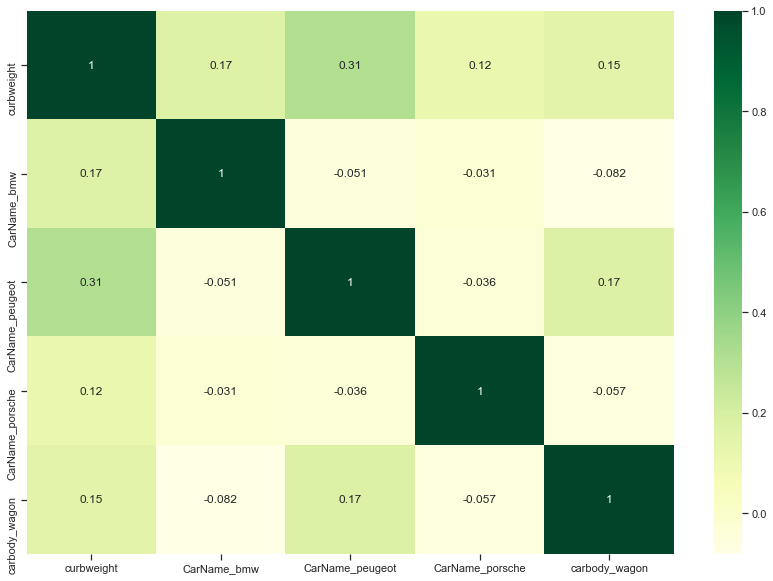

In [325]:
plt.figure(figsize = (14.5, 10))
ax= sns.heatmap(X_train_63.corr(), annot = True, cmap="YlGn")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

###### This correlation matrix looks good too! Also after 64th iteration we see there is no more variables with p_value > 0.05 or VIF > 5.

From the final model summary statistics on training data we observe:
- The difference between R Squared and Adjusted R Squared is very minimal from our final model
- **R_Squared = 88.3%,   Adjusted_R_Squared = 87.9%**
- *F Statistic* got increased from **60.37 to 206.7**
- *Probability of F statistic* **5.56e-62** which is well below 0.05
- AIC and BIC values are also low

Hence we will consider below set of variables to be significant and will use in prediction:

- *curbweight* - weight of a car without occupants and baggages are significant in predicting price
- *CarName_bmw* - Records with BMW as the companyname are the significant in predicting price
- *CarName_porsche* -  Records with Porsche as the companyname are the significant in predicting price
- *CarName_peugeot* -  Records with Peugeot as the companyname are the significant in predicting price
- *carbody_wagon* - Wagon type cars are significant in predicting price


### Residual Analysis for the training data

In [326]:
y_train_price_manual = lr_Model_64.predict(X_train_lm)

Text(0.5, 0, 'Errors')

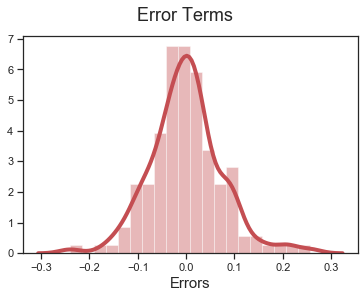

In [327]:
fig = plt.figure()
sns.distplot((y_train - y_train_price_manual), bins = 20, color='r')
fig.suptitle('Error Terms', fontsize = 18)
plt.xlabel('Errors', fontsize = 15)  

Our, residual error terms looks to maintain normal distrubution. Time to make some predictions now!

## ii. Model Predictions and calculating R2 score on test set

We will use the same test dataframe which is already processed

In [328]:
X_test_64 = sm.add_constant(X_test)

Dropping all the insignificant variables in X_test as well

In [329]:
X_test_lm_64 = X_test_64.loc[:,('const','curbweight', 'CarName_bmw', 'CarName_peugeot', 'CarName_porsche','carbody_wagon')]

In [330]:
X_test_lm_64.head()

const  curbweight  CarName_bmw  CarName_peugeot  CarName_porsche  \
160    1.0    0.235066            0                0                0   
186    1.0    0.305275            0                0                0   
59     1.0    0.347944            0                0                0   
165    1.0    0.301396            0                0                0   
140    1.0    0.291699            0                0                0   

     carbody_wagon  
160              0  
186              0  
59               0  
165              0  
140              0

In [331]:
X_test_lm_64.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 6 columns):
const              62 non-null float64
curbweight         62 non-null float64
CarName_bmw        62 non-null uint8
CarName_peugeot    62 non-null uint8
CarName_porsche    62 non-null uint8
carbody_wagon      62 non-null uint8
dtypes: float64(2), uint8(4)
memory usage: 1.7 KB


###### Predicting X_test prices based on our final model lr_Model_64

In [332]:
y_pred_lm_64 = lr_Model_64.predict(X_test_lm_64)
y_pred_lm_64.head()

160    0.068396
186    0.130640
59     0.168468
165    0.127201
140    0.118604
dtype: float64

## Calculating the R-squared score on the test set - for Manual model

In [333]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lm_64)

0.8008870034292002

**R Squared score is 80.1% for the test set through manual model**

## iii. Model Evaluation

##### Test vs predicted data scatter plot

Text(0, 0.5, 'y_pred')

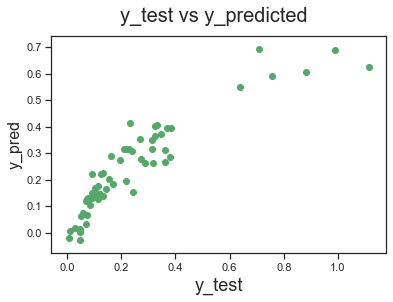

In [334]:
fig = plt.figure()
plt.scatter(y_test, y_pred_lm_64, color = 'g')
fig.suptitle('y_test vs y_predicted', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [335]:
print(y_test.shape)
print(y_pred_lm_64.shape)

(62,)
(62,)


##### Test vs predicted data line plot

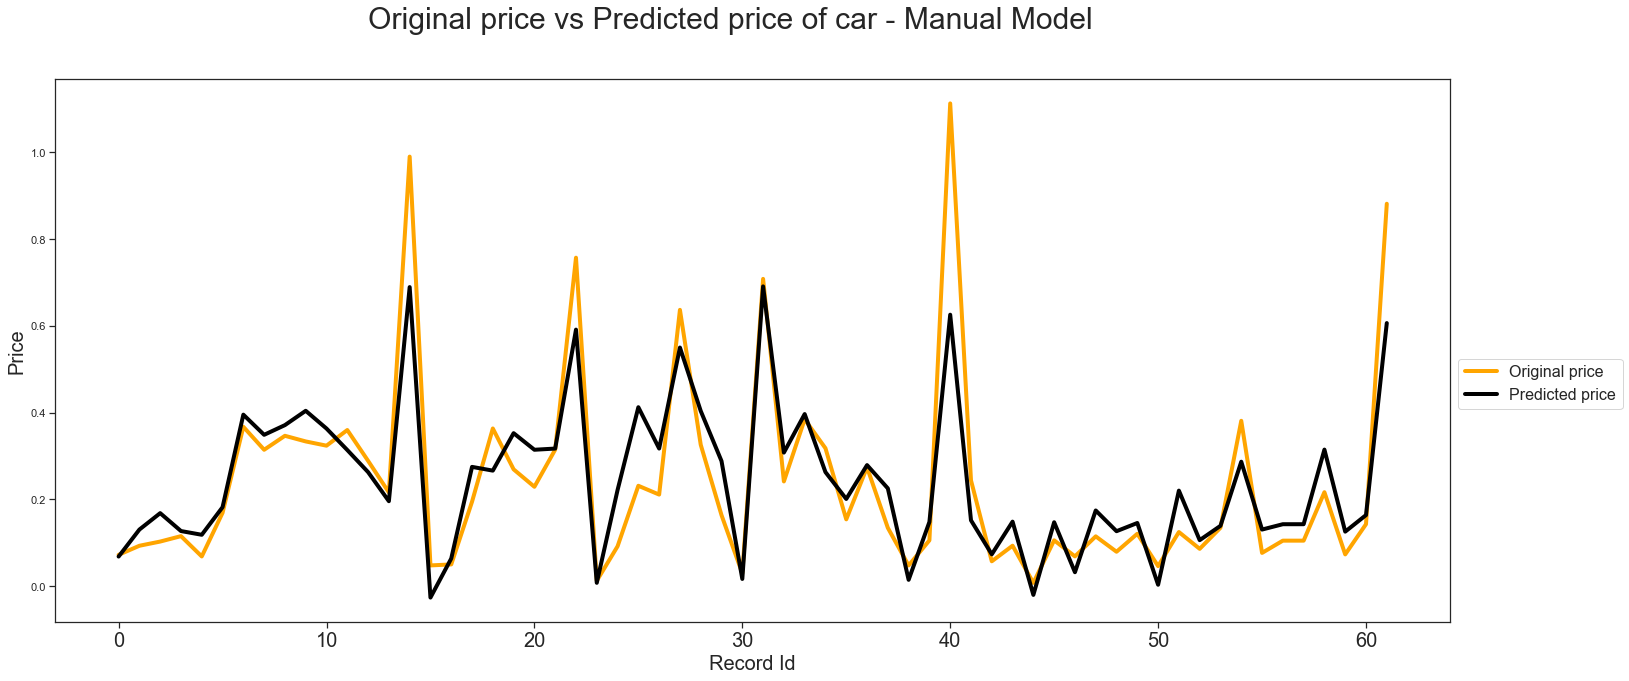

In [336]:
#sns.set(font_scale=2)
sns.set(style="ticks", rc={"lines.linewidth": 4})
record_id = [i for i in np.arange(0,62)]
fig = plt.figure(figsize=(25, 10))
sns.lineplot(record_id, y_test, color='orange', label= 'Original price')
sns.lineplot(record_id, y_pred_lm_64, color = 'black', label = 'Predicted price')
fig.suptitle('Original price vs Predicted price of car - Manual Model', fontsize=30)
plt.xlabel('Record Id', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.xticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(bbox_to_anchor=(1, 0.5), ncol=1,fontsize=16, loc = 'best' )

## Linear Regression Equation

In [337]:
lr_Model_64.params

const             -0.140002
curbweight         0.886550
CarName_bmw        0.232070
CarName_peugeot   -0.142730
CarName_porsche    0.295392
carbody_wagon     -0.077090
dtype: float64

Equation to predict the value of price can be given by:-
$ price = 0.886550  \times  curbweight + 0.232070  \times  CarName_bmw - 0.142730 \times CarName_peugeot + 0.295392 \times CarName_porsche - 0.077090 \times carbody_wagon$

# 9. Final Thoughts and conclusion!

Following the observations and the conclusion :-
- Both Balanced and Manual model performed well
- Error terms are normally distributed
- Manual model had a better R Squared and Adjusted R Squared values. R_Squared = *88.3%*, Adjusted_R_Squared = *87.9%*
- Balanced Model had R_Squared = *86.6%*, Adjusted_R_Squared = *86.1%*
- Balanced had a better R2 score on test data of *86.6%* while Manual model had a r2 score of 80.5% on test data
- Balanced model had F Statistic increased from *144.9* to *177.6*, this defines the overall model to be significant 

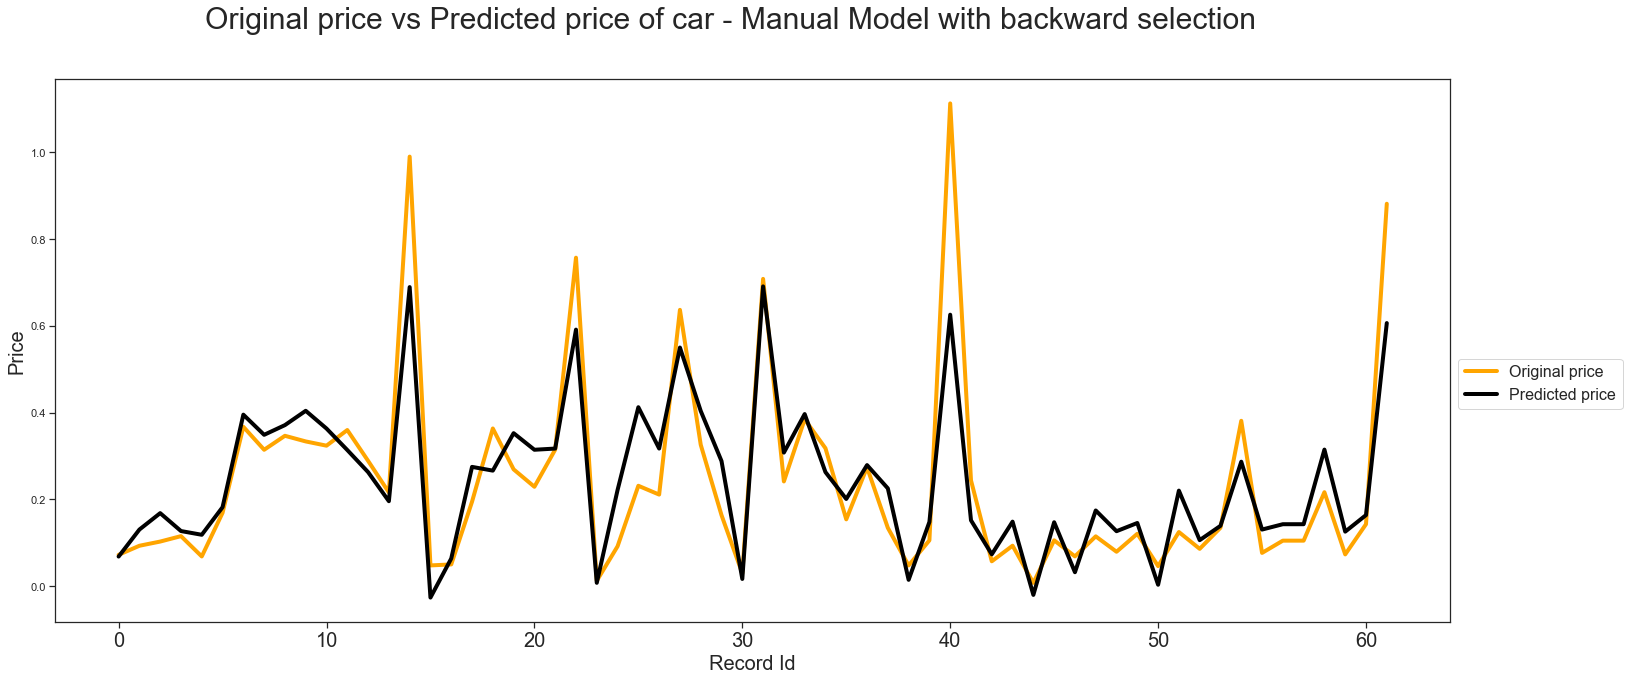

In [338]:
#sns.set(font_scale=2)
sns.set(style="ticks", rc={"lines.linewidth": 4})
record_id = [i for i in np.arange(0,62)]
fig = plt.figure(figsize=(25, 10))
sns.lineplot(record_id, y_test, color='orange', label= 'Original price')
sns.lineplot(record_id, y_pred_lm_64, color = 'black', label = 'Predicted price')
fig.suptitle('Original price vs Predicted price of car - Manual Model with backward selection', fontsize=30)
plt.xlabel('Record Id', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.xticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(bbox_to_anchor=(1, 0.5), ncol=1,fontsize=16, loc = 'best' )

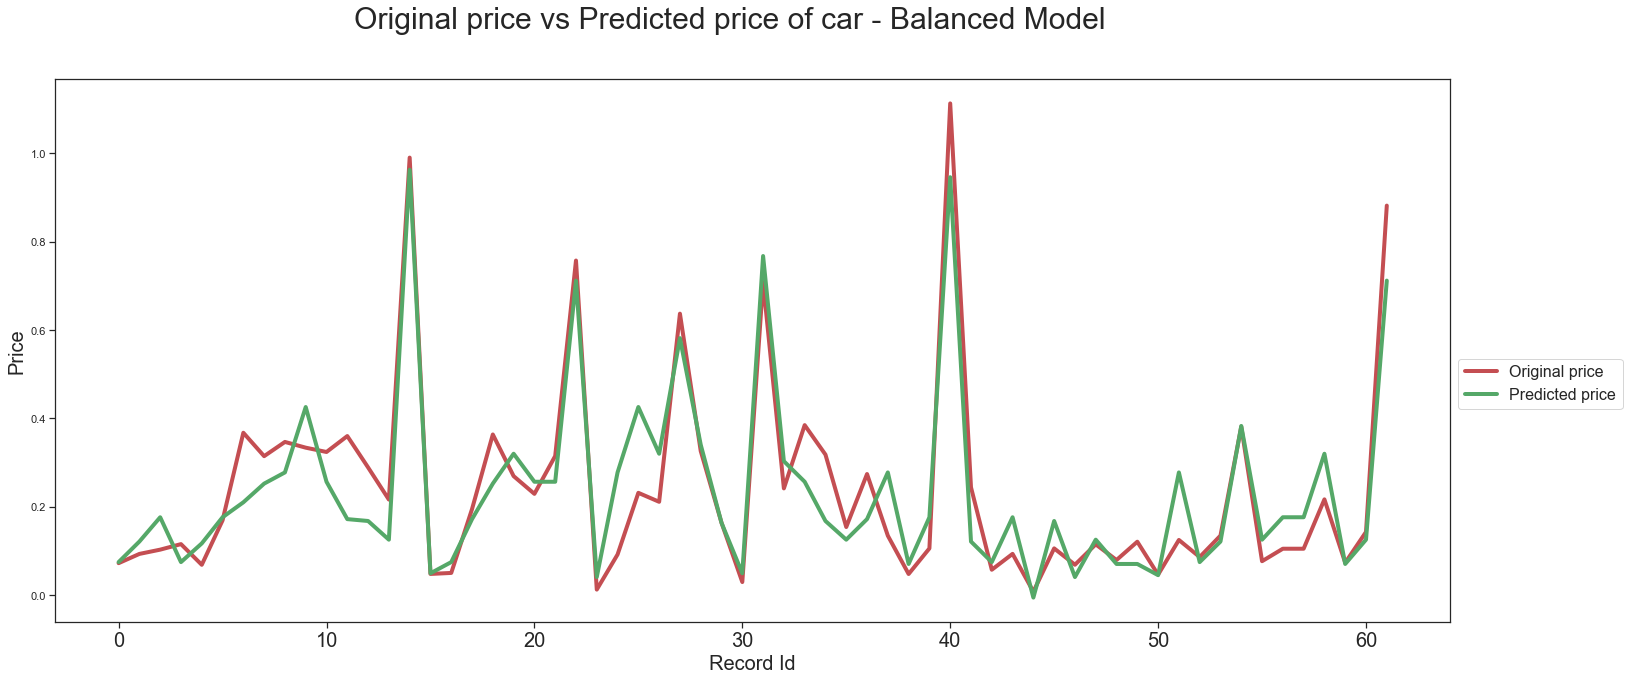

In [339]:
#sns.set(font_scale=2)
record_id = [i for i in np.arange(0,62)]
fig = plt.figure(figsize=(25, 10))
sns.lineplot(record_id, y_test, color='r', label= 'Original price')
sns.lineplot(record_id, y_pred_lm_11, color = 'g', label = 'Predicted price')
fig.suptitle('Original price vs Predicted price of car - Balanced Model', fontsize=30)
plt.xlabel('Record Id', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.xticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(bbox_to_anchor=(1, 0.5), ncol=1,fontsize=16, loc = 'best' )

Text(0, 0.5, 'y_predicted')

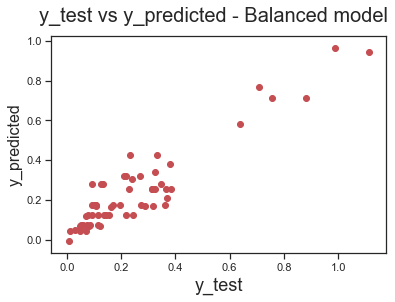

In [340]:
fig = plt.figure()
plt.scatter(y_test, y_pred_lm_11, color = 'r')
fig.suptitle('y_test vs y_predicted - Balanced model', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_predicted', fontsize = 16) 

*Since the dataset is very small, it was difficult for the model to learn within 143 records, so few crests and troughs are missed. If the dataset size was large the model would have performed better. At the same we have to keep in mind we should not overfit our model*

**R2 score for Balanced Model on test data**

In [342]:
r2_score(y_test, y_pred_lm_11)

0.8661555026972831

*Considering all the above factors, though the the first model (balanced one) is having R Squared values slightly lesser than second model, but it predicted the crests and troughs in the plot better than second model (Manual). Also the R2 score on test data (86.6%) for first model is better than second one.* 

***I choose first model (Balanced Model with RFE) to be the final one.***

Here are some of important factors to consider while predicting the price of car:

- *enginesize* - Size of the engine is an important variable in predicting price
- *CarName_bmw* - Records with BMW as the companyname are the significant in predicting price
- *CarName_porsche* - Records with Porsche as the companyname are the significant in predicting price
- *cylindernumber_five* - Cars with 5 cylinders placed are sinificant to make conclusions in predicting price
- *cylindernumber_two* - Cars with  cylinders placed are sinificant to make conclusions in predicting price

Equation to predict the price of a car form the first model is given by:-
$ price = 1.120489  \times  enginesize + 0.223316  \times  CarName_bmw + 0.231098 \times CarName_porsche + 0.147393 \times cylindernumber_five + 0.251327 \times cylindernumber_two$